In [ ]:
!pip install https://github.com/radio-astro-tools/pvextractor/archive/master.zip

     \ 1.5 MB 262 kB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 /usr/local/lib/python3.7/dist-packages/pip/_vendor/pep517/in_process/_in_process.py prepare_metadata_for_build_wheel /tmp/tmpf_88z72j Check the logs for full command output.


In [1]:
!pip install spectral-cube
!pip install pvextractor 

import matplotlib.pyplot as plt
import numpy as np
from scipy import*
import scipy.ndimage as nd
import matplotlib 
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats
#import aplpy
from matplotlib import*
from astropy.convolution import Kernel1D
#from astropy.convolution import Box1DKernela
from astropy import units as u
from astropy.io import fits
from spectral_cube import SpectralCube
from spectral_cube import* # SpectralCube 
from spectral_cube import Projection 
import scipy.ndimage as nd
from pvextractor import extract_pv_slice
from pvextractor import Path
from scipy import optimize

from sympy import nsolve
from scipy.optimize import fsolve 
from scipy.constants import*
from astropy import constants as con
from astropy import units as u
#import matplotlib.mlab as mlab
from astropy.convolution import Kernel1D
from astropy.table import Table
from astropy.wcs import WCS
from astropy.wcs import utils 
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.table import QTable
#from yt.mods import ColorTransferFunction, write_bitmap
#from astropy import yt
import warnings
from astropy.io import fits
import pandas as pd
import seaborn as sns
from astropy.table import vstack, hstack, join

from astropy import units as u
from astropy.visualization.wcsaxes import Quadrangle

# Import DataSci packages and classes >>>>>>>>>>>>>>>>>>

import pandas as pd
import numpy as np

# We'll use this later
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# This is new, it will allow us to interact with
# 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

# Import astrohysics classes and packages ---->>>>>
# DOne in the first cell


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor as gbreg 
## this calculates the test mse


     |████████████████████████████████| 218 kB 8.5 MB/s 
     |████████████████████████████████| 73 kB 346 kB/s 
     |████████████████████████████████| 43 kB 1.2 MB/s 


In [ ]:
## >>> this is quick way to define a class using "namedtuple"
from collections import namedtuple 
Car = namedtuple('Car', 'brand model color mileage') # Car is a class defined with two attributes 
my_car = Car('Toyota', 'Corolla','gray', 101000)
my_car.mileage
print('I have a', my_car.brand, my_car.model)

I have a Toyota Corolla


In [ ]:
# Python has a HTTP server built into the
# standard library. This is super handy for
# previewing websites.

# Python 3.x
python3 -m http.server

# Python 2.x
python -m SimpleHTTPServer 8000

# (This will serve the current directory at
#  http://localhost:8000)

SyntaxError: ignored

In [ ]:
# Import custom-built functions and files 
from google.colab import files

uploaded = files.upload() 

In [2]:
#############################################################################################################
## >>>>>>>>>>>>>>>>> Alternative way of uploading and reading files >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#############################################################################################################
from google.colab import drive
drive.mount('/content/gdrive')

filepath = '/content/gdrive/MyDrive/0.Work/RESEARCH_INFO/Research_2021/PilotSurvey_Newfields/'
#filepath = "C:\\Users\\Uber-PC\\Google Drive\\0.Work\\CourseworkStudyMaterial\\Data_Science\\Fall2021\\Erdos_GitHub\\fall-2021\\python prep\\Practice Problems\\" # <<<< this only works with Jupyter Notebook 
           #"C:\Users\Uber-PC\Google Drive\0.Work\CourseworkStudyMaterial\Data_Science\Fall2021\Erdos_GitHub\fall-2021\python prep\Practice Problems\random_walk.csv"


kryu_list = Table.read(filepath + 'asu (1).fit') # original Kryukova survey 
proto = Table.read(filepath + 'cygx_pilot_protostars(Kry).fit')
wu = Table.read(filepath + 'WuTable.fit')
outflowsCloud = Table.read(filepath + 'outflowsClouds_output.fit')


cygx_mom0 = SpectralCube.read(filepath + 'cygx_mom0.fits')

# read the kryukova list 
#stars_kry = Table.read('asu (1).fit') 

# read coordinates tables 
of_newfields = Table.read(filepath + 'table_newfields_input.fit')
of_cygrift = Table.read(filepath + 'cygX_pilot_cygrift0.65kpc_outout.fit')
of_W75 = Table.read(filepath + 'cygX_pilot_W75_outout.fit')
of_DR21 = Table.read(filepath + 'cygX_pilot_DR21_outout.fit')

cygX_newfields = SpectralCube.read(filepath + 'cygx_cobig_small.fits')
cygX_pilot = SpectralCube.read(filepath +'cygX_pilot_km.fits')
cygX_init_newfields = QTable.read(filepath+'table_newfields_input.fit')
cygX_init_pilot_1_5kpcA =  QTable.read(filepath + 'cygX_pilot_1.5kpc_A_input.fit')

Mounted at /content/gdrive


In [ ]:
## >>>>>>>>>>>>>>>>>>> Pilot survey outflows table for overleaf conversion >>>>>>>>>>>>>>>>>>>
OF_complete = Table.read(filepath + 'cygxPilot_proto.fits')
OF_complete_rounded = OF_complete.to_pandas().round({'RAJ2000':3,	'DecJ2000':3, 'Mass':1, 'Momentum':1,	'Energy':1,	'Dynamical Time':1, 'RA_proto':3,	'Dec_proto':3,	'logL_proto':1,	'alpha_proto':1})
print(OF_complete_rounded.head(3))
dist_proto = (np.array(((OF_complete_rounded['RAJ2000'] - OF_complete_rounded['RA_proto'])**2 + (OF_complete_rounded['DecJ2000'] - OF_complete_rounded['Dec_proto'])**2)**0.5)*u.deg).to(u.arcsec)
OF_complete_rounded['dist_proto'] = dist_proto.round(0)
OF_complete_rounded[['ID','RAJ2000', 'DecJ2000', 'Distance',	'Vc', 'Mass', 'Momentum',	'Energy',	'Dynamical Time',	'dist_proto', 'logL_proto',	'alpha_proto']].to_latex()

                 ID  RAJ2000  DecJ2000  ...  Dec_proto  logL_proto  alpha_proto
0  b'G79.886+2.552'  306.127    42.072  ...     42.069         1.9          0.2
1  b'G79.962+2.556'  306.196    42.137  ...     42.223        -0.5          0.9
2  b'G80.149+2.710'  306.154    42.376  ...     42.388         1.2          2.0

[3 rows x 13 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


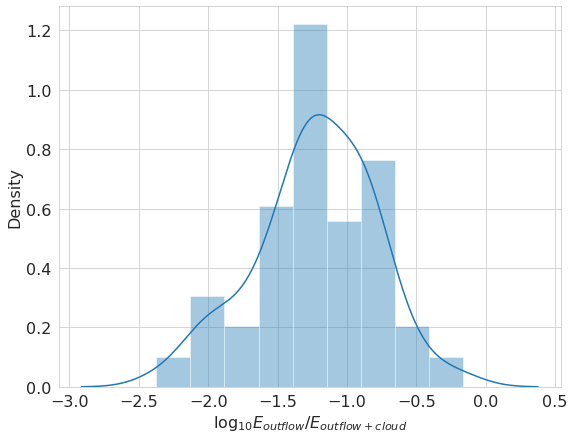

In [ ]:
outflowsCloud_df = outflowsCloud.to_pandas()
outflowsCloud_df['log10_Energy_(of/cloud+of)'] = np.log10(outflowsCloud_df['Energy_(of/cloud+of)'])
outflowsCloud_df1 = outflowsCloud_df[outflowsCloud_df['log10_Energy_(of/cloud+of)']>-1000]
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(9,7))
sns.distplot(outflowsCloud_df1['log10_Energy_(of/cloud+of)'], axlabel='log$_{10}E_{outflow}/E_{outflow+cloud}$')
#sns.histplot(outflowsCloud_df1['log10_Energy_(of/cloud+of)'])

#plt.savefig('outflow+cloud_hist.pdf')
plt.show()
#plt.close()

In [ ]:
#>>>>>>> this generates file required for finding protostellar association with Kryukova

pilotL_df = pilotL.to_pandas().round({'RAJ2000':3,	'DecJ2000':3,	'Distance':2,	'Vc':1,'Mass':2, 'Momentum':2,	'Energy':2,	'Dynamical Time':1, 'RA_proto':3,	'Dec_proto':3,	'logL_proto':1,	'alpha_proto':1})
of_newfields_df = of_newfields.to_pandas().round({'RAJ2000':3,	'DecJ2000':3, 'Distance':2,	'Vc':1,'Mass':2})[['ID','RAJ2000','DecJ2000',	'Vc',	'Distance']]


outflowsCloud_df = outflowsCloud.to_pandas().round({'RAJ2000':3,	'DecJ2000':3,	'Distance':2,	'Vc':1,'Mass':2, 'Momentum':2,	'Energy':2,	'Dynamical Time':1}).sort_values('RAJ2000').reset_index()
cygx_all = pd.merge(pilotL_df, of_newfields_df, how='outer').sort_values('RAJ2000').reset_index()

outflowsCloud_df_refined = outflowsCloud_df[['ID','RAJ2000', 'DecJ2000', 'Mass', 'Momentum', 'Energy','Dynamical Time', 'Cloud_Mass', 'Cloud_Energy', 'Energy_(of/cloud+of)']]
cygx_all_refined = cygx_all[['ID', 'RAJ2000', 'DecJ2000', 'Distance', 'Vc']]

cygx_combined_out = pd.merge(cygx_all_refined, outflowsCloud_df_refined, on=['RAJ2000','DecJ2000'], how='outer').sort_values('RAJ2000').drop('ID_y', axis=1).rename({'ID_x':'ID'}, axis=1)
cygx_combined_out.to_csv(filepath + 'cygx_combined_out.csv') # this file is manually modeified for NaN values/repeated cells. Read this from filepath then run 

cygx_combined_out = pd.read_csv(filepath + 'cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


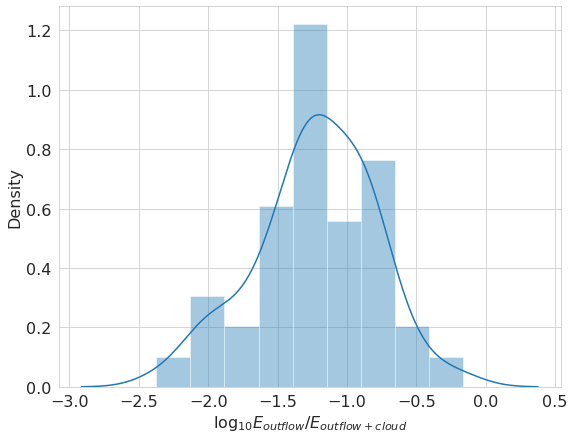

In [11]:
cygx_combined_out = pd.read_csv(filepath + 'cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})
cygx_combined_out = cygx_combined_out[cygx_combined_out['Energy_(of/cloud+of)']>0]
cygx_combined_out['log10_Energy_(of/cloud+of)'] = np.log10(cygx_combined_out['Energy_(of/cloud+of)'])

plt.figure(figsize=(9,7))
sns.distplot(cygx_combined_out['log10_Energy_(of/cloud+of)'], axlabel='log$_{10}E_{outflow}/E_{outflow+cloud}$')
#sns.histplot(outflowsCloud_df1['log10_Energy_(of/cloud+of)'])

#plt.savefig('outflow+cloud_hist.pdf')
plt.show()
#plt.close()

In [ ]:
### Development of clustering algorithm for outflow-protostar associaton (non ML)

#outflows = QTable.read('CygX_pilot.fit')
protostars = QTable.read(filepath + 'asu (1).fit')

df_outflows =  pd.read_csv(filepath + 'cygx_combined_out.csv').drop('Unnamed: 0', axis=1).round({'RAJ2000':3, 'DecJ2000':3})
df_proto = protostars.to_pandas().round({'RAJ2000':3, 'DEJ2000':3})
t =QTable(names=('ID','RAJ2000' ,'DecJ2000', 'RA_proto', 'Dec_proto', 'Dist_proto', 'logL_proto', 'alpha_proto'), dtype=('U16', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8'))
df_t = t.to_pandas()
D = ((np.max(df_outflows['RAJ2000']) - np.min(df_outflows['RAJ2000']))**2 + (np.max(df_outflows['DecJ2000']) - np.min(df_outflows['DecJ2000']))**2)**0.5
D = (D*u.deg).to(u.arcsecond)
Dist0 = D
for i in range(len(df_outflows)):
  xo = df_outflows['RAJ2000'][i]
  yo = df_outflows['DecJ2000'][i]
  for j in range(len(df_proto)):
    xp = df_proto['RAJ2000'][j]
    yp = df_proto['DEJ2000'][j]
    dist = ((((xo - xp)**2 + (yo - yp)**2)**(0.5))*u.deg).to(u.arcsecond)
    if dist <= Dist0: # find a large radius # if current dist is less than the previous dist, select this object as the nearest protostar
      x_proto = xp
      y_proto = yp
      logL = df_proto['logL'][j]
      alpha = df_proto['alpha'][j]
      #print(logL)
      Dist0 = dist # and update previous dist by the current one. This will loop through the list of Kryukova protostars 
      #print(Dist0)
    else:
      pass
  t.add_row([df_outflows.copy()['ID'][i],df_outflows['RAJ2000'][i], df_outflows['DecJ2000'][i], x_proto, y_proto, Dist0 ,logL, alpha]) # this is similar to concatenating to pandas dataFrame, but we use astropy table instead
  Dist0 = D

t['RA_proto'].unit = u.deg
t['Dec_proto'].unit = u.deg
t['logL_proto'].unit = u.solLum
t['Dist_proto'].unit = u.arcsecond 
t.write(filepath + 'cygx_complete_list_protostars(Kry).fit', overwrite=True)


In [ ]:
outflows = Table.read('CygX_pilot.fit')
proto = Table.read('cygx_pilot_protostars(Kry).fit')

outflows_proto = join(outflows, proto)
OF_proto = outflows_proto ['ID','RAJ2000','DecJ2000','Distance','Vc','Mass','Momentum','Energy','Dynamical Time', 'RA_proto', 'Dec_proto', 'Dist_proto','logL_proto', 'alpha_proto' ]
OF_proto.write('cygxPilot_proto.fits', overwrite=True)

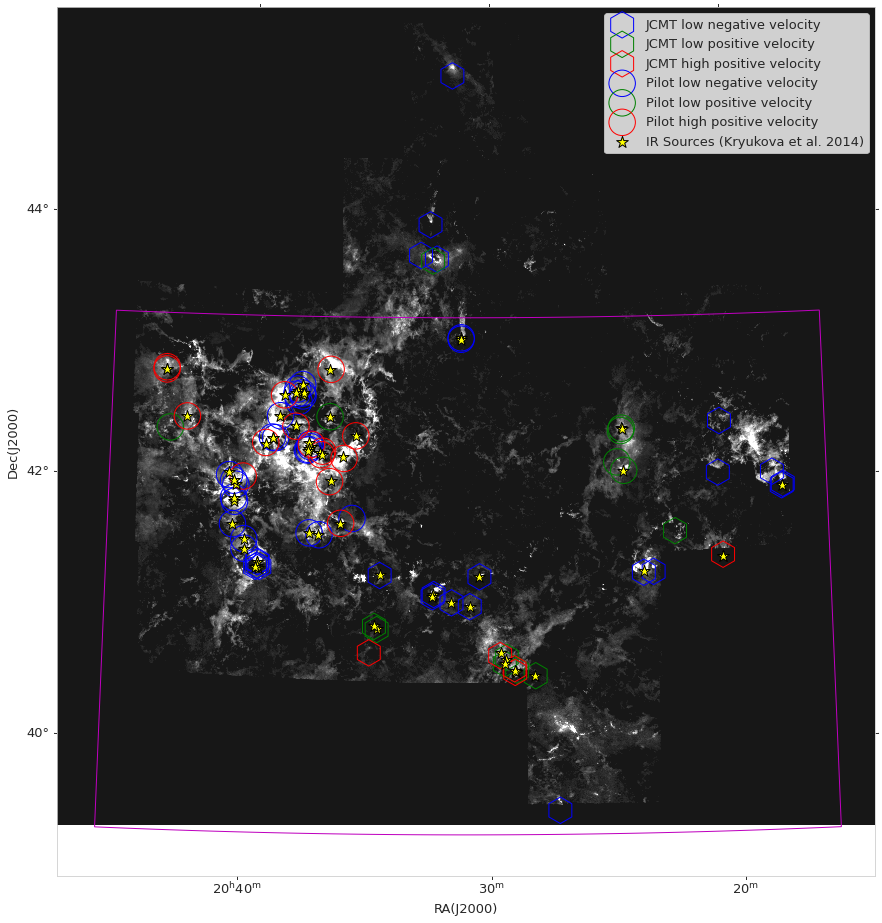

In [ ]:
#################################################################################################################
###############################      CREATE COMBINED MAP       ##################################################
#################################################################################################################
## >>>>>>>>>>>>>>>> All the required tables and file are loaded in the read cell with filepath >>>>>

matplotlib.rcParams.update({'font.size': 13})

cygxmom0 = cygx_mom0.moment(order=0, axis=0)

of_newfields_highp = of_newfields[of_newfields['Vc']>7.5*u.km/u.s]
of_newfields_lowp = of_newfields[(of_newfields['Vc']<7.5*u.km/u.s) & (of_newfields['Vc']>=0*u.km/u.s)]
of_newfields_lown = of_newfields[of_newfields['Vc']<0*u.km/u.s]

# combined field (pilot+newfields) protostars from Kryukova catalogue 
proto = QTable.read(filepath + 'cygx_complete_list_protostars(Kry).fit')
proto_df = proto.to_pandas() 
proto[proto['Dist_proto'] < 100*u.arcsec].write(filepath + 'cygx_complete_list_protostars(Kry)_arcmin.fit', overwrite=True)

fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(1,1,1, projection=cygxmom0.wcs)
im=ax.imshow((cygxmom0).value,interpolation='nearest',label='$^{12}CO$',origin='lower', cmap='gray',vmin=-5,vmax=50)
ax.set_ylabel("Dec(J2000)")
ax.set_xlabel("RA(J2000)")
ax.grid(color='white', alpha=1, ls='solid')

#clb=plt.colorbar(im)
#clb.set_label('$^{12}$CO Integrated Intensity (K km s$^{-1}$)', labelpad=5, y=.5, rotation=90)

#ax.scatter(stars_kry['RAJ2000'].data, stars_kry['DEJ2000'].data,transform=ax.get_transform('world'), marker='*',s=200,edgecolor='black',facecolor='yellow')
# this works fine. Just disabled for now. Will use similar list for outflows 
size = 700
#ax.scatter(of_newfields['RAJ2000'].data, of_newfields['DecJ2000'].data,transform=ax.get_transform('world'), marker='o',s=700,edgecolor='green',facecolor='none',label='JCMT-Newfields')
ax.scatter(of_newfields_lown['RAJ2000'].data, of_newfields_lown['DecJ2000'].data,transform=ax.get_transform('world'), marker='h',s=size,edgecolor='blue',facecolor='none',label='JCMT low negative velocity')
ax.scatter(of_newfields_lowp['RAJ2000'].data, of_newfields_lowp['DecJ2000'].data,transform=ax.get_transform('world'), marker='h',s=size,edgecolor='green',facecolor='none',label='JCMT low positive velocity')
ax.scatter(of_newfields_highp['RAJ2000'].data, of_newfields_highp['DecJ2000'].data,transform=ax.get_transform('world'), marker='h',s=size,edgecolor='red',facecolor='none',label='JCMT high positive velocity')


ax.scatter(of_DR21['RAJ2000'].data, of_DR21['DecJ2000'].data,transform=ax.get_transform('world'), marker='o',s=size,edgecolor='blue',facecolor='none',label='Pilot low negative velocity')
ax.scatter(of_cygrift['RAJ2000'].data, of_cygrift['DecJ2000'].data,transform=ax.get_transform('world'), marker='o',s=size,edgecolor='green',facecolor='none',label='Pilot low positive velocity')
ax.scatter(of_W75['RAJ2000'].data, of_W75['DecJ2000'].data,transform=ax.get_transform('world'), marker='o',s=size,edgecolor='red',facecolor='none',label='Pilot high positive velocity')
#ax.scatter(proto['RA_proto'], proto['Dec_proto'],transform=ax.get_transform('world'), marker='*',s=150,edgecolor='black',facecolor='yellow',label='IR Sources (Kryukova et al. 2014)') 
ax.scatter(proto[proto['Dist_proto'] < 100*u.arcsec]['RA_proto'], proto[proto['Dist_proto'] < 100*u.arcsec]['Dec_proto'],transform=ax.get_transform('world'), marker='*',s=150,edgecolor='black',facecolor='yellow',label='IR Sources (Kryukova et al. 2014)') 

# show a rectangle indicating the Kryukova survey range >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
_, b, _ = cygx_mom0.world[0, :, 0]  #extract latitude world coordinates from cube
b, _ = cygxmom0.world[:, 0] 
_, _, l = cygx_mom0.world[0, 0, :]  #extract longitude world coordinates from cub

length = max(kryu_list['RAJ2000']) - min(kryu_list['RAJ2000'])
# we use b.min instead of min declination in Kryukova list because Kry list expands far beyond out dataset, which is unnecessary to include 
width = max(kryu_list['DEJ2000']) - b.min().value 

#r = Quadrangle((max(proto['RA_proto']),min(proto['Dec_proto']))*u.deg, -3*u.deg, 2*u.deg,edgecolor='white', facecolor='none',transform=ax.get_transform('fk5')) 

# >>> the location is the top left of Kry survey range, -length because RA is measured right to left, -width because we expand the rectangle downward from top >>>>>>>
r = Quadrangle((max(kryu_list['RAJ2000']), max(kryu_list['DEJ2000']))*u.deg, -length*u.deg, -width*u.deg,edgecolor='m', facecolor='none',transform=ax.get_transform('fk5'))
ax.add_patch(r)


plt.legend()

plt.savefig(filepath + 'mom0+outflows_arcmin.pdf',format='pdf',bbox_inches = 'tight', dpi=300,overwrite=True)
plt.show()
plt.close()

In [ ]:
#>>>>>> Run this for outflow lists w/ and w/o protostars 

proto_arcmin = QTable.read(filepath + 'cygx_complete_list_protostars(Kry)_arcmin.fit')
proto_arcmin.to_pandas().round({'RAJ2000':3,	'DecJ2000':3,	'RA_proto':3,	'Dec_proto':3,	'Dist_proto':0,	'logL_proto':1,	'alpha_proto':1}).to_csv(filepath + 'proto_arcmin.csv')

#####################################
proto_arcmin = pd.read_csv(filepath + 'proto_arcmin.csv').round({'RAJ2000':3, 'DecJ2000':3})


cygx_ofs_with_LIR = pd.merge(cygx_combined_out, proto_arcmin,on=['RAJ2000','DecJ2000'], how='inner').drop({'Unnamed: 0','ID_y'}, axis=1).rename({'ID_x':'ID'}, axis=1)

cygx_ofs_with_LIR.to_csv(filepath + 'cygx_ofs_with_LIR.csv')

ra_with_LIR = cygx_ofs_with_LIR['RAJ2000']
dec_with_LIR =  cygx_ofs_with_LIR['DecJ2000']

cygx_ofs_without_LIR = cygx_combined_out[~((cygx_combined_out['RAJ2000'].isin(ra_with_LIR)) & (cygx_combined_out['DecJ2000'].isin(dec_with_LIR)))]
cygx_ofs_without_LIR.to_csv(filepath + 'cygx_ofs_without_LIR.csv')

307.80145000000005 [307.86395 307.73895] deg 43.096000000000004 [43.03975 43.15225] deg
0.06249999599998546 0.06249999599998546 0.05624999639999828 0.05624999639999828
1249.8509514491009
812.1004049500414
(13, 17) (19, 13)
10.0 19.0 22.0 11.0
-13.128 km / s 11.888 km / s



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: DeprecationWarning: scipy.nanmin is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmin instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: DeprecationWarning: scipy.nanmax is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmax instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:204: DeprecationWarning: scipy.nanmax is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmax instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: DeprecationWarning: scipy.nanmax is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmax instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:221: DeprecationWarning: scipy.nanmean is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmean instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:222: DeprecationWarning: scipy.nanmean is deprecated and will be re

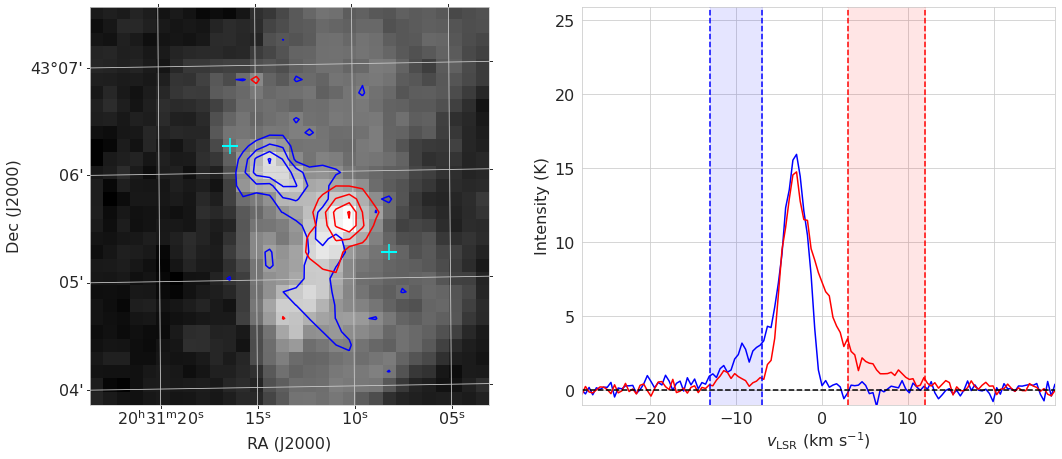

In [ ]:
###########################################################################################################
#################                                                                        ##################
#################    ZOOMED IN SAPTIAL MAP IN 12CO(3-2) W/ AN ARROW POINTING AT          ##################
#################    OUTFLOW LOCATION AND INSET SHOWING WINGS IN SPECTRAL EMISSION       ##################
###########################################################################################################

from astropy.table import QTable
from astropy import units as u

##### FUNCTIONS ##########################################################################################
def f(pb,pr): # pb = blue lobe pixel. USE A LINEAR FUNCTION JOINING BLUE AND RED LOBE PIXELS
    x0 = (pb[0]+pr[0])/2
    y0 = (pb[1]+pr[1])/2
    dx = np.abs(pb[0]-x0)
    dy = np.abs(pb[1]-y0) # since y0 is midpoint, the distances from pb[1] and pr[1] are the same 
    if np.abs(pr[0]-pb[0]) <= 1e-2: # if blue and red pixels are vertical so slope=infty
        xb = x0 - 2*dx # dx = 0 anyway; all x-coordinates are the same 
        xr = x0 + 2*dx
        if pb[1] < y0:
            yb = pb[1] - 2*dy # dist between mid point and blue pixel
            yr = pr[1] + 2*dy
        elif pb[1] > y0:
            yb = pb[1] + 2*dy
            yr = pr[1] - 2*dy
    else:
        m = (pr[1]-pb[1])/(pr[0]-pb[0]) # finite slope
        if pb[0] < x0:
            xb = x0 - 2*dx
            xr = x0 + 2*dx
            yb = y0 + m*(xb-x0)
            yr= y0 + m*(xr-x0)
        elif pb[0] > x0:
            xb = x0 + 2*dx
            xr = x0 - 2*dx
            yb = y0 + m*(xb-x0)
            yr = y0 + m*(xr-x0)
    pb2 = (xb,yb)
    pr2 = (xr,yr)
    return pb2, pr2

 ### DEFINE FUNCTIONS 

def length(s):
    if s%2 == 0: #modulo zero => even
        l = s/2
    else:
        l = (s+1)/2
    return l

def Jnu(T, nu=330.5*u.GHz):
    jnu = ((con.h * nu / con.k_B)
            / (np.exp(con.h * nu / (con.k_B * T)) - 1))
    return( jnu )

def G(v, Amp, V0, Sig0, Offset):
    return( Amp * np.exp(-(v-V0)**2/(2*Sig0**2))+Offset )

def Quad(v, c0, v0, c2):
    return( c0 + c2 * (v - v0)**2 ) # a + b(x-x0)^2 form

################################################################################################################    
# Read in data

#cygX_init = of_newfieldsof_newfields = QTable.read(filepath + 'table_newfields_input.fit')
#cygX_init = QTable.read(filepath+'table_newfields_input.fit') ### CHANGE FIELD NAME ###
#cygX_init = cygX_init_newfields
#cygX = cygX_newfields

cygX_init = cygX_init_pilot_1_5kpcA
cygX = cygX_pilot
#proto = Table.read('asu (1).fit')
warnings.filterwarnings('ignore', category=UserWarning, append=True)
## CREATE EMPTY TABLE FOR OUTPUT MASS, MOMENTUM, ENERGY 
t = QTable(names=('Seq','ID','RAJ2000','DecJ2000','Mass', 'Momentum', 'Energy','Dynamical Time'),
           dtype=('i8','U10','f8','f8','f8','f8','f8','f8'))  
for z in range(1,2):#len(cygX_init)):
    vbmin = cygX_init[z]['vbmin'] # BLUE WING
    vbmax = cygX_init[z]['vbmax']
    vrmin = cygX_init[z]['vrmin']
    vrmax = cygX_init[z]['vrmax'] # RED WING
    

    ra_b = cygX_init[z]['RAJ2000_blue'] 
    dec_b = cygX_init[z]['DecJ2000_blue']
    ra_r = cygX_init[z]['RAJ2000_red']
    dec_r = cygX_init[z]['DecJ2000_red']

    RA = (ra_b.value+ra_r.value)/2
    Dec = (dec_b.value+dec_r.value)/2
    
    distance = (cygX_init[z]['Distance']).to(u.pc).value

    cube_12co = cygX ### CHANGE FIELD NAME ###

    _, b, _ = cube_12co.world[0, :, 0]  #extract latitude world coordinates from cube
    _, _, l = cube_12co.world[0, 0, :]  #extract longitude world coordinates from cube

    ##### Spatial boundary includes 50 pixels on each side from blue and red lobes 
    db = np.abs(cube_12co.wcs.celestial.wcs.get_cdelt()[0])*27#15
    dl = -(cube_12co.wcs.celestial.wcs.get_cdelt()[1])*30#20
    

    
    bmin = Dec-1*db
    bmax = Dec+1*db #these factors are introduced for adjusting the cropping wondow to make it symmetrical
    lmin = RA-dl
    lmax = RA+dl

    lat_range = [bmin, bmax]*u.deg 
    lon_range = [lmin, lmax]*u.deg
    print(RA,lon_range, Dec,lat_range)
    print(np.abs(RA-lon_range[0].value),np.abs(RA-lon_range[1].value),np.abs(Dec-lat_range[0].value),np.abs(Dec-lat_range[1].value))
    ##### Spectral boundary includes 15 km/s on each side of the vel range 
    dv = (cube_12co.spectral_axis[1]-cube_12co.spectral_axis[0]).value
    vlo = vbmin-15*u.km/u.s
    vhi = vrmax+15*u.km/u.s

    box = 15
    x0, y0, _ = cube_12co.wcs.wcs_world2pix(RA, Dec, 0, 0)
    print(x0)
    print(y0)
    slab = cube_12co.spectral_slab(vlo, vhi) 
    subcube = slab[:, int(y0-box):int(y0+box), int(x0-box):int(x0+box)]

    ###############################################################################################################
    ###################################  VISUALIZATION OF OUTFLOW   ###############################################
    ###############################################################################################################

    ### EXTRACT PIXEL COORDINATES FROM WORLD SKY COORDINATES 

    from astropy import wcs
    cdelt = utils.proj_plane_pixel_scales(subcube.wcs)
    cdelt
    #w = wcs.WCS(cube[0].header)
    pix_b_x, pix_b_y, _  = subcube.wcs.wcs_world2pix(ra_b.value,dec_b.value, 0,0)
    pix_r_x, pix_r_y, _ = subcube.wcs.wcs_world2pix(ra_r.value,dec_r.value, 0,0)

    xb = int(round(float(pix_b_x),0)) # These values are interger pixel numbers
    yb = int(round(float(pix_b_y),0))
    xr = int(round(float(pix_r_x),0) )     
    yr = int(round(float(pix_r_y),0))
   
    # create pv-slice (crop both spatial and spectral axes)

    pb = (xb,yb) # BLUE LOBE CENTER PIXEL 
    pr = (xr,yr) # RED LOBE CENTER PIXEL
    print(pb,pr)

    # create two extended points (pixels) along the pv-slice line 
    xbl = f(pb,pr)[0][0]
    ybl = f(pb,pr)[0][1]
    xrh = f(pb,pr)[1][0]
    yrh = f(pb,pr)[1][1]
    print(xbl,ybl,xrh,yrh)
    

    width = 1
    path = Path([(xbl, ybl), (xrh, yrh)], width) 
    slab=cygX.spectral_slab(vbmin, vrmax) # range from spectral bipolar plot
    vslabmin = slab.spectral_extrema[0]
    vslabmax = slab.spectral_extrema[1]
    print(vslabmin,vslabmax)
    pvslice12 = extract_pv_slice(slab, path)

    ## spatial coordinates of pv-slice for green arrow display on contour map    
    coord_b_RA, coord_b_Dec, _ = subcube.wcs.wcs_pix2world(xbl,ybl,0,0)
    coord_r_RA, coord_r_Dec, _ = subcube.wcs.wcs_pix2world(xrh,yrh,0,0)
    
    dx_coord = coord_r_RA - coord_b_RA
    dy_coord = coord_r_Dec - coord_b_Dec
   

    ####################################################################################################################
    ##################################                 CONTOUR                ##########################################
    ####################################################################################################################

    import matplotlib.patches as patches

    slab_blue=subcube.spectral_slab(vbmin, vbmax) #contour
    slab_red = subcube.spectral_slab(vrmin, vrmax) ######## CHANGE HERE #########
    slab_main = subcube.spectral_slab(vbmin, vrmax) 

    mom0_main =slab_main.moment(order=0)
    mom0_blue =slab_blue.moment(order=0)
    mom0_red =slab_red.moment(order=0)
    
    fig = plt.figure(figsize=(14,12),constrained_layout=True)
    matplotlib.rcParams.update({'font.size': 16})

    gs = gridspec.GridSpec(nrows=2, ncols=6, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0:3],projection=subcube.wcs.celestial)#1,1,subplot_kw={'projection':subcube.wcs.celestial})
    im1=ax1.imshow((mom0_main.value),interpolation='nearest',label='$^{12}CO$',
                  origin='lower', cmap='gray',vmin=nanmin(mom0_main).value,vmax=nanmax(mom0_main).value)
    ax1.set_ylabel("Dec (J2000)")
    ax1.set_xlabel("RA (J2000)")
    ax1.set_autoscale_on(False)

    lat = ax1.coords[0]
    lat.set_major_formatter('hh:mm:ss')
    lon = ax1.coords[1]
    lon.set_major_formatter('dd:mm')

    cs = ax1.contour(mom0_blue.value,colors="blue",levels=(np.array([0.25,0.5,0.75,1]))*int(nanmax(mom0_blue).value))
    cs = ax1.contour(mom0_red.value,colors="red",levels=(np.array([0.25,0.5,0.75,1]))*int(nanmax(mom0_red).value))
    ax1.scatter(coord_b_RA, coord_b_Dec,transform=ax1.get_transform('world'),marker='+',s=250,edgecolor='black', facecolor='cyan')
    ax1.scatter(coord_r_RA, coord_r_Dec,transform=ax1.get_transform('world'),marker='+',s=250,edgecolor='black', facecolor='cyan')
    # Create a Rectangle patch
    #rect = patches.Rectangle((proto[z]['RAJ2000'].wcs_world2pix, proto[z]['DecJ2000'].wcs_world2pix), 2, 2, linewidth=1, edgecolor='r', facecolor='none')

    ###################################################################################################################
    ##################################         SPECTRAL BIPOLARITY            ##########################################
    ####################################################################################################################
    pix = 2
    
    mb = subcube[:,(yb-pix):(yb+pix),(xb-pix):(xb+pix)].filled_data[:] 
    mr = subcube[:,(yr-pix):(yr+pix),(xr-pix):(xr+pix)].filled_data[:]


    ax2 = fig.add_subplot(gs[0,3:])
    plt.plot(subcube.spectral_axis, nanmean(mb,axis=(1,2)).value/1.0,color='blue')
    plt.plot(subcube.spectral_axis, nanmean(mr,axis=(1,2)).value/1.0,color='red')
    plt.xlabel("$v_{\mathrm{LSR}}$ (km s$^{-1}$)")
    plt.ylabel("Intensity (K)")

    plt.axvline(x=vbmin.value,color='b',linestyle='--') 
    plt.axvline(x=vbmax.value,color='b',linestyle='--')
    plt.axvline(x=vrmin.value,color='r',linestyle='--')
    plt.axvline(x=vrmax.value,color='r',linestyle='--')

    plt.axhline(y=0,color='k',linestyle='--')
    
    xminvalue = subcube.spectral_axis.min().value
    xmaxvalue = subcube.spectral_axis.max().value
    plt.xlim(left=xminvalue)
    plt.xlim(right=xmaxvalue)
    plt.ylim(bottom=-1)
    
    contourmax_blue = nanmax(nanmean(mb,axis=(1,2))).value
    contourmax_blue = nanmax(nanmean(mr,axis=(1,2))).value
    ymaxvalue = nanmax([nanmax(nanmean(mb,axis=(1,2))).value,nanmax(nanmean(mr,axis=(1,2))).value])+10
    if ymaxvalue == NaN:
        yvalue = 25
    else:
        yvalue = ymaxvalue 
    plt.ylim(top=yvalue)

    plt.axvspan(vbmin.value,vbmax.value,ymin=0,ymax=1,alpha=0.1, color='b')#ymin, ymax are in terms of %age of height to be covered 
    plt.axvspan(vrmin.value, vrmax.value,alpha=0.1, color='r')

    #plt.savefig('Pilot_'+str(round(RA,2))+'+'+str(round(Dec,2))+'.pdf',format='pdf',bbox_inches = 'tight', dpi=300,overwrite=True)
    plt.show()
    plt.close()


In [ ]:
str(round(RA,2))

'307.8'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


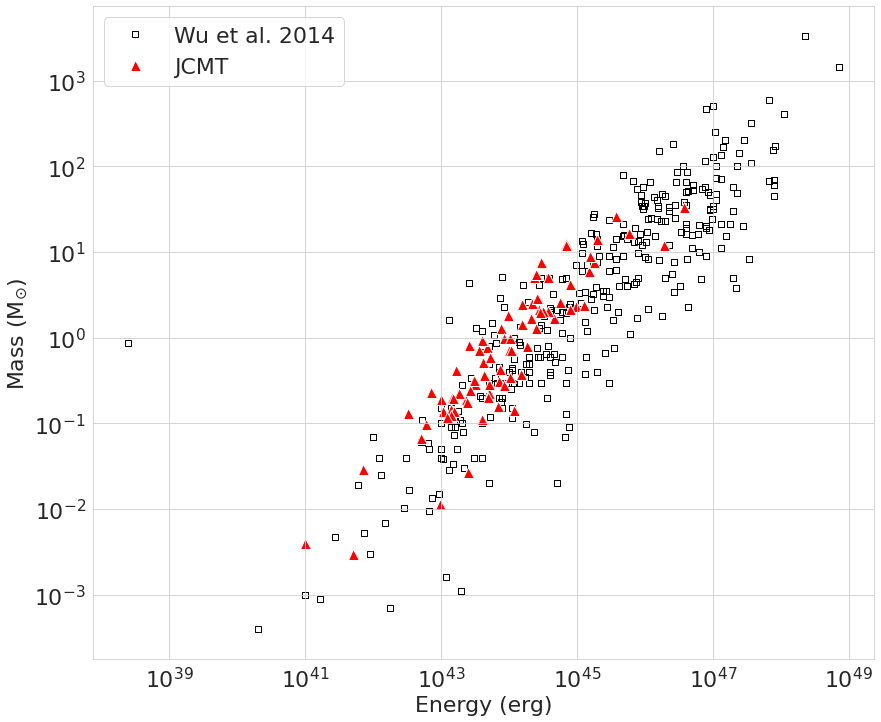

=========================+++++++++++++++++++++++++++++++++++++=========++++++++++++++++====================


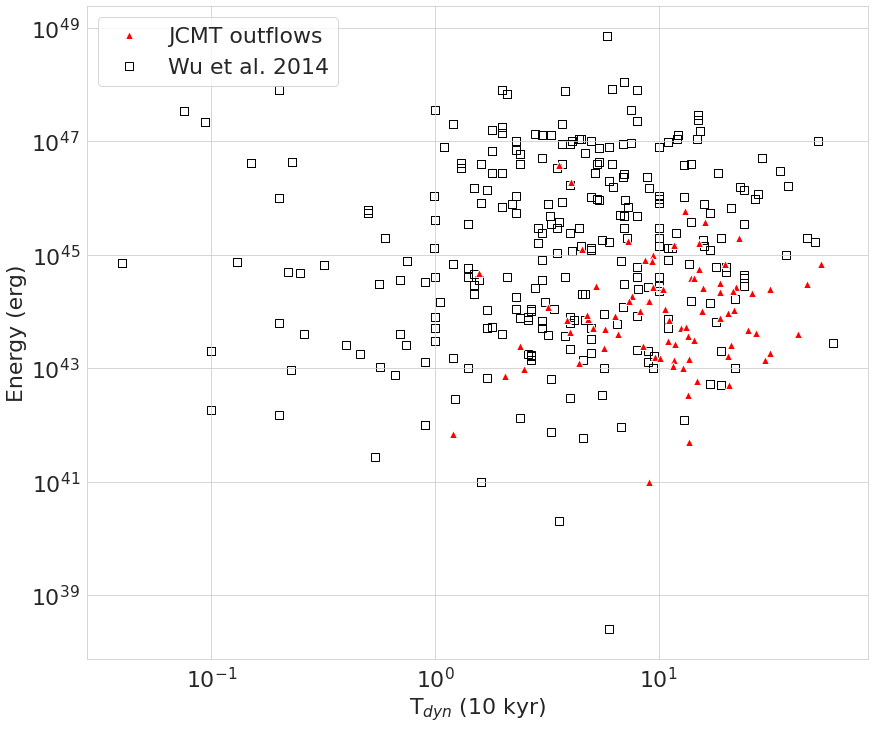

In [ ]:

####################################################################################################################
##########################                                             #############################################
##########################          WU COMPARISON SCATTER PLOTS        #############################################
##########################                                             #############################################
####################################################################################################################
#outflows = Table.read('cygxPilot_proto.fits')
outflows = outflowsCloud
mass_p= outflows['Mass']
dynTime_p = outflows['Dynamical Time']
energy_p = outflows['Energy']
energy_p2 = energy_p*1e44


table_wu = wu 
mass_wu=table_wu['Mass']
dynTime_wu = table_wu['t']
energy_wu = table_wu['E'] #remove rows with mass=0
energy_wu = (energy_wu).to(u.erg)

#gs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

#ax1 = fig.add_subplot(gs[0,0])
enlog = np.log10(energy_wu.value[energy_wu.value>1e40])
mlog = np.log10(mass_wu[energy_wu.value>1e40])

energy_p1 = np.array([energy_p])*1e44
mass_p1 = np.array([mass_p])

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(14,12),constrained_layout=False)
plt.loglog(energy_wu, mass_wu,'ks',color='black', markerfacecolor='none', markeredgecolor='black',zorder=0, label='Wu et al. 2014')
plt.loglog(energy_p2, mass_p,'r^', markeredgecolor='white', markersize=11, zorder=0, label='JCMT')
plt.xlabel('Energy (erg)')
plt.ylabel('Mass (M$_{\odot}$)')
#plt.axes().set_aspect(aspect=1.0)
#plt.xlim(left=1e40)
plt.legend(loc='upper left')

plt.savefig('Wu-Pilot.pdf',format='pdf',bbox_inches = 'tight', dpi=300,overwrite=True)
plt.show()
plt.close()

print('=========================+++++++++++++++++++++++++++++++++++++=========++++++++++++++++====================')
plt.figure(figsize=(14,12),constrained_layout=False)
plt.loglog(dynTime_p, energy_p2,'r^', markeredgecolor='white',markersize=8, label='JCMT outflows')
plt.loglog(dynTime_wu, energy_wu, 'ks', markerfacecolor='none', markeredgecolor='black', zorder=0,markersize=8, label='Wu et al. 2014')
plt.ylabel('Energy (erg)')
plt.xlabel('T$_{dyn}$ (10 kyr)')
plt.legend(loc='upper left')
plt.savefig('Wu-Pilot_dynT.pdf',format='pdf',bbox_inches = 'tight', dpi=300,overwrite=True)
plt.show()
plt.close()


In [ ]:
t_wu_mass = Table.read('asu_seq_mass.fit') #read both tables 1a and 1b
t_wu_L = Table.read('asu_seq_L.fit')
table_wu=join(t_wu_mass,t_wu_L,keys='Seq') #join them using according to sequence
table_wu.write('WuTable.fit')

In [ ]:
#################### EXTRACT AND PLOT MASS VS IR LUMINOSITY FROM WU TABLES ######################################## 

t_wu_mass = Table.read('asu_seq_mass.fit') #read both tables 1a and 1b
t_wu_L = Table.read('asu_seq_L.fit')
table_wu=join(t_wu_mass,t_wu_L,keys='Seq') #join them using according to sequence
#import arcpy as ap
#mass = arcpy.da.TableToNumPyArray(table_wu, ('Mass'))
#table_wu['Mass'].unit = u.solMass
mass=table_wu['Mass']
L_bol=table_wu['Lbol']
table_wu_mL=table_wu[table_wu['Lbol'] != 'NaN']
table_wu_mL=table_wu[table_wu['Mass'] != 0] #remove rows with mass=0
y_mass_wu=table_wu_mL['Mass']
x_L_wu=table_wu_mL['Lbol']
print(x_L_wu.shape,y_mass_wu.shape)

def converter(z): #convert L_bol string to float or NaN value for scatter plot
    try:
        return(np.float(z))
    except:
        return(np.nan)

L_wu_arr = np.array([converter(dummy_variable) for dummy_variable in x_L_wu]) #convert L_bol string to float 
print(L_wu_arr.shape,y_mass_wu.shape)

(759,) (759,)
(759,) (759,)


In [ ]:
from astropy.table import Table, vstack
t09 = QTable.read('Field09_output.fit')
t11 = QTable.read('field11_output.fit')
t12 = QTable.read('field12_output.fit')
t13 = QTable.read('field13_output.fit')
t15 = QTable.read('field15_output.fit')
t16 = QTable.read('field16_output.fit')
t17 = QTable.read('field17_output.fit')
t18 = QTable.read('field18_output.fit')
t19 = QTable.read('field19_output.fit')
t_newfields = vstack([t09,t11,t12,t13,t15,t16,t17,t18,t19])
t_newfields.write('table_newfields_output.fit', overwrite=True)

In [ ]:
from astropy.table import Table, vstack
t09i = QTable.read('Field09_input.fit')
t11i = QTable.read('field11_input.fit')
t12i = QTable.read('field12_input.fit')
t13i = QTable.read('field13_input.fit')
t15i = QTable.read('field15_input.fit')
t16i = QTable.read('field16_input.fit')
t17i = QTable.read('field17_input.fit')
t18i = QTable.read('field18_input.fit')
t19i = QTable.read('field19_input.fit')
t_newfields = vstack([t09i,t11i,t12i,t13i,t15i,t16i,t17i,t18i,t19i])

#############################################
########## This is a crude method of finding velocity center. 
########## Need to use centroid velocity (mean of v_centriod over the pv slice pixels)
Vc = np.zeros(len(t_newfields))*u.km/u.s
dist = np.zeros(len(t_newfields))*u.kpc
ID = np.empty_like(len(t_newfields))
RA = np.zeros(len(t_newfields))
Dec = np.zeros(len(t_newfields))
for z in range(len(t_newfields)):
    mean = ((t_newfields[z]['vbmin']+t_newfields[z]['vbmax'])/2+(t_newfields[z]['vrmin']+t_newfields[z]['vrmax'])/2)/2
    if mean == 0*u.km/u.s:
        Vc[z] = np.mean(t_newfields[z]['vbmax'],t_newfields[z]['vrmin'])
    else:
        Vc[z] = mean

for z in range(len(t_newfields)):
    if Vc[z] > 8*u.km/u.s: #high positive = W75
        dist[z] = 1.3*u.kpc
    elif Vc[z] < 8*u.km/u.s and Vc[z] > 0*u.km/u.s: # low positive=CygRift
        dist[z] = 0.65*u.kpc
    elif Vc[z] < 0*u.km/u.s:# low negative = DR21
        dist[z] = 1.5*u.kpc

        
for z in range(len(t_newfields)):
    ra_b = t_newfields[z]['RAJ2000_blue'] 
    dec_b = t_newfields[z]['DecJ2000_blue']
    ra_r = t_newfields[z]['RAJ2000_red']
    dec_r = t_newfields[z]['DecJ2000_red']

    RA[z] = (ra_b.value+ra_r.value)/2
    Dec[z] = (dec_b.value+dec_r.value)/2
    
    
t_newfields['RAJ2000'] = RA
t_newfields['DecJ2000'] = Dec
t_newfields['RAJ2000'].unit = u.deg
t_newfields['DecJ2000'].unit = u.deg
t_newfields['Vc'] = Vc
t_newfields['Distance'] = dist
t_newfields['ID'] = str(ID)
t_newfields.write('table_newfields_input.fit', overwrite=True)

In [ ]:
data = QTable.read('table_newfields_input.fit')
df = data.to_pandas()
data.info

<QTable length=37>
     name      dtype   unit   class  
------------- ------- ------ --------
         Name  bytes2          Column
 RAJ2000_blue float64    deg Quantity
DecJ2000_blue float64    deg Quantity
  RAJ2000_red float64    deg Quantity
 DecJ2000_red float64    deg Quantity
        vbmin float64 km / s Quantity
        vbmax float64 km / s Quantity
        vrmin float64 km / s Quantity
        vrmax float64 km / s Quantity
      RAJ2000 float64    deg Quantity
     DecJ2000 float64    deg Quantity
           Vc float64 km / s Quantity
     Distance float64    kpc Quantity
           ID  bytes1          Column

In [ ]:
###################################################################################################################

In [ ]:
cygX_init = QTable.read('table_newfields_input.fit')

FileNotFoundError: ignored

In [ ]:
###############################################################################################################
#################                                                                            ##################
#################            Use this combined input file to calculate mass, mom, energy     ##################
#################                                                                            ##################
###############################################################################################################

from astropy.table import QTable
from astropy import units as u

##### FUNCTIONS ##########################################################################################
def f(pb,pr): # pb = blue lobe pixel. USE A LINEAR FUNCTION JOINING BLUE AND RED LOBE PIXELS
    x0 = (pb[0]+pr[0])/2
    y0 = (pb[1]+pr[1])/2
    dx = np.abs(pb[0]-x0)
    dy = np.abs(pb[1]-y0) # since y0 is midpoint, the distances from pb[1] and pr[1] are the same 
    if np.abs(pr[0]-pb[0]) <= 1e-2: # if blue and red pixels are vertical so slope=infty
        xb = x0 - 2*dx # dx = 0 anyway; all x-coordinates are the same 
        xr = x0 + 2*dx
        if pb[1] < y0:
            yb = pb[1] - 2*dy # dist between mid point and blue pixel
            yr = pr[1] + 2*dy
        elif pb[1] > y0:
            yb = pb[1] + 2*dy
            yr = pr[1] - 2*dy
    else:
        m = (pr[1]-pb[1])/(pr[0]-pb[0]) # finite slope
        if pb[0] < x0:
            xb = x0 - 2*dx
            xr = x0 + 2*dx
            yb = y0 + m*(xb-x0)
            yr= y0 + m*(xr-x0)
        elif pb[0] > x0:
            xb = x0 + 2*dx
            xr = x0 - 2*dx
            yb = y0 + m*(xb-x0)
            yr = y0 + m*(xr-x0)
    pb2 = (xb,yb)
    pr2 = (xr,yr)
    return pb2, pr2

 ### DEFINE FUNCTIONS 

def length(s):
    if s%2 == 0: #modulo zero => even
        l = s/2
    else:
        l = (s+1)/2
    return l

def Jnu(T, nu=330.5*u.GHz):
    jnu = ((con.h * nu / con.k_B)
            / (np.exp(con.h * nu / (con.k_B * T)) - 1))
    return( jnu )

def G(v, Amp, V0, Sig0, Offset):
    return( Amp * np.exp(-(v-V0)**2/(2*Sig0**2))+Offset )

def Quad(v, c0, v0, c2):
    return( c0 + c2 * (v - v0)**2 ) # a + b(x-x0)^2 form

################################################################################################################    
# Read in data


cygX_init = QTable.read('table_newfields_input.fit') ### CHANGE FIELD NAME ###
cygX = SpectralCube.read('cygx_cobig.fits')
#proto = Table.read('asu (1).fit')
warnings.filterwarnings('ignore', category=UserWarning, append=True)
## CREATE EMPTY TABLE FOR OUTPUT MASS, MOMENTUM, ENERGY 
t = QTable(names=('Seq','ID','RAJ2000','DecJ2000','Mass', 'Momentum', 'Energy','Dynamical Time'),
           dtype=('i8','U10','f8','f8','f8','f8','f8','f8'))  
for z in range(0,len(cygX_init)):
    vbmin = cygX_init[z]['vbmin'] # BLUE WING
    vbmax = cygX_init[z]['vbmax']
    vrmin = cygX_init[z]['vrmin']
    vrmax = cygX_init[z]['vrmax'] # RED WING
    

    ra_b = cygX_init[z]['RAJ2000_blue'] 
    dec_b = cygX_init[z]['DecJ2000_blue']
    ra_r = cygX_init[z]['RAJ2000_red']
    dec_r = cygX_init[z]['DecJ2000_red']

    RA = (ra_b.value+ra_r.value)/2
    Dec = (dec_b.value+dec_r.value)/2
    
    distance = (cygX_init[z]['Distance']).to(u.pc).value

    cube_12co = cygX ### CHANGE FIELD NAME ###
    #cube_12co = SpectralCube.read('field13smooth.fits') ### CHANGE FIELD NAME ###
        ##### SLICE THE MAIN FIELD TO PRODUCE A SUBCUBE WITH CROPPED SPECTRAL AND SPECIAL AXES 

    _, b, _ = cube_12co.world[0, :, 0]  #extract latitude world coordinates from cube
    _, _, l = cube_12co.world[0, 0, :]  #extract longitude world coordinates from cube

    ##### Spatial boundary includes 50 pixels on each side from blue and red lobes 
    db = np.abs(cube_12co.wcs.celestial.wcs.get_cdelt()[0])*27#15
    dl = -(cube_12co.wcs.celestial.wcs.get_cdelt()[1])*30#20
    

    
    bmin = Dec-1*db
    bmax = Dec+1*db #these factors are introduced for adjusting the cropping wondow to make it symmetrical
    lmin = RA-dl
    lmax = RA+dl

    lat_range = [bmin, bmax]*u.deg 
    lon_range = [lmin, lmax]*u.deg
    print(RA,lon_range, Dec,lat_range)
    print(np.abs(RA-lon_range[0].value),np.abs(RA-lon_range[1].value),np.abs(Dec-lat_range[0].value),np.abs(Dec-lat_range[1].value))
    ##### Spectral boundary includes 15 km/s on each side of the vel range 
    dv = (cube_12co.spectral_axis[1]-cube_12co.spectral_axis[0]).value
    vlo = vbmin-15*u.km/u.s
    vhi = vrmax+15*u.km/u.s


    # Create a sub_cube cut around these coordinates
    #slab = cube_12co.spectral_slab(vlo, vhi) 
    #cube = slab.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
  
    #w = wcs.WCS(cube_12co.header)
    box = 15
    #pix_coord_center = cube_12co.wcs.wcs_world2pix(RA, Dec,0,0)
    #x0 = int(round(float(pix_coord_center[0]),0))
    #y0 = int(round(float(pix_coord_center[1]),0))
    x0, y0, _ = cube_12co.wcs.wcs_world2pix(RA, Dec, 0, 0)
    print(x0)
    print(y0)
    slab = cube_12co.spectral_slab(vlo, vhi) 
    subcube = slab[:, int(y0-box):int(y0+box), int(x0-box):int(x0+box)]

    ###############################################################################################################
    ###################################                             ###############################################
    ###################################  VISUALIZATION OF OUTFLOW   ###############################################
    ###################################                             ###############################################
    ###############################################################################################################

    ###################################################################################################################
    ### EXTRACT PIXEL COORDINATES FROM WORLD SKY COORDINATES 

    from astropy import wcs
    cdelt = utils.proj_plane_pixel_scales(subcube.wcs)
    cdelt
    #w = wcs.WCS(cube[0].header)
    pix_b_x, pix_b_y, _  = subcube.wcs.wcs_world2pix(ra_b.value,dec_b.value, 0,0)
    pix_r_x, pix_r_y, _ = subcube.wcs.wcs_world2pix(ra_r.value,dec_r.value, 0,0)

    xb = int(round(float(pix_b_x),0)) # These values are interger pixel numbers
    yb = int(round(float(pix_b_y),0))
    xr = int(round(float(pix_r_x),0) )     
    yr = int(round(float(pix_r_y),0))
   
    
    ##################################################################################################
    # create pv-slice (crop both spatial and spectral axes)

    pb = (xb,yb) # BLUE LOBE CENTER PIXEL 
    pr = (xr,yr) # RED LOBE CENTER PIXEL
    print(pb,pr)

    # create two extended points (pixels) along the pv-slice line 
    xbl = f(pb,pr)[0][0]
    ybl = f(pb,pr)[0][1]
    xrh = f(pb,pr)[1][0]
    yrh = f(pb,pr)[1][1]
    print(xbl,ybl,xrh,yrh)
    

    width = 1
    path = Path([(xbl, ybl), (xrh, yrh)], width) 
    #print(vbmin)
    slab=cygX.spectral_slab(vbmin, vrmax) # range from spectral bipolar plot
    #print(vbmin,slab.spectral_extrema[0])
    vslabmin = slab.spectral_extrema[0]
    vslabmax = slab.spectral_extrema[1]
    print(vslabmin,vslabmax)
    pvslice12 = extract_pv_slice(slab, path)
    
    ####################################################################################################
    ## spatial coordinates of pv-slice for green arrow display on contour map    
    coord_b_RA, coord_b_Dec, _ = subcube.wcs.wcs_pix2world(xbl,ybl,0,0)
    coord_r_RA, coord_r_Dec, _ = subcube.wcs.wcs_pix2world(xrh,yrh,0,0)
    
    dx_coord = coord_r_RA - coord_b_RA
    dy_coord = coord_r_Dec - coord_b_Dec
   
    ####################################################################################################################
    ##################################         SPECTRAL BIPOLARITY            ##########################################
    ####################################################################################################################
    pix = 2
    
    mb = subcube[:,(yb-pix):(yb+pix),(xb-pix):(xb+pix)].filled_data[:] 
    mr = subcube[:,(yr-pix):(yr+pix),(xr-pix):(xr+pix)].filled_data[:]

    fig = plt.figure(figsize=(14,12),constrained_layout=True)
    matplotlib.rcParams.update({'font.size': 14})

    gs = gridspec.GridSpec(nrows=2, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[:, 0:2])
    plt.plot(subcube.spectral_axis, nanmean(mb,axis=(1,2)).value/1.0,color='blue')
    plt.plot(subcube.spectral_axis, nanmean(mr,axis=(1,2)).value/1.0,color='red')
    plt.xlabel("$v_{\mathrm{LSR}}$ (km s$^{-1}$)")
    plt.ylabel("Intensity (K)")

    plt.axvline(x=vbmin.value,color='b',linestyle='--') 
    plt.axvline(x=vbmax.value,color='b',linestyle='--')
    plt.axvline(x=vrmin.value,color='r',linestyle='--')
    plt.axvline(x=vrmax.value,color='r',linestyle='--')

    plt.axhline(y=0,color='k',linestyle='--')
    
    xminvalue = subcube.spectral_axis.min().value
    xmaxvalue = subcube.spectral_axis.max().value
    plt.xlim(left=xminvalue)
    plt.xlim(right=xmaxvalue)
    plt.ylim(bottom=-5)
    
    contourmax_blue = nanmax(nanmean(mb,axis=(1,2))).value
    contourmax_blue = nanmax(nanmean(mr,axis=(1,2))).value
    ymaxvalue = nanmax([nanmax(nanmean(mb,axis=(1,2))).value,nanmax(nanmean(mr,axis=(1,2))).value])+10
    if ymaxvalue == NaN:
        yvalue = 20
    else:
        yvalue = ymaxvalue 
    plt.ylim(top=ymaxvalue)

    plt.axvspan(vbmin.value,vbmax.value,ymin=0,ymax=1,alpha=0.1, color='b')#ymin, ymax are in terms of %age of height to be covered 
    plt.axvspan(vrmin.value, vrmax.value,alpha=0.1, color='r')
    ax1.set_title('(a)')

    ####################################################################################################################
    ##################################                 CONTOUR                ##########################################
    ####################################################################################################################

    slab_blue=subcube.spectral_slab(vbmin, vbmax) #contour
    slab_red = subcube.spectral_slab(vrmin, vrmax) ######## CHANGE HERE #########
    slab_main = subcube.spectral_slab(vbmin, vrmax) 

    mom0_main =slab_main.moment(order=0)
    mom0_blue =slab_blue.moment(order=0)
    mom0_red =slab_red.moment(order=0)
    
    #mom0_main = nanmean(slab_main,axis=0)
    #mom0_blue = nanmean(slab_blue,axis=0)
    #mom0_red = nanmean(slab_red,axis=0)

    matplotlib.rcParams.update({'font.size': 13})

    ax2 = fig.add_subplot(gs[0,2:],projection=subcube.wcs.celestial)#1,1,subplot_kw={'projection':subcube.wcs.celestial})
    im1=ax2.imshow((mom0_main.value),interpolation='nearest',label='$^{12}CO$',
                  origin='lower', cmap='gray',vmin=nanmin(mom0_main).value,vmax=nanmax(mom0_main).value)
    clb=plt.colorbar(im1)
    ax2.set_ylabel("Dec (J2000)")
    ax2.set_xlabel("RA (J2000)")
    ax2.set_autoscale_on(False)

    lat = ax2.coords[0]
    lat.set_major_formatter('hh:mm:ss')
    lon = ax2.coords[1]
    lon.set_major_formatter('dd:mm')


    clb.set_label('$^{12}$CO Integrated Intensity (K km s$^{-1}$)', labelpad=5, y=.5, rotation=90)
    cs = ax2.contour(mom0_blue.value,colors="blue",levels=(np.array([0.25,0.5,0.75,1]))*int(nanmax(mom0_blue).value))
    cs = ax2.contour(mom0_red.value,colors="red",levels=(np.array([0.25,0.5,0.75,1]))*int(nanmax(mom0_red).value))
    ax2.arrow(coord_b_RA, coord_b_Dec, dx_coord, dy_coord, transform=ax2.get_transform('world'), width=.0005,edgecolor='black',
         facecolor='green')
    ax2.scatter(RA, Dec,transform=ax2.get_transform('world'),marker='+',s=250,edgecolor='black', facecolor='cyan')
    ax2.scatter(proto['RAJ2000'].data, proto['DEJ2000'].data,transform=ax2.get_transform('world'), marker='*', 
            s=200,edgecolor='black',facecolor='yellow')
    ax2.set_title('(b)')

    ########################################################################################################
    ##################################                  PV-SLICE              ##############################
    ########################################################################################################
    matplotlib.rcParams.update({'font.size': 13})
    path = Path([(xbl, ybl), (xrh, yrh)], width=1)
    slab=subcube.spectral_slab(vbmin, vrmax) # range from spectral bipolar plot
    print('path:',(xbl, ybl), (xrh, yrh))
    print(vbmin,vrmax,slab.spectral_extrema[0],slab.spectral_extrema[1])
    vslabmin = slab.spectral_extrema[0]
    #print(vslabmin)
    pvslice12 = extract_pv_slice(slab, path)

    #############################################################################################
    # 2. CREATE X AND Y TICK LABELS IN POSITION AND VELOCITY VALUES 

    a_deg = (2*(subcube.wcs.celestial.wcs.get_cdelt()[0])**2)**.5
    a_min = a_deg*60
    xmin = 0
    xmax = pvslice12.shape[1]*a_min # shape of spetial axis * spatial resolution in arcmin
    ticks_x = np.linspace(xmin,xmax,6)
    ticklabels_x = ["{:3.1f}".format(i) for i in (ticks_x)]

    dv_12co = (subcube.spectral_axis[1]-subcube.spectral_axis[0]).value #spectral axis resolution of 12co raw data 
    ymin = vslabmin.value # min velocity km/s obtained from spectral bipolar plot ###### CHANGE HERE ######
    ymax = pvslice12.shape[0]*dv_12co + ymin # shape of spectral axis * vel resolution in km/s
    ticks_y = np.linspace(ymin, ymax, 6) # show 8 (arbitrary) y ticks
    ticklabels_y = ["{:3.0f}".format(i) for i in (ticks_y)]

    ############################################################################################################
    # 3. PLOT
    ax3 = fig.add_subplot(gs[1,2:]) 
    plt.imshow(pvslice12.data[::-1,:],aspect='auto',cmap='gray',extent=[xmin, xmax, ymin,ymax])
               #vmin = min(0,nanmin(pvslice12.data[::-1,:])),vmax = nanmax(pvslice12.data[::-1,:])*1)#
    clb = plt.colorbar()
    clb.set_label('$^{12}$CO  $T_{\mathrm{R}}$ (K)', labelpad=5, y=.5, rotation=90)
    cs = ax3.contour(pvslice12.data[::-1,:],aspect='auto',origin='upper',extent=[xmin, xmax, ymin,ymax],colors="white",
                     levels=(np.array([0.25,0.5,0.75,1]))*int(nanmax(pvslice12.data[::-1,:])))
    plt.ylabel("Velocity Offset (km s$^{-1}$)")
    plt.xlabel("Position Offset (arcmin)")
    ax3.set_title('(c)')

    plt.savefig('NewFields'+str(z+1),format='pdf',bbox_inches = 'tight', dpi=300,overwrite=True)
    plt.close()
    print('success_plots',ymin,ymax)
    print('checkpointB:',z+1)
    
    
    ####################################################################################################################
    #######################                                                   ##########################################
    #######################           13CO MASS FROM 12CO DATA                ##########################################
    #######################                                                   ##########################################
    ####################################################################################################################
  
    vaxis = subcube.spectral_axis.value

    # Width of PV slice based on beamsize # check header file #
    from astropy.wcs import utils 
    ang_width = 1 * 14.6 * u.arcsec
    cdelt = utils.proj_plane_pixel_scales(subcube.wcs)
    width = (ang_width / (cdelt[0] * u.deg)).to(u.dimensionless_unscaled).value

    # Extract matched PV slices
    path = Path([(xb, yb), (xr, yr)], width=1)
    slice12 = extract_pv_slice(subcube, path)
    slicewt = extract_pv_slice(np.ones(subcube.shape), path)
    slcshape = slice12.data.shape

    v0array = np.zeros(slice12.data.shape[1])
    sig0array = np.zeros(slice12.data.shape[1])
    amparray= np.zeros(slice12.data.shape[1])

    # Now calculate the opacitypoptblue, pcov = optimize.curve_fit(Quad, vaxis[EndFitBlue:StartFitBlue],(blue12 / blue13)[EndFitBlue:StartFitBlue],p0 = (c0, v0, c2),maxfev = 1000000)
    Tpeak = np.max(slice12.data)
    nu = 330.588 * u.GHz
    Tbg = 2.73 * u.K
    Aul = 6.038e-7 / u.s
    B0 = 54891.42 * u.MHz
    E3 = 30 * u.K
    Tex = ((con.h * nu / con.k_B)
           / np.log(1 + con.h * nu
                    / (con.k_B * (Tpeak * u.K + Jnu(Tbg, nu=nu)))))
    Tex = Tex.to(u.K)

    co13slice = np.zeros_like(slice12.data)

    DeltaNu = np.abs((vaxis[1] - vaxis[0]) * u.km / u.s/ con.c * nu).to(u.Hz)
    DeltaV = np.abs((vaxis[1] - vaxis[0]) * u.km/u.s)

    log_co13slice = 2.074571 * np.log10(slice12.data) - 2.699635
    co13slice=10**log_co13slice

    tau13dnu = co13slice * DeltaV 

    N13co = (8 * np.pi * nu**3 / con.c**3 / Aul
             /(np.exp(con.h * nu / con.k_B / Tex) - 1) * tau13dnu
             )
    Qrot = con.k_B * Tex / (con.h * B0) * np.exp(con.h * B0
                                                 / (3 * con.k_B * Tex))
    # Calculate column density of material
    N13coTot = Qrot / 7 * np.exp(E3 / Tex) * N13co # g_u=7 for u=3, l=2 transition Qrot
    # Assume a column density ratio
    NH2 = (7.5e5 * N13coTot).to(u.cm**(-2))

    apix = np.prod(
        np.abs(np.array([width, 1]) 
               * (subcube.wcs.celestial.wcs.get_cdelt())
            / 180 * np.pi * distance)) * u.pc**2
    Mass12 = (NH2 * con.m_n * 2.32 * apix).to(u.solMass)

    ############################################ sigma calculation #####################################################
    slcshape=slice12.data.shape 
    Tpeak=np.ones(slcshape[1])
    vpeak=np.ones(slcshape[1])
    sigma12=np.ones(slcshape[1])
    vaxis=subcube.spectral_axis.value
    for i in range(slcshape[1]):
            spec=slice12.data[:,i]
            Tpeak[i]=np.nanmax(spec)
            vpeak[i]=vaxis[np.nanargmax(spec)]
            hf=Tpeak[i]/2
            #plt.plot(vaxis,spec)
            #plt.axvline(x=vpeak[i],color='r',linestyle='--')
            #plt.axhline(y=hf,color='k')
            #plt.show()
            vraw=vaxis[spec>=hf] # vraw may be completely to the left or right on vpeak value, ideally on both sides
            #print('vpeak:',vpeak[i])
            #print('vraw:',vraw)
            vp=vraw[vraw>=vpeak[i]]
            #print('vp:',vp)
            vn=vraw[vraw<=vpeak[i]]
            #print('vn:',vn)
            vp_max=np.max(vp)
            vn_max=np.min(vn)
            if np.abs(vp_max-vpeak[i]) == 0:  # This condition makes sure sigma is not zero
                HWHM = np.abs(vn_max-vpeak[i])
            elif np.abs(vn_max-vpeak[i]) == 0:
                HWHM = np.abs(vp_max-vpeak[i])
            else:
                HWHM=np.minimum(np.abs(vp_max-vpeak[i]),np.abs(vn_max-vpeak[i]))
            sigma12[i]=HWHM/((2*np.log(2))**0.5)

    ################################ MINIMIZATION OF ENERGY BASED ON H2 MASS (PROJECTED 13CO) ######################
    #### energy of the entire spectrum under the spectrum profile for each pixel wrt Tpeak velocity
    #### This finds the line center at which E=min for each position
    from astropy import units as u
    N=int(slcshape[0]/2) #this integer must be less than spectral pixel number
    Energy=np.zeros(N)
    vcen=np.zeros(shape=(slcshape[1],N)) # this number must be less than spectral pixel number
    vcentr=np.zeros(slcshape[1]) # dim should be equal to the number of spatial pixels along the mass pv slice

    for i in range(slcshape[1]):
        l=vpeak[i]-5*sigma12[i]
        u=vpeak[i]+5*sigma12[i]
        vcen[i,:]=np.linspace(l,u,N) # half of spectral pixels     
    
    for i in range(slcshape[1]):
        spec=slice12.data[:,i]
        vpeak[i]=vaxis[np.nanargmax(spec)]
        for j in range(N):
            voff=vaxis-vcen[i,j]#*u.km**2/u.s**2
            Energy[j]=(np.nansum(Mass12[:,i].value*voff**2))#.to(u.erg)#SUM OVER 1445 VEL VALUES
        voff_argmin=voff[np.nanargmin(Energy)]
        vcentr[i]=vcen[i,:][np.nanargmin(Energy)]#*u.km/u.s#finds vcen_value(among 1e3 vcen values)at which E=min
        

    ############## MASS OF THE RED AND BLUE WINGS BASED OF ONLY 12CO DATA ##############################################
    # fit a gaussian with mean=vcentr and var=sigma12^2 to 12CO data
    # For wing mass calculate mass beyond 3 sigma limit on either side

    ####################################### WING MASS CALCULATION ##################################################
    from astropy import units as u
    subcubenoise=subcube 
    subcubenoise_bslab=subcube.spectral_slab(vbmin-10*u.km/u.s, vbmin-5*u.km/u.s)
    #print('test1:',vbmin-10*u.km/u.s, vbmin-5*u.km/u.s) #test1
    subcubenoise_rslab=subcube.spectral_slab(vrmax+5*u.km/u.s, vrmax+8*u.km/u.s)
    #print('test2:',vrmax+5*u.km/u.s, vrmax+10*u.km/u.s)
    rms12bnoise = np.nanstd(np.array(subcubenoise_bslab)) # noise from the blue wing side of the spectrum 
    rms12rnoise = np.nanstd(np.array(subcubenoise_rslab)) # noise from the red wing side of the spectrum 
    rms12noise = np.nanmean([rms12bnoise,rms12rnoise]) ## if noise is NaN Blue/Red counter=0 => symm pixels #

    #print(co12noise_slab.shape[0],rms12noise)
    momentum = np.zeros(slice12.data.shape[1])
    energy = np.zeros(slice12.data.shape[1])
    massvec = np.zeros(slice12.data.shape[1])
    vrange = np.zeros(slcshape[1]) ### OF velocity defined
    for i in range(slcshape[1]):
        voff = vcentr[i]-vaxis
        spec=slice12.data[:,i]
        zl=np.zeros(10)
        zr=np.zeros(10)
        Blue=0
        Red=0
        for j in range(10):
            zl=np.nanargmin(np.abs(vaxis - (vcentr[i]-(1.5+0.3*j)*sigma12[i])))#identify spectral axis pixel at mu-2*sigma
            zr=np.nanargmin(np.abs(vaxis - (vcentr[i]+(1.5+0.3*j)*sigma12[i])))
            spec_left=spec[zl] #emission at mu-multiple of sigma
            spec_right=spec[zr]#identify emission at mu+multiple of sigma 
            if np.abs(spec_left-spec_right)>1*rms12noise: # check if the emission diff is not just noise fluctuation
                            #print('test3:',spec_left-spec_right,rms12noise)
                            if spec_left > spec_right:
                                    Blue=Blue+1
                            elif spec_left < spec_right:
                                   Red=Red+1
                            else: #when mu-sigma and mu+sigma have same emission value don't increase the counter
                                    Blue=Blue
                                    Red=Red
            else:#when emission diff is below noise fluctuation 
                            #print('test4:',spec_left-spec_right,rms12noise)
                            pass
        #print(Blue,Red)
        if Blue >= 5:#then this spatial pixel contains blueshifted wing
            zl = np.nanargmin(np.abs(vaxis - (vcentr[i]-2*sigma12[i])))#identify spectral axis pixel at mu-2*sigma
            spec_left=spec[zl] #emission array at velocity-pixels to the left of mu-2*sigma pixel                 
            v_left= vaxis[zl] #spectral axis value at mu-2*sigma) 
            idx = (vaxis < v_left) & (vaxis > vbmin.value) ## CHANGE
            massvec[i] = np.nansum(Mass12[idx, i]).to(u.M_sun).value
            momentum[i] = np.nansum(Mass12[idx, i] * np.abs(voff[idx])).to(u.M_sun).value
            energy[i] = 0.5 * np.nansum(Mass12[idx, i] * voff[idx]**2).to(u.M_sun).value
            idx_l=(vaxis <=vcentr[i]) ####################### outflow velocity ##########################
            l=(vaxis[idx_l]).shape
            for k in range(slcshape[0]-l[0],slcshape[0]):
                if spec[k]<=rms12noise:
                    #print(k,spec[k],rms12noise)
                    vrange[i]=np.abs(vaxis[k]-vcentr[i])
                    break
            #print('length=',vrange[i]) ###################################################################
        elif Red >= 5:#this pixel contains red shifted wing 
            zr=np.nanargmin(np.abs(vaxis - (vcentr[i]+2*sigma12[i])))#uniquely identify mu+2*sigma velocity-pixel
            v_right=vaxis[zr]
            idx = (vaxis > v_right) & (vaxis < vrmax.value) ## CHANGE
            massvec[i] = np.nansum(Mass12[idx, i]).to(u.M_sun).value
            momentum[i] = np.nansum(Mass12[idx, i] * np.abs(voff[idx])).to(u.M_sun).value
            energy[i] = 0.5 * np.nansum(Mass12[idx, i] * voff[idx]**2).to(u.M_sun).value
            idx_r=(vaxis >= vcentr[i])####################### outflow velocity ##########################
            r=(vaxis[idx_r]).shape
            for k in range(r[0],0,-1):
                #print(k,spec[k])
                if spec[k]<=rms12noise:
                    vrange[i]=np.abs(vaxis[k]-vcentr[i])
                    break
        else:
            #print('symmetrical pixel')
            pass   
    mass = massvec.sum()*u.solMass
    mom = momentum.sum()*u.solMass*u.km/u.s
    en = (energy.sum()*u.solMass*u.km**2/u.s**2).to(u.erg)/(1e44*u.erg)
    
    # calculate dynamical time
    D = ((xb-xr)**2+(yb-yr)**2)**0.5
    len_pix=(np.sqrt(subcube.wcs.celestial.wcs.get_cdelt()[0]**2+subcube.wcs.celestial.wcs.get_cdelt()[1]**2))*(np.pi/180)*distance
    print('pixlel length',len_pix)
    
    t_dyn=((D/2)*len_pix*u.pc/(sigma12.max()*u.km/u.s)).to(10*u.kyr)
    
    t.add_row([z+1,cygX_init[z]['ID'], RA, Dec,mass.value, mom.value, en.value,t_dyn])
    print('checkpointB:',z+1)
 
t['RAJ2000'].unit = u.deg
t['DecJ2000'].unit = u.deg
t['Mass'].unit = u.solMass
t['Momentum'].unit = u.solMass*u.km/u.s
t['Energy'].unit = 1e44*u.erg
t['Dynamical Time'].unit = 10*u.kyr

t.write('NewFields_ouput.fit',overwrite=True) ### CHANGE NAME ###
t

MemoryError: Unable to allocate 10.7 GiB for an array with shape (1, 171, 4096, 4096) and data type float32

In [ ]:
t_newfields = QTable.read('table_newfields_output.fit')
mass_newfields = t_newfields['Mass']
energy_newfields = t_newfields['Energy']
#print(mass_newfields,energy_newfields)
t_newfields.info

<QTable length=37>
  name    dtype       unit       class  
-------- ------- -------------- --------
     Seq  bytes1                  Column
    Mass float32        solMass Quantity
Momentum float32 km solMass / s Quantity
  Energy float32      1e+44 erg Quantity

In [ ]:
energy_newfields1 = np.array([energy_newfields])*1e44
mass_newfields1 = np.array([mass_newfields])
mass_newfields1

array([[1.58127   , 0.8475314 , 0.        , 0.5301632 , 0.9989282 ,
        0.05055046, 0.715889  , 0.04350829, 2.541755  , 0.        ,
        0.4659264 , 0.37222394, 0.29553765, 0.        , 2.0458255 ,
        4.63476   , 3.3951519 , 0.19374014, 0.4035009 , 0.05703996,
        0.8524951 , 0.08903384, 0.15990734, 0.24721034, 5.3492455 ,
        1.1934743 , 0.11870946, 0.12166034, 0.03851866, 0.        ,
        0.04863416, 1.3201663 , 6.3356805 , 0.21809663, 2.975673  ,
        4.097908  , 1.0190675 ]], dtype=float32)

In [ ]:
####################################################################################################################
##########################                                             #############################################
##########################          WU COMPARISON SCATTER PLOTS        #############################################
##########################                                             #############################################
####################################################################################################################

dynTime_wu = table_wu_mL['t']
energy_wu = table_wu_mL['E'] #remove rows with mass=0
energy_wu = (energy_wu).to(u.erg)

plt.figure(figsize=(10,8),constrained_layout=False)

matplotlib.rcParams.update({'font.size': 14})

#gs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

#ax1 = fig.add_subplot(gs[0,0])
enlog = np.log10(energy_wu.value[energy_wu.value>1e40])
ylog = np.log10(y_mass_wu[energy_wu.value>1e40])

energy_newfields = np.array([energy_newfields])*1e44
mass_newfields = np.array([mass_newfields])

plt.loglog(energy_wu,y_mass_wu,'ks',color='black', markerfacecolor='none', markeredgecolor='black',zorder=0)

plt.loglog(energy_newfields1, mass_newfields1,'r^', zorder=5, markeredgecolor='white',markersize=11)

plt.xlabel('Energy (ergs)')
plt.ylabel('Mass (M$_{\odot}$)')
#plt.axes().set_aspect(aspect=1.0)
#plt.xlim(left=1e40)
#plt.legend(loc='upper left')
#ax1.set_title('(a)')


#plt.show()
plt.savefig('Wu-newfields12co.pdf',format='pdf',bbox_inches = 'tight', dpi=1200,overwrite=True)

In [ ]:
energy_wu.max(),energy_wu.min(),energy_newfields.min(),energy_newfields.max()

(<Quantity 7.1e+48 erg>,
 <Quantity 0. erg>,
 <Quantity 0.05888069 1e+44 erg>,
 <Quantity 1.5997716 1e+44 erg>)

In [ ]:
y_mass_wu.max(),y_mass_wu.min(),mass_newfields.min(),mass_newfields.max()


(3317.0, 0.0004, <Quantity 0.05703996 solMass>, <Quantity 5.3492455 solMass>)

In [ ]:
#################################################################################################################################################################################################################################
######################################################          MACHINE LEARNING MODELS WITH OUTFLOWS           #################################################################################################################
#################################################################################################################################################################################################################################

In [ ]:
# Import DataSci packages and classes  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# >>>>>> folder : google drive > Work > Research Info > Research 2021 > Pilotsurvey_newfields || files: cygxPilot_proto.fits, WuTable.fit,cygx_pilot_protostars(Kry).fit, outflowsClouds_output.fit, 

import pandas as pd
import numpy as np

# We'll use this later
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# This is new, it will allow us to interact with
# 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

# Import astrohysics classes and packages ---->>>>>
# DOne in the first cell



# Import custom-built functions and files 
from google.colab import files
uploaded = files.upload() 

In [ ]:
#############################################################################################################
## >>>>>>>>>>>>>>>>> Alternative way of uploading and reading files >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#############################################################################################################

from google.colab import drive
drive.mount('/content/gdrive')

filepath = '/content/gdrive/MyDrive/0.Work/RESEARCH_INFO/Research_2021/PilotSurvey_Newfields/'
#filepath = "C:\\Users\\Uber-PC\\Google Drive\\0.Work\\CourseworkStudyMaterial\\Data_Science\\Fall2021\\Erdos_GitHub\\fall-2021\\python prep\\Practice Problems\\" # <<<< this only works with Jupyter Notebook 
           #"C:\Users\Uber-PC\Google Drive\0.Work\CourseworkStudyMaterial\Data_Science\Fall2021\Erdos_GitHub\fall-2021\python prep\Practice Problems\random_walk.csv"



proto = Table.read(filepath + 'cygx_pilot_protostars(Kry).fit')
wu = Table.read(filepath + 'WuTable.fit')
outflowsCloud = Table.read(filepath + 'outflowsClouds_output.fit')

Mounted at /content/gdrive


In [ ]:
def converter(z):
  try:
    return(np.float(z))
  except:
    return(np.nan)

In [ ]:
wu = Table.read('WuTable.fit')
wu_Lbol = np.array([converter(dummy_variable) for dummy_variable in wu['Lbol']])
print(len(wu_Lbol[~np.isnan(wu_Lbol)]))


pilotL = Table.read('cygxPilot_proto.fits')
print(pilotL[:5])

#pilotLk = Table.read('cygx_pilot_protostars(Kry).fit')
#print(pilotLk[:5])

outflowsCloud = Table.read('outflowsClouds_output.fit')
outflowsCloud.info()

clouds_df = outflowsCloud.to_pandas()
clouds_df.head(3) # units: Mass-SolMass, km/s solMass, 10^44 erg, 10 kyr, 

577
      ID           RAJ2000       ...      logL_proto        alpha_proto    
                     deg         ...        solLum                         
------------- ------------------ ... ------------------- ------------------
G79.886+2.552          306.12695 ...   1.871000051498413 0.1599999964237213
G79.962+2.556 306.19627708350004 ... -0.5099999904632568  0.949999988079071
G80.149+2.710       306.15387495 ...  1.2389999628067017                2.0
G80.158+2.727            306.144 ...   1.156000018119812 0.8399999737739563
G80.815+0.661           308.9185 ... 0.15600000321865082 1.4299999475479126
<Table length=84>
        name          dtype       unit         class     n_bad
-------------------- ------- -------------- ------------ -----
                 Seq   int64                      Column     0
                  ID bytes13                      Column     0
             RAJ2000 float64            deg       Column     0
            DecJ2000 float64            deg       Colum

,Seq,ID,RAJ2000,DecJ2000,Mass,Momentum,Energy,Dynamical Time,Cloud_Mass,Cloud_Energy,Energy_(of/cloud+of)
0,1,b'G79.886+2.552',306.126950,42.071950,0.380605,1.983723,1.509977,8.988472,9.153315,5.683432,0.209911
1,4,b'G79.962+2.556',306.196277,42.137068,0.011388,0.101831,0.097026,2.509291,3.616023,1.515168,0.060183
2,3,b'G80.149+2.710',306.153875,42.375949,0.191218,0.633989,0.228813,5.672218,43.680866,3.538274,0.060740


In [ ]:
##############     DO NOT DELETE THIS>>> THIS IS MODIFYING WU TABLE NECESSARY  #########################################

# REGRESSION MODEL OF L_bol ON MASS, ENERGY, DYN TIME >>>>>>>>>>>>>>>>>> BASED ON WU DATA ONLY <<<<<<<<<<<<<<<<<<<<<<<<<<
from pandas.plotting import scatter_matrix
def converter(z):
  try:
    return(np.float(z))
  except:
    return(np.nan)

wu['t'] = wu['t'].to(10*u.kyr)
wu['E'] = (wu['E']).to(1e44*u.erg)
wu['Lbol'] = np.array([converter(dummy_variable) for dummy_variable in wu['Lbol']])*u.solLum
print('NaNs in the data \n Lbol',len(wu[np.isnan(wu['Lbol'])]), '\n Mass', len(wu[np.isnan(wu['Mass'])]), '\n Energy', len(wu[np.isnan(wu['E'])]), '\n ................')

# clean data
wu_refined = (wu[~np.isnan(wu['Lbol'])]) # removes all entries with NaN Lbol values
print('NaNs in the data \n Lbol',len(wu_refined[np.isnan(wu_refined['Lbol'])]), '\n Mass', len(wu_refined[np.isnan(wu_refined['Mass'])]), '\n Energy', len(wu_refined[np.isnan(wu_refined['E'])]), '\n ................')
wu_refined = wu_refined[wu_refined['t'] > 0]
wu_refined = wu_refined[wu_refined['Mass'] > 0]
wu_refined = wu_refined[wu_refined['E'] > 0]

wu_df = (wu_refined.to_pandas())[['Mass', 'E', 't', 'Lbol']]

#  add log values
wu_df['logMass'] = np.log10(wu_df['Mass'])
wu_df['logE'] = np.log10(wu_df['E'])
wu_df['logt'] = np.log10(wu_df['t'])
wu_df['logLbol'] = np.log10(wu_df['Lbol'])

print(wu_df.head(3))
print(wu_df.describe())


logMass_range = ((wu_df['logMass'].mean() - 3.3 * np.sqrt(wu_df['logMass'].var()), wu_df['logMass'].mean() + 3.3 * np.sqrt(wu_df['logMass'].var())))
logE_range = ((wu_df['logE'].mean() - 3.3 * np.sqrt(wu_df['logE'].var()), wu_df['logE'].mean() + 3.3 * np.sqrt(wu_df['logE'].var())))
logt_range = ((wu_df['logt'].mean() - 3.3 * np.sqrt(wu_df['logt'].var()), wu_df['logt'].mean() + 3.3 * np.sqrt(wu_df['logt'].var())))
logLbol_range = ((wu_df['logLbol'].mean() - 3.3 * np.sqrt(wu_df['logLbol'].var()), wu_df['logLbol'].mean() + 3.3 * np.sqrt(wu_df['logLbol'].var())))

print('mass range = ',logMass_range, '\n energy range =', logE_range, '\n dynamical time range = ', logt_range, '\n Lbol range = ', logLbol_range)

#len(wu_df[(wu_df['logMass']) == -inf])

NaNs in the data 
 Lbol 387 
 Mass 0 
 Energy 0 
 ................
NaNs in the data 
 Lbol 0 
 Mass 0 
 Energy 0 
 ................
    Mass        E     t      Lbol   logMass      logE      logt   logLbol
0  45.50  8000.00   8.0  460000.0  1.658011  3.903090  0.903090  5.662758
1   1.13     6.11  18.0      12.9  0.053078  0.786041  1.255273  1.110590
2   1.52    13.20  11.5       9.9  0.181844  1.120574  1.060698  0.995635
             Mass            E           t  ...        logE        logt     logLbol
count  239.000000   239.000000  239.000000  ...  239.000000  239.000000  239.000000
mean    20.610805   466.626067    7.311573  ...    1.084968    0.564670    2.673257
std     53.482634  1391.951695    8.889137  ...    1.590377    0.575400    1.720953
min      0.000400     0.000002    0.075000  ...   -5.602060   -1.124939   -0.744727
25%      0.300000     0.700000    1.750000  ...   -0.154902    0.242861    1.146128
50%      3.400000    14.000000    4.100000  ...    1.146128    0.612

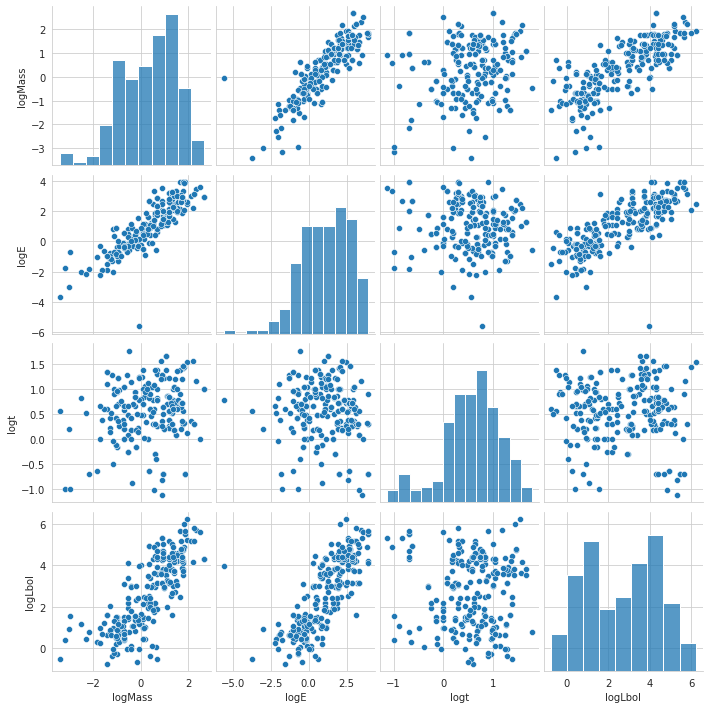

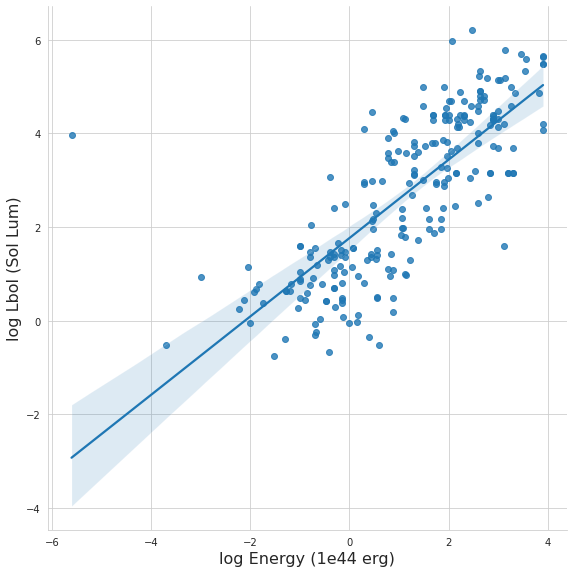

In [ ]:
# inter relationships among variables in Wu data
print((wu_df[features]).corr())

## Examine the scatter matrix here

features = ['logMass', 'logE', 'logt', 'logLbol']
#scatter_matrix(wu_df[features],figsize=(12,12))
sns.pairplot(wu_df[features])
plt.show()
plt.close()

## Quick plot
## sns.lmplot here

print('----------------')
sns.lmplot(data=wu_df, x='logE', y='logLbol', hue=None, height=8, ci=95)

plt.xlabel("log Energy (1e44 erg)", fontsize = 16)
plt.ylabel("log Lbol (Sol Lum)", fontsize = 16)

plt.show()

plt.close()

In [ ]:

## Code here -------------->>>>>>>>>>>---------->>>>>>>>>>>>>
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import LinearRegression

#######################################    DEFINE FUNCTIONS   ##################
# This returns the power set of a set minus the empty set
def powerset_no_empty(s):
    power_set = []
    x = len(s)
    for i in range(1 << x): # this is a range from 0 to 2^n so all cases in a powerset 
        power_set.append([s[j] for j in range(x) if (i & (1 << j))])
            
    return power_set[1:]

## This gets our data for us
def get_X_y(df,features,target):
    # Returns X then y
    return np.array(df[features]), np.array(df[target])

## this calculates the mse
def get_mse(model, X, y):
    # fit the model and get coeffs
    model.fit(X,y)
    print('models beta and intercept:', model.coef_, model.intercept_)

    # get the prediction
    pred = model.predict(X)

    # Returns the mse
    return np.sum(np.power(pred-y,2))/len(y)




# MODEL SELECTION USING Kfold CROSS VALIDATION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

#   SELECT DATA  
features = ['logMass', 'logE', 'logt']
target = [ 'logLbol']
wu_train = wu_df.copy().sample(frac = .85, random_state = 614)


# possible_features creates a set of all combinations (nC1 + nC2 + nC3 +...+ nCn) of existing n features in the original dataset 
possible_features = powerset_no_empty(features)

###############    BUILD THE MODEL   K##########################################
## Now we make a kfold object w/ 5 splits and shuffle the data before making the splits
kfold = KFold(n_splits = 5, shuffle = True, random_state = 440)

## Now make an array that will hold the mses
## for all the models
## the ROWs represent each possible model
MSEs = np.empty((len(possible_features),5))

## Make a regression model
reg = LinearRegression(copy_X = True)

################ DO THE REGRESSION in kfolds AND CALCULATE ERRORS ########################
for j in range(len(possible_features)): # possible_features contains the powerset of features, range = len=2^number of features = 127 cases
        ## get X and y
        X, y = get_X_y(wu_train, possible_features[j], target) # this returns X matrix and y vector after removing all features right away before train-test split except for the ones needed for this specific model,  
        print('features', possible_features[j], 'X matrix shape:', X.shape) # but keeps all observations on those selected features

        
        ## Perform Cross Validation
        i = 0
        for train_index, test_index in kfold.split(X): # this splits X-matrix into k=5 equal subsets of observations (but keeps all features)
          ## For each possible model
          n_j = 0
    
          # Get the cv train test split
          X_train, X_test = X[train_index], X[test_index] # these indices come from the k-fold split we are in 
          y_train, y_test = y[train_index], y[test_index]
          print('test split size=', test_index.shape)
          # Cloning the regression makes a fresh regression 
          # model for each run
          clone_reg = clone(reg)
        
          # fit the model
          clone_reg.fit(X_train,y_train)

          #get coeffs
          #print(clone_reg.coef_, clone_reg.intercept_)
        
          MSEs[j,i] = get_mse(clone_reg, X_test, y_test)
          ## We'll now move to the next split
          i +=1
        print('X-train matrix shape:', X_train.shape)
        print('-------------------------------------------')

    #print('Number of MSEs or models with different collections of features per data split (total of 5 data splits) :', n_j )
    
         
print('The',MSEs.shape[0]*MSEs.shape[1],'MSEs for',MSEs.shape[0]*MSEs.shape[1],'models (', MSEs.shape[0]*MSEs.shape[1],'possible combinations of features/variables), each \n averaged over 5 cross-validation data sets are', MSEs.mean(axis=1))
print('-------------------------------------------')
print('The model number', np.argmin(MSEs.mean(axis=1)), 'has the least average CV MSE of', MSEs.mean(axis=1).min())
print('and this model has features = ', possible_features[np.argmin(MSEs.mean(axis=1))])


features ['logMass'] X matrix shape: (203, 1)
test split size= (41,)
models beta and intercept: [[1.37159895]] [2.14453966]
test split size= (41,)
models beta and intercept: [[1.22354273]] [2.03319442]
test split size= (41,)
models beta and intercept: [[1.14258403]] [2.30257032]
test split size= (40,)
models beta and intercept: [[1.11722918]] [2.27672336]
test split size= (40,)
models beta and intercept: [[1.15408439]] [2.60056407]
X-train matrix shape: (163, 1)
-------------------------------------------
features ['logE'] X matrix shape: (203, 1)
test split size= (41,)
models beta and intercept: [[0.60806808]] [1.98812255]
test split size= (41,)
models beta and intercept: [[0.88528477]] [1.58119112]
test split size= (41,)
models beta and intercept: [[0.99775166]] [1.7582691]
test split size= (40,)
models beta and intercept: [[0.95922334]] [1.59308233]
test split size= (40,)
models beta and intercept: [[0.96340043]] [1.80522409]
X-train matrix shape: (163, 1)
--------------------------

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

index_features = np.arange(len(possible_features))
MSE_CV = np.round(MSEs.mean(axis=1),2)
optimized_features = possible_features[np.argmin(MSEs.mean(axis=1))]
df = pd.DataFrame({'MSE_CV': MSE_CV}, index_features)



sns.set_style("whitegrid")
fig = go.Figure()


trace1 = go.Scatter(
    x = df.index,
    y = df['MSE_CV'],
    name = 'Cross validation MSE',
    mode = 'lines+markers',

    line = dict(
      color = 'rgb(0,0,0)'
    ),

    marker = dict(
      color = 'rgb(0, 0, 255)'
    )
)


l = possible_features.index(optimized_features)

fig.add_trace(trace1)


# add a vertical line
fig.add_shape(type='line',
              x0=l, y0=MSE_CV.min()-1, x1=l, y1=MSE_CV.max()+1,
              line=dict(
                  color='rgb(255,0,0)',
                   dash='dot',                  
              )             
)


# Create text labels
fig.add_annotation(text="Min MSE at this model index",
                   x=l, y=MSE_CV.mean()+0.5,
                   showarrow = False,
                   textangle = -90,
)

# add a horizontal line
fig.add_shape(type='line',
              x0=0, y0=MSE_CV.min(), x1=len(possible_features), y1=MSE_CV.min(),
              line=dict(
                  color='rgb(128,0,0)',
                   dash='dot',                  
              )             
)

fig.add_annotation(text="Min MSE",
                   x=l-10, y=MSE_CV.min()-0.2,
                   showarrow = False,
                   textangle = 0,
)


fig.update_layout(title = 'Cross validation average loss function',
                  xaxis_title = 'Feature sets',
                  yaxis_title = 'MSE')
fig.show()

logt       0.032057
logE       0.771306
logMass    0.809517
logLbol    1.000000
Name: logLbol, dtype: float64
The regression equation is 
 logLbol =  2.238  + ( 1.015 )logMass + ( 0.248 )logE + ( -0.293 )logt
MSE= 1.451978628011491


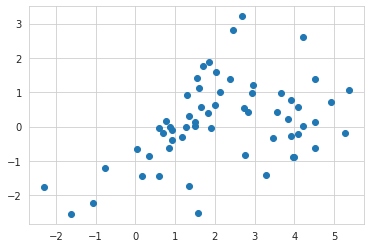

In [ ]:
##  >>>>>>>>>>>> NOW REGRESSION BASED ON SELECTED FEATURES: WU data  >>>>>>>>>>>>>>>>>>>>>
variables = ['logMass', 'logE', 'logt', 'logLbol']
features = ['logMass', 'logE', 'logt']
target = [ 'logLbol']

wu_train = (wu_df[variables]).copy().sample(frac = .75, random_state = 614)
wu_test = (wu_df[variables]).copy().drop(wu_train.index)

# correlation check 
print(wu_train[variables].corr()['logLbol'].sort_values())

# regression 
reg = LinearRegression(copy_X = True)
reg.fit(wu_train[features], wu_train[target])
print('The regression equation is \n logLbol = ', round(reg.intercept_[0],3),' + (', round(reg.coef_[0][0],3) ,')logMass + (', round(reg.coef_[0][1],3) ,')logE + (', round(reg.coef_[0][2],3) ,')logt')

pred = reg.predict(wu_test[features])
res = pred - wu_test[target]

MSE_test = np.array(res.T.dot(res))[0][0]/(len(res))
print('MSE=', MSE_test)


plt.scatter(pred, res)
plt.show()

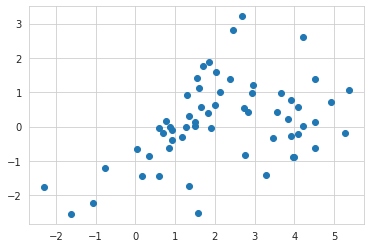

In [ ]:
clouds = outflowsCloud
print('\n Mass', len(clouds[np.isnan(clouds['Mass'])]), '\n Energy', len(clouds[np.isnan(clouds['Energy'])]), '\n ................')
#len(wu_df[(wu_df['logMass']) == -inf])


 Mass 0 
 Energy 0 
 ................


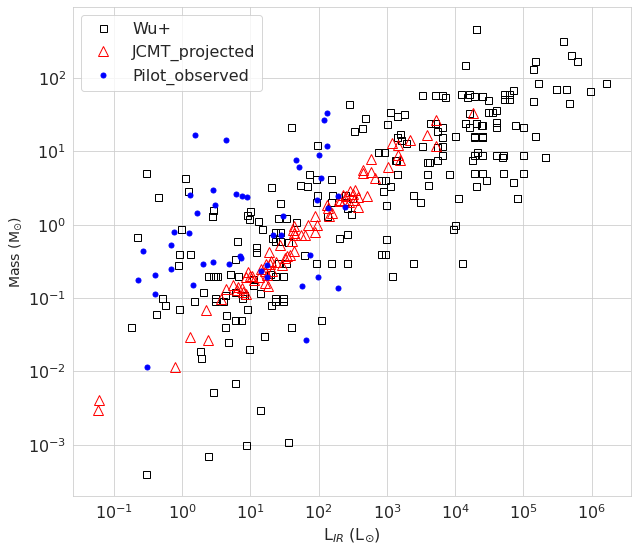

In [ ]:
###   Projectiong L_IR for outflowsCloud data (84 JCMT entries) based on regression line from Wu + data >>>>>>>>>>>>>>>>>>>>>
#wu_refined = (wu[~np.isnan(wu['Lbol'])]) # removes all entries with NaN Lbol values
clouds = outflowsCloud
clouds_refined = clouds[clouds['Dynamical Time'] > 0]
clouds_refined = clouds[clouds['Mass'] > 0]
clouds_refined = clouds[clouds['Energy'] > 0]

clouds_df = (clouds_refined.to_pandas())[['Mass', 'Energy', 'Dynamical Time']]

#add log values
clouds_df['logMass'] = np.log10(clouds_df['Mass'])
clouds_df['logE'] = np.log10(clouds_df['Energy'])
clouds_df['logt'] = np.log10(clouds_df['Dynamical Time'])
clouds_df['logLbol_proj.'] =  2.238  + ( 1.015 ) * clouds_df['logMass'] + ( 0.248 ) * clouds_df['logE'] + ( -0.293 ) * clouds_df['logt']


# >>>>>>>>>>>>>>>>>>>>>>>>>>>  COMPARISON PLOT >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), 10**(wu_df['logMass']), 'ks',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu+')
plt.loglog(10**(clouds_df['logLbol_proj.']), 10**(clouds_df['logMass']), 'r^', markersize=10, markerfacecolor='none', markeredgecolor='red', label='JCMT_projected')
plt.loglog(10**(pilotL['logL_proto']), (pilotL['Mass']), 'b.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 16)
plt.ylabel('Mass (M$_{\odot}$)', fontsize = 14)
plt.legend(fontsize=16)
plt.show()
#plt.savefig('Mass_LIR_projected.pdf', format='pdf', dpi=300, overwrite=True)

In [ ]:
pilotL = Table.read(filepath + 'cygxPilot_proto.fits')

NaNs in the data 
 Lbol 0 
 Mass 0 
 Energy 0 
 ................
-infty in log mass 0
NaNs in the data 
 Lbol 0 
 Mass 0 
 Energy 0 
 ................
logt         -0.520037
logMass       0.149514
logE          0.352668
logL_proto    1.000000
Name: logL_proto, dtype: float64
The regression equation is 
 logLbol =  1.995  + ( -0.29 )logMass + ( 0.495 )logE + ( -0.956 )logt
R2-score= 0.3666643254809221
MSE= 0.347991783600397


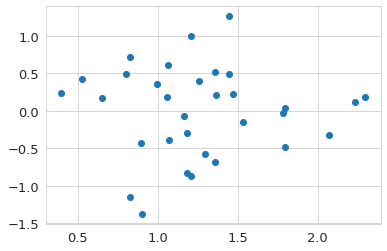

In [ ]:
##  >>>>>>>>>>>> NOW REGRESSION BASED ON SELECTED FEATURES >>>>>>>>>>>>>>>> BASED ON PILOT SURVEY ------>>>>>> HERE USE GRADIENT BOOSTING OR ENSEMBLE REGRESSION 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

pilotL = Table.read(filepath + 'cygxPilot_proto.fits')

print('NaNs in the data \n Lbol',len(pilotL[np.isnan(pilotL['logL_proto'])]), '\n Mass', len(pilotL[np.isnan(pilotL['Mass'])]), '\n Energy', len(pilotL[np.isnan(pilotL['Energy'])]), '\n ................')
# clean data
#wu_refined = (wu[~np.isnan(wu['Lbol'])]) # removes all entries with NaN Lbol values
pilotL_refined = pilotL[pilotL['Dynamical Time'] > 0]
pilotL_refined = pilotL_refined[pilotL_refined['Mass'] > 0]
pilotL_refined = pilotL_refined[pilotL_refined['Energy'] > 0] 
pilotL_refined = pilotL_refined[pilotL_refined['logL_proto'] > 0]

pilotL_df = (pilotL_refined.to_pandas())[['Mass', 'Energy', 'Dynamical Time', 'logL_proto']]

#add log values
pilotL_df['logMass'] = np.log10(pilotL_df['Mass'])
pilotL_df['logE'] = np.log10(pilotL_df['Energy'])
pilotL_df['logt'] = np.log10(pilotL_df['Dynamical Time'])
#$pilotL_df['logL_proto'] = np.log10(pilotL_df['logL_proto'])
#pilotL_df['logLbol_proj.'] =  2.238  + ( 1.015 ) * clouds_df['logMass'] + ( 0.248 ) * clouds_df['logE'] + ( -0.293 ) * clouds_df['logt']


print('-infty in log mass',len(pilotL_df[(pilotL_df['logMass']) == -inf]))


variables = ['logMass', 'logE', 'logt', 'logL_proto']
features = ['logMass', 'logE', 'logt']
target = [ 'logL_proto']

pilotL_train = (pilotL_df[variables]).copy().sample(frac = .85, random_state = 614)
pilotL_test = (pilotL_df[variables]).copy().drop(pilotL_train.index)

print('NaNs in the data \n Lbol',len(pilotL_train[np.isnan(pilotL_train['logL_proto'])]), '\n Mass', len(pilotL_train[np.isnan(pilotL_train['logMass'])]), '\n Energy', len(pilotL_train[np.isnan(pilotL_train['logE'])]), '\n ................')
# correlation check 
print(pilotL_train[variables].corr()['logL_proto'].sort_values())

# regression 
reg = LinearRegression(copy_X = True)
reg.fit(pilotL_train[features], pilotL_train[target])
print('The regression equation is \n logLbol = ', round(reg.intercept_[0],3),' + (', round(reg.coef_[0][0],3) ,')logMass + (', round(reg.coef_[0][1],3) ,')logE + (', round(reg.coef_[0][2],3) ,')logt')

pred = reg.predict(pilotL_train[features])
res = pred - pilotL_train[target]
print('R2-score=', r2_score(pilotL_train[target], pred))

MSE_train = np.array(res.T.dot(res))[0][0]/(len(res))
print('MSE=', MSE_train)

plt.scatter(pred, res)
plt.show()

0.3666643254809221

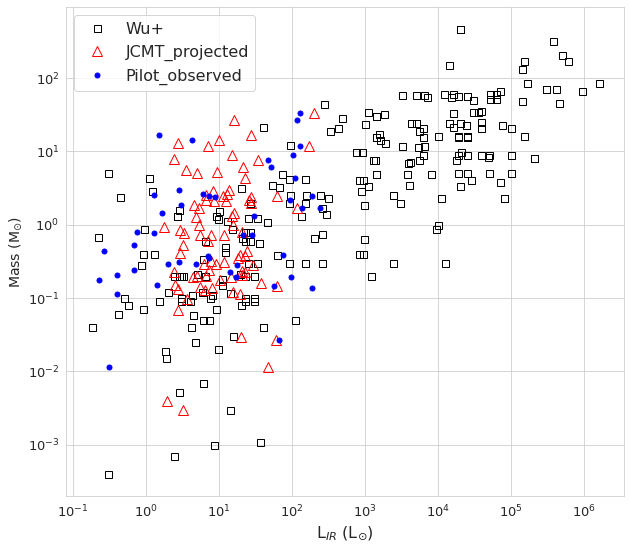

---------------------


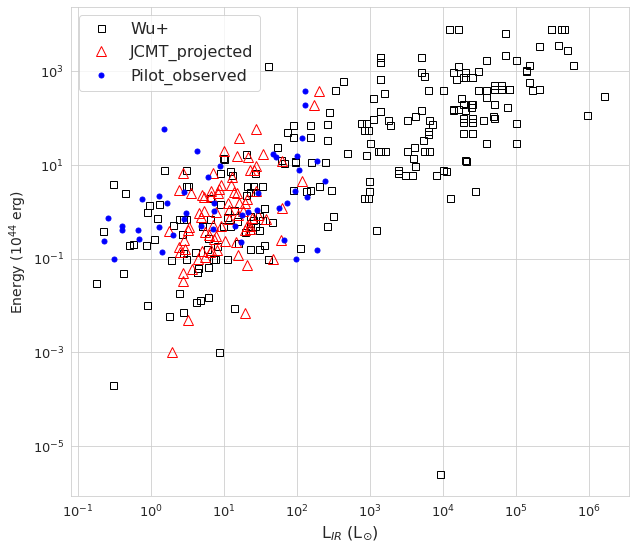

---------------------


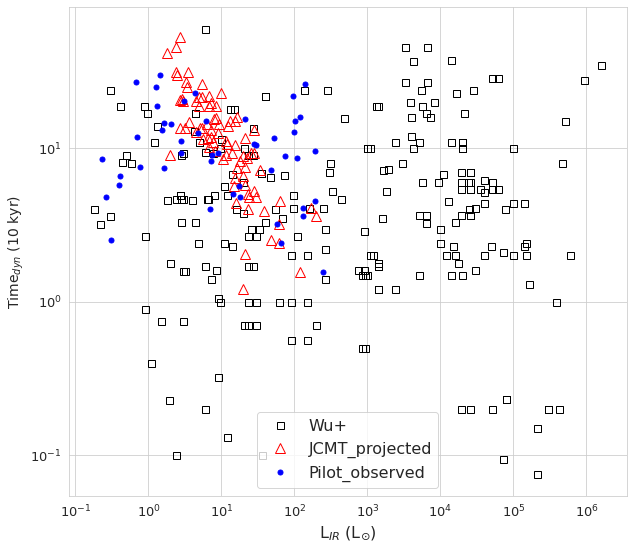

In [ ]:
###   Projectiong L_IR for outflowsCloud data (84 JCMT entries) based on regression line from Wu + data >>>>>>>>>>>>>>>>>>>>>
#wu_refined = (wu[~np.isnan(wu['Lbol'])]) # removes all entries with NaN Lbol values
clouds = outflowsCloud
clouds_refined = clouds[clouds['Dynamical Time'] > 0]
clouds_refined = clouds[clouds['Mass'] > 0]
clouds_refined = clouds[clouds['Energy'] > 0]

clouds_df = (clouds_refined.to_pandas())[['Mass', 'Energy', 'Dynamical Time']]

#add log values
clouds_df['logMass'] = np.log10(clouds_df['Mass'])
clouds_df['logE'] = np.log10(clouds_df['Energy'])
clouds_df['logt'] = np.log10(clouds_df['Dynamical Time'])
clouds_df['logLbol_proj.'] =  reg.intercept_[0] + reg.coef_[0][0] * clouds_df['logMass'] + reg.coef_[0][1] * clouds_df['logE'] + reg.coef_[0][2] * clouds_df['logt']
# logLbol =  1.995  + ( -0.29 )logMass + ( 0.495 )logE + ( -0.956 )logt  <<<< this is the printed equation above 

# >>>>>>>>>>>>>>>>>>>>>>>>>>>  COMPARISON PLOT >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), 10**(wu_df['logMass']), 'ks',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu+')
plt.loglog(10**(clouds_df['logLbol_proj.']), 10**(clouds_df['logMass']), 'r^', markersize=10, markerfacecolor='none', markeredgecolor='red', label='JCMT_projected')
plt.loglog(10**(pilotL['logL_proto']), (pilotL['Mass']), 'b.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 16)
plt.ylabel('Mass (M$_{\odot}$)', fontsize = 14)
plt.legend(fontsize=16)
plt.show()
#plt.savefig('Mass+LIR_projected(based on Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
print('---------------------')
plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), 10**(wu_df['logE']), 'ks',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu+')
plt.loglog(10**(clouds_df['logLbol_proj.']), 10**(clouds_df['logE']), 'r^', markersize=10, markerfacecolor='none', markeredgecolor='red', label='JCMT_projected')
plt.loglog(10**(pilotL['logL_proto']), (pilotL['Energy']), 'b.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 16)
plt.ylabel('Energy ($10^{44}$ erg)', fontsize = 14)
plt.legend(fontsize=16)
plt.show()
#plt.savefig('Energy+LIR_projected(based on Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
plt.close()
print('---------------------')
plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), 10**(wu_df['logt']), 'ks',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu+')
plt.loglog(10**(clouds_df['logLbol_proj.']), 10**(clouds_df['logt']), 'r^', markersize=10, markerfacecolor='none', markeredgecolor='red', label='JCMT_projected')
plt.loglog(10**(pilotL['logL_proto']), (pilotL['Dynamical Time']), 'b.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 16)
plt.ylabel('Time$_{dyn}$ (10 kyr)', fontsize = 14)
plt.legend(fontsize=16)
plt.show()
#plt.savefig('DynamicalTime+LIR_projected(based on Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
plt.close()

In [ ]:
########################################################################################################################################################################
###########################################           Regression of L_bol based on Pilot survey observations (48 observations)      ####################################
###########################################           Regularization: LASSO+RIDGE = ElasticNet                                      ####################################
########################################################################################################################################################################

-infty in log mass 0
r= 0.01 and alpha= 0.001 

lengths of test set and train set in this split= 7 25 

test index in this 1 th Kfold split: [ 0  2  7  9 10 11 27] 
 and train_index : [ 1  3  4  5  6  8 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 28 29 30
 31] 

ElasticNet MSE for 1 -th fold is 5.348024989331269 for r= 0.01 and alpha= 0.001 

lengths of test set and train set in this split= 7 25 

test index in this 1 th Kfold split: [ 5  6 13 21 22 25 30] 
 and train_index : [ 0  1  2  3  4  7  8  9 10 11 12 14 15 16 17 18 19 20 23 24 26 27 28 29
 31] 

ElasticNet MSE for 2 -th fold is 7.259435867183463 for r= 0.01 and alpha= 0.001 

lengths of test set and train set in this split= 6 26 

test index in this 1 th Kfold split: [ 4 15 23 28 29 31] 
 and train_index : [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 24 25 26
 27 30] 

ElasticNet MSE for 3 -th fold is 3.279150050007764 for r= 0.01 and alpha= 0.001 

lengths of test set and train set in this split= 6 26 

te

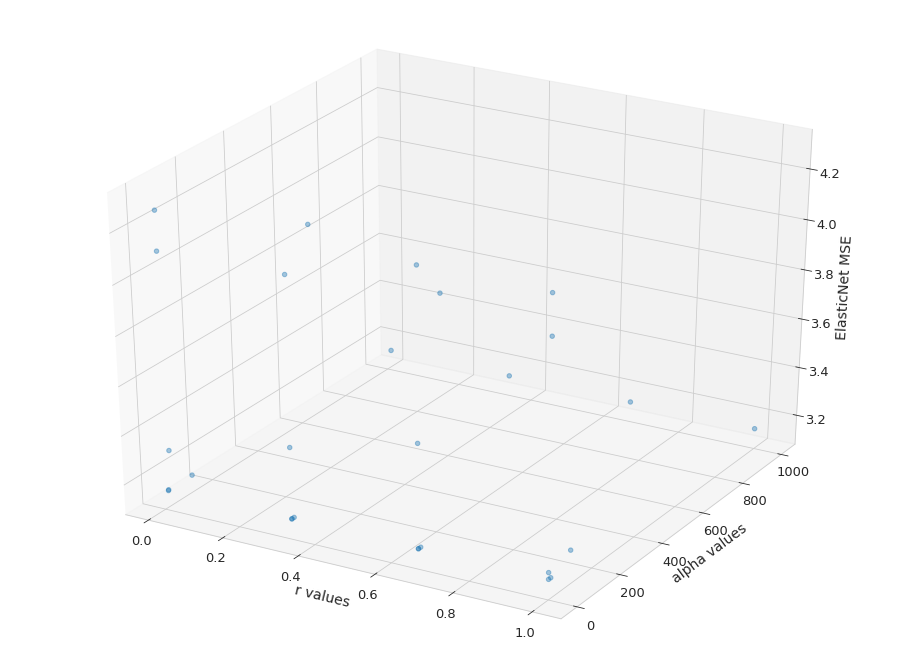

In [ ]:
## code here
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor as gbreg 
## this calculates the test mse
def get_mse(model, X_train, X_test, y_train, y_test):
    # fit the model and get coeffs
    model.fit(X_train,y_train)
    print('models beta and intercept:', model.coef_, model.intercept_)

    # get the prediction
    pred = model.predict(X_test)

    # Returns the mse
    return np.sum(np.power(np.array(pred)-y_test,2))/len(pred)

#proto = Table.read('cygxPilot_proto.fits')
#wu = Table.read('WuTable.fit')
#outflowsCloud = Table.read('outflowsClouds_output.fit')



rs = np.linspace(0.01, 1, 4)
alphas = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2,1e3]
rv, alphav = np.meshgrid(rs, alphas)
r_alpha_grid = np.concatenate([rv.reshape(-1,1), alphav.reshape(-1,1)], axis=1)

MSE_regr = np.empty((len(rs),len(alphas),5))

# coefs cintains coeffs for each of 10 betas for every value of alpha 
regr_coefs = np.empty((len(rs),len(alphas),5)) 


pilotL_refined = pilotL[pilotL['Dynamical Time'] > 0] # 'proto_arcmin.csv'
pilotL_refined = pilotL_refined[pilotL_refined['Mass'] > 0]
pilotL_refined = pilotL_refined[pilotL_refined['Energy'] > 0] 
pilotL_refined = pilotL_refined[pilotL_refined['logL_proto'] > 0]

pilotL_df = (pilotL_refined.to_pandas())[['Mass', 'Energy', 'Dynamical Time', 'logL_proto']]

#add log values
pilotL_df['logMass'] = np.log10(pilotL_df['Mass'])
pilotL_df['logE'] = np.log10(pilotL_df['Energy'])
pilotL_df['logt'] = np.log10(pilotL_df['Dynamical Time'])
#$pilotL_df['logL_proto'] = np.log10(pilotL_df['logL_proto'])
#pilotL_df['logLbol_proj.'] =  2.238  + ( 1.015 ) * clouds_df['logMass'] + ( 0.248 ) * clouds_df['logE'] + ( -0.293 ) * clouds_df['logt']


print('-infty in log mass',len(pilotL_df[(pilotL_df['logMass']) == -inf]))

# model and target defined 
variables = ['logMass', 'logE', 'logt', 'logL_proto']
features = ['logMass', 'logE', 'logt']
target = [ 'logL_proto']

# train test spllit
pilotL_train, pilotL_test =  train_test_split(pilotL_df[variables].copy(), test_size=0.15, random_state= 614)

## make a kfold object
kfold = KFold(n_splits=5, shuffle=True, random_state=789)

for i in range(len(rs)):
  for j in range(len(alphas)):
    print('r=', rs[i], 'and alpha=',alphas[j],'\n')

    # create cross validation folds
    k = 0
    for train_index, test_index in kfold.split(pilotL_train):
      print('lengths of test set and train set in this split=', len(test_index), len(train_index), '\n')
      print('test index in this', i+1, 'th Kfold split:', test_index, '\n and train_index :', train_index, '\n')
      pilotL_train_train = pilotL_train.iloc[train_index]
      pilotL_train_test = pilotL_train.iloc[test_index]
      #ads_holdout = ads_train.iloc[test_index]

      # build model 
      regr = ElasticNet(alpha=alphas[j],l1_ratio=rs[i],fit_intercept=True,copy_X=True, max_iter=5000000)
  
      # fit with pipeline 
      #pipe_regr = Pipeline([('transform',pipe_polyscaler),('elasticNet', regr)])

      regr.fit(pilotL_train_train[features], pilotL_train_train[target]) # reshaping because the transformation pipeline will make it a 10 dimensional axes data 
      #regr_coefs[i,j,:] = np.round(regr.coef_,3)


      ## add the predictions to the grid array
      clone_regr = clone(regr)
      clone_regr.fit(pilotL_train_train[features], pilotL_train_train[target])

      MSE_regr[i,j,k] = np.sum((clone_regr.predict(pilotL_train_test[features]) - (pilotL_train_test[target]).values )**2) / len(pilotL_train_test[target].values)
      print('ElasticNet MSE for', k+1, '-th fold is', MSE_regr[i,j,k], 'for r=', rs[i], 'and alpha=',alphas[j],'\n')
      k += 1

    #print('ElasticNet MSE =', MSE_regr[i,j],'for r=', rs[i], 'and alpha=',alphas[j])




print(MSE_regr.mean(axis=2))

print(MSE_regr.shape),
print(rs)
print('\n', alphas)
MSE_regr.mean(axis=2)

r_alpha_grid = np.concatenate([r_alpha_grid, MSE_regr.mean(axis=2).reshape(-1,1)], axis=1)


from matplotlib import cm
fig = plt.figure(figsize=(16,12))
## We'll add a 3d subplot object
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_alpha_grid[:, 0], r_alpha_grid[:, 1], r_alpha_grid[:,2], cmap=cm.hot, alpha=0.4)

## Add labels
ax.set_xlabel("r values", fontsize=14)
ax.set_ylabel("alpha values", fontsize=14)
ax.set_zlabel("ElasticNet MSE", fontsize=14)

#plt.legend(fontsize=14)
plt.show()

In [ ]:
pilotL

ID,RAJ2000,DecJ2000,Distance,Vc,Mass,Momentum,Energy,Dynamical Time,RA_proto,Dec_proto,logL_proto,alpha_proto
,deg,deg,kpc,km / s,solMass,km solMass / s,1e+44 erg,10 kyr,deg,deg,solLum,
bytes13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
G79.886+2.552,306.12695,42.07195,0.65,6.6,0.3806047309875691,1.983723446299846,1.5099774793414629,8.988472395348822,306.1270416666666,42.06921944444445,1.871000051498413,0.1599999964237213
G79.962+2.556,306.19627708350004,42.137068055,0.65,5.5,0.011387653981149732,0.10183117215852745,0.09702632374351362,2.5092913412849533,306.17816666666664,42.22316388888888,-0.5099999904632568,0.949999988079071
G80.149+2.710,306.15387495,42.3759486,0.65,6.0,0.19121804486600497,0.6339892666602237,0.22881300901910812,5.672218136218539,306.1414166666666,42.388052777777766,1.2389999628067017,2.0
G80.158+2.727,306.144,42.394149999999996,0.65,6.0,0.2291354729486776,0.8994266383792182,0.5090645443484406,5.06302169829402,306.14241666666663,42.39211111111111,1.156000018119812,0.8399999737739563
G80.815+0.661,308.9185,41.709,1.5,-3.0,0.14894788829212735,0.38795019230909394,0.13807706815198442,30.027240242073944,308.88812499999995,41.67510833333333,0.15600000321865082,1.4299999475479126
G80.832+0.570,309.03432291499996,41.6708321,1.3,11.5,2.4501178407978226,5.719880527222093,1.5467154276523727,9.07554901794966,309.04437499999995,41.66863055555555,0.8700000047683716,0.7699999809265137
G80.862+0.385,309.25425,41.5805,1.5,-1.4,6.073208838363632,28.013223100538582,14.86759547217229,11.70781415611552,309.26083333333327,41.578047222222224,1.718000054359436,1.340000033378601
G80.916+0.331,309.3555,41.593999999999994,1.5,-1.3,0.7206042623756527,2.4214013812180584,1.0060424006144808,15.610418874820688,309.3537916666666,41.59322222222221,1.3279999494552612,0.33000001311302185


Minimum EsaticNet MSE occurs at,  [[0.01      0.01      3.1585977]] 

at r= 0.01 alpha= 0.01
models beta and intercept: [-0.20011794  0.42085911 -0.78057736] [1.9356662]


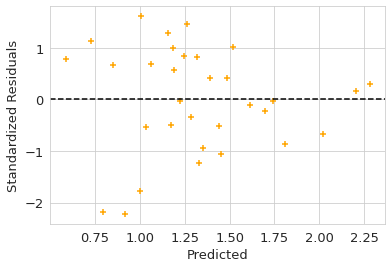

In [ ]:
print('Minimum EsaticNet MSE occurs at, ',r_alpha_grid[r_alpha_grid[:,2] == r_alpha_grid[:,2].min()], '\n')
r_alphs_grid_min = r_alpha_grid[r_alpha_grid[:,2] == r_alpha_grid[:,2].min()]
print('at r=', r_alphs_grid_min[0][0],'alpha=',r_alphs_grid_min[0][1])


regr = ElasticNet(alpha=r_alphs_grid_min[0][1],l1_ratio=r_alphs_grid_min[0][0],fit_intercept=True,copy_X=True, max_iter=5000000)
  
regr.fit(pilotL_train[features], pilotL_train[target]) # reshaping because the transformation pipeline will make it a 10 dimensional axes data 
#regr_coefs[i,j,:] = np.round(regr.coef_,3)

## add the predictions to the grid array
#clone_regr = clone(regr)
#clone_regr.fit(pilotL_train_train[features], pilotL_train_train[target])

#MSE_regr[i,j,k] = np.sum((clone_regr.predict(pilotL_train_test[features]) - (pilotL_train_test[target]).values )**2) / len(pilotL_train_test[target].values)
#print('ElasticNet MSE for', k+1, '-th fold is', MSE_regr[i,j,k], 'for r=', rs[i], 'and alpha=',alphas[j],'\n')

X_train = np.array(pilotL_train[features])
X_test = np.array(pilotL_test[features])

y_train = np.array(pilotL_train[target])
y_test = np.array(pilotL_test[target])
#y_valid =  np.array(pilotL_test[target])

get_mse(regr, X_train, X_test, y_train, y_test)
pred = regr.predict(X_train)

import scipy.stats as stats
res = pred - y_train.flatten()
plt.scatter(pred, stats.zscore(res),marker='+', color='orange')
#plt.plot(pred, stats.zscore(res),marker='.')
plt.axhline(y=0, linestyle='--', color='k')
plt.xlabel('Predicted')
plt.ylabel('Standardized Residuals')
plt.show()

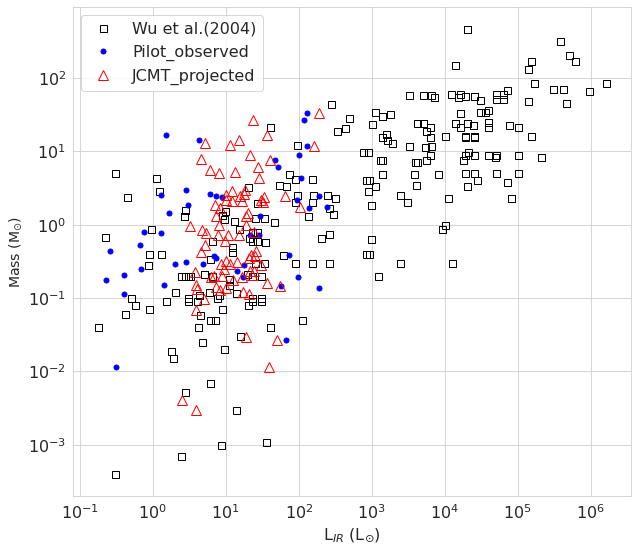

---------------------


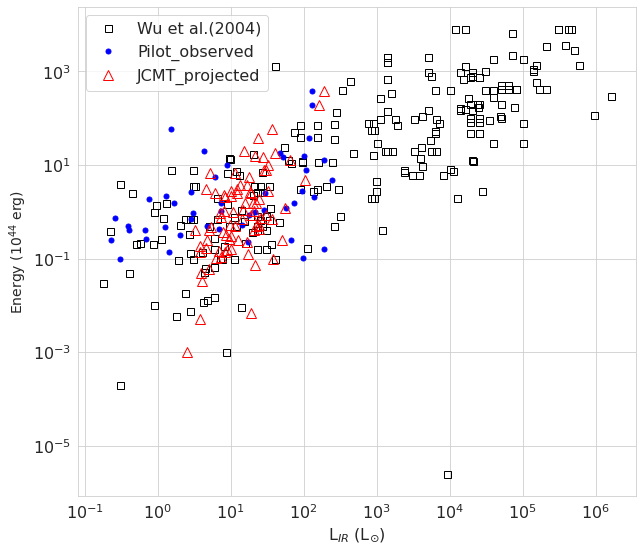

---------------------


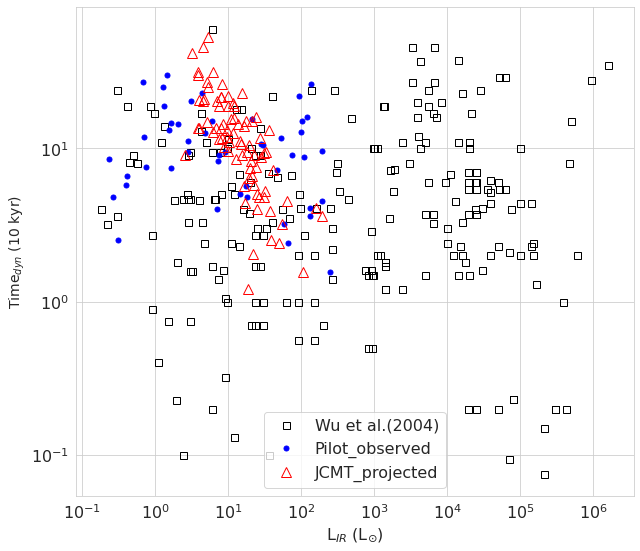

In [ ]:
###   Projectiong L_IR for outflowsCloud data (84 JCMT entries) based on regression line from Pilot data >>>>>>>>>>>>>>>>>>>>>
#wu_refined = (wu[~np.isnan(wu['Lbol'])]) # removes all entries with NaN Lbol values
clouds = outflowsCloud
clouds_refined = clouds[clouds['Dynamical Time'] > 0]
clouds_refined = clouds[clouds['Mass'] > 0]
clouds_refined = clouds[clouds['Energy'] > 0]

clouds_df = (clouds_refined.to_pandas())[['Mass', 'Energy', 'Dynamical Time']]

#add log values
clouds_df['logMass'] = np.log10(clouds_df['Mass'])
clouds_df['logE'] = np.log10(clouds_df['Energy'])
clouds_df['logt'] = np.log10(clouds_df['Dynamical Time'])
clouds_df['logLbol_proj.'] =  regr.intercept_[0] + regr.coef_[0] * clouds_df['logMass'] + regr.coef_[1] * clouds_df['logE'] + regr.coef_[2] * clouds_df['logt']
#clouds_df['logLbol_proj.'] =  regr.intercept_[0] + regr.coef_[0] * clouds_df['logMass'] + regr.coef_[1] * clouds_df['logt']
# logLbol =  1.995  + ( -0.29 )logMass + ( 0.495 )logE + ( -0.956 )logt  <<<< this is the printed equation above 

# >>>>>>>>>>>>>>>>>>>>>>>>>>>  COMPARISON PLOT >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), 10**(wu_df['logMass']), 'ks',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu et al.(2004)')
plt.loglog(10**(pilotL['logL_proto']), (pilotL['Mass']), 'b.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.loglog(10**(clouds_df['logLbol_proj.']), 10**(clouds_df['logMass']), 'r^', markersize=10, markerfacecolor='none', markeredgecolor='red', label='JCMT_projected')

plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 16)
plt.ylabel('Mass (M$_{\odot}$)', fontsize = 14)
plt.legend(fontsize=16)
plt.show()
#plt.savefig('Mass+LIR_projected(regression with Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
plt.close()


print('---------------------')
plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), 10**(wu_df['logE']), 'ks',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu et al.(2004)')
plt.loglog(10**(pilotL['logL_proto']), (pilotL['Energy']), 'b.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.loglog(10**(clouds_df['logLbol_proj.']), 10**(clouds_df['logE']), 'r^', markersize=10, markerfacecolor='none', markeredgecolor='red', label='JCMT_projected')

plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 16)
plt.ylabel('Energy ($10^{44}$ erg)', fontsize = 14)
plt.legend(fontsize=16)
plt.show()
#plt.savefig('Energy+LIR_projected(regression with Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
plt.close()


print('---------------------')
plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), 10**(wu_df['logt']), 'ks',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu et al.(2004)')
plt.loglog(10**(pilotL['logL_proto']), (pilotL['Dynamical Time']), 'b.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.loglog(10**(clouds_df['logLbol_proj.']), 10**(clouds_df['logt']), 'r^', markersize=10, markerfacecolor='none', markeredgecolor='red', label='JCMT_projected')

plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 16)
plt.ylabel('Time$_{dyn}$ (10 kyr)', fontsize = 14)
plt.legend(fontsize=16)
plt.show()
#plt.savefig('DynamicalTime+LIR_projected(regression with Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
plt.close()

In [ ]:
###########################################################################################################################
###############         Implement a regression pipeline using  GradientBoostingRegressor     >>>>>>>>>>>>>>>>>>>>>>>>>>>
###############                                                                                 >>>>>>>>>>>>>>>>>>>>>>>>>>>
###########################################################################################################################
import time
start_time = time.time()

from sklearn.ensemble import GradientBoostingRegressor as gbreg 

# select data
features = ['logMass', 'logE',	'logt']
target = ['logL_proto']
variables =  ['logMass',	'logE',	'logt', 'logL_proto']
# train test spllit
#outflow_df_train, outflow_df_test =  train_test_split(outflow_df.copy(), test_size=0.15, random_state= 42)
pilotL_df_train, pilotL_df_test =  train_test_split(pilotL_df.copy(), test_size=.15, random_state= 42)

X_train = pilotL_df_train[features]
X_test = pilotL_df_test[features]
y_train = pilotL_df_train[target]
y_test = pilotL_df_test[target]

y_train = np.reshape(y_train.copy(), (-1,1))
y_test = np.reshape(y_test.copy(), (-1,1))


# Select model and train it
model = gbreg(n_estimators=100, max_depth=3, learning_rate=0.1)
model = model.fit(X_train, y_train)

# Make prediction
predictions = model.predict(X_test)

# Evaluate predictions
#print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
#print('Mean Squared Error:', mean_squared_error(y_test, predictions))
#print('R2 Score:', r2_score(y_test, predictions))

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.05451321601867676 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


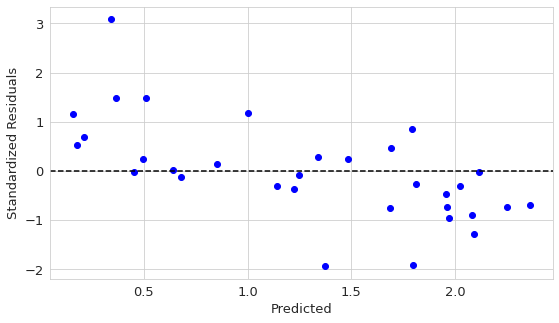

In [ ]:
import scipy.stats as stats        ### <<<<<<<<<<<<<< some sort of pattern is still present BEACUSE OF MULTICOLLINEARITY?? 
pred = model.predict(X_train)
res = pred -  np.array(y_train).flatten()
plt.figure(figsize=(9,5))
plt.scatter(pred, stats.zscore(res),marker='o', color='blue')
#plt.plot(pred, stats.zscore(res),marker='.')
plt.axhline(y=0, linestyle='--', color='k')
plt.xlabel('Predicted')
plt.ylabel('Standardized Residuals')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


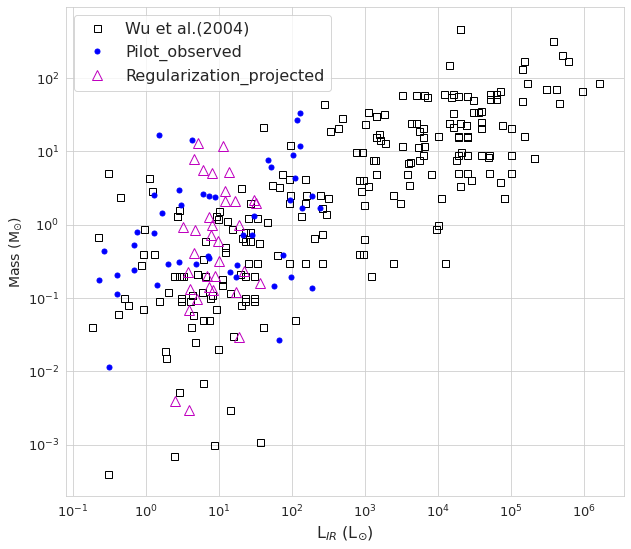

---------------------


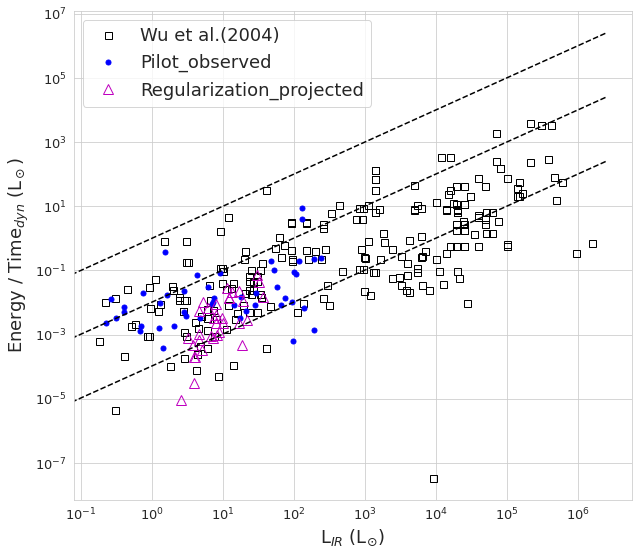

In [ ]:
###   ElasticNet Projection of L_IR for outflowsCloud data Newfields data along with Pilot survey observations and Wu observations >>>>>>>>>>>>>>>>>>>>>

clouds = outflowsCloud
clouds_refined = clouds[clouds['Dynamical Time'] > 0]
clouds_refined = clouds[clouds['Mass'] > 0]
clouds_refined = clouds[clouds['Energy'] > 0]

clouds_df = (clouds_refined.to_pandas())[['ID',	'RAJ2000',	'DecJ2000', 'Mass', 'Momentum','Energy','Dynamical Time']]

#add log values
clouds_df['logMass'] = np.log10(clouds_df['Mass'])
clouds_df['logE'] = np.log10(clouds_df['Energy'])
clouds_df['logt'] = np.log10(clouds_df['Dynamical Time'])

features = ['logMass', 'logE', 'logt']
clouds_df['logLbol_proj.'] =  regr.predict(clouds_df[features]) # <<<<<<<<< regr is an ElasticNet Model
#clouds_df['logLbol_proj.'] =  regr.intercept_[0] + regr.coef_[0] * clouds_df['logMass'] + regr.coef_[1] * clouds_df['logE'] + regr.coef_[2] * clouds_df['logt']


# >>>>>>>>>>>>>>>>>>>>>>>>>>>  COMPARISON PLOT >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
clouds_df_newfields = clouds_df.copy().loc[46:]

plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), 10**(wu_df['logMass']), 'ks',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu et al.(2004)')
plt.loglog(10**(pilotL['logL_proto']), (pilotL['Mass']), 'b.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.loglog(10**(clouds_df_newfields['logLbol_proj.']), 10**(clouds_df_newfields['logMass']), '^', markersize=10, markerfacecolor='none', markeredgecolor='m', label='Regularization_projected')
plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 16)
plt.ylabel('Mass (M$_{\odot}$)', fontsize = 14)
plt.legend(fontsize=16)
plt.show()
#plt.savefig('Mass+LIR_projected(regression with Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
plt.close()

print('---------------------')
m = wu_df['logLbol'].max()
x = np.linspace(0, 10**max(wu_df['logLbol']+0.2))
y1 = x
y2 = 1e-2*x
y3 = 1e-4 * x
#clouds_df_newfields = clouds_df.copy().loc[46:]

plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), (10**(wu_df['logE']) / 10**(wu_df['logt'])) * ((1e44*u.erg / (10*u.kyr)).to(u.solLum)), 's',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu et al.(2004)')
plt.loglog(10**(pilotL['logL_proto']), ((pilotL['Energy'] / pilotL['Dynamical Time'] ).value * ((1e44*u.erg / (10*u.kyr)).to(u.solLum))), '.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.loglog(10**(clouds_df_newfields['logLbol_proj.']), (10**(clouds_df_newfields['logE']) / 10**(clouds_df_newfields['logt'])) * ((1e44*u.erg / (10*u.kyr)).to(u.solLum)), '^', markersize=10, markerfacecolor='none', markeredgecolor='m', label='Regularization_projected')
#plt.loglog(10**(clouds_df_newfields['logLbol_proj_gradBoost']), (10**(clouds_df_newfields['logE']) / 10**(clouds_df_newfields['logt'])) * ((1e44*u.erg / (10*u.kyr)).to(u.solLum)), 'r+', markersize=10, markerfacecolor='none', markeredgecolor='m', label='GradBoost_projected')
# Plot 3 lines here 
plt.loglog(x,y1,'k--')
plt.loglog(x,y2,'k--')
plt.loglog(x,y3,'k--')
plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 18)
plt.ylabel('Energy / Time$_{dyn}$ (L$_\odot$)', fontsize = 18)
plt.legend(fontsize=18)
#plt.savefig('Energy_dissipated+LIR_projected(GradBoost with Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
#plt.savefig('Energy_dissipated+LIR_projected(ElasticNet with Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
plt.show()
plt.close()

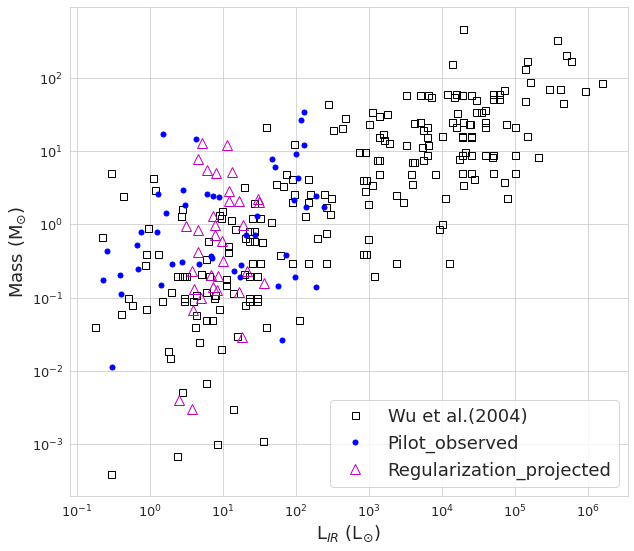

---------------------


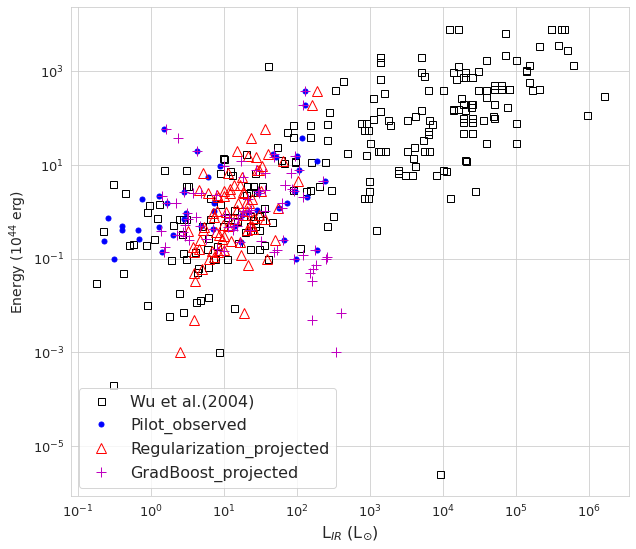

---------------------


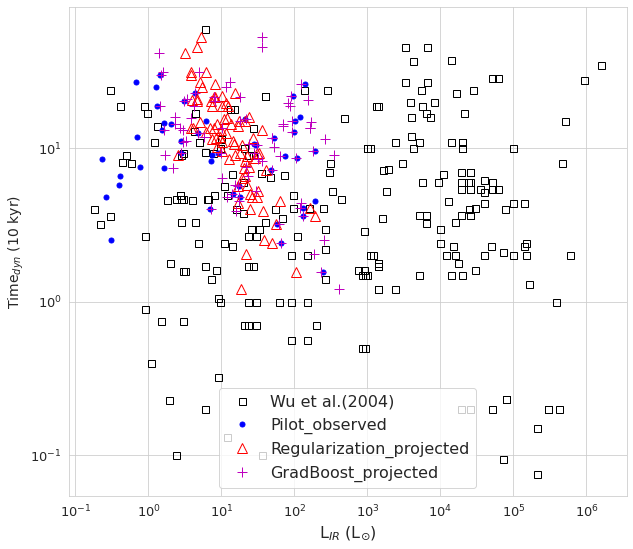

In [ ]:
#############################  PLOTS USING GRADIENT BOOSTING ALGORITHM #######################################################

###   Projectiong L_IR for outflowsCloud data (84 JCMT entries) based Pilot data >>>>>>>>>>>>>>>>>>>>>
#wu_refined = (wu[~np.isnan(wu['Lbol'])]) # removes all entries with NaN Lbol values
clouds = outflowsCloud
clouds_refined = clouds[clouds['Dynamical Time'] > 0]
clouds_refined = clouds[clouds['Mass'] > 0]
clouds_refined = clouds[clouds['Energy'] > 0]

clouds_df = (clouds_refined.to_pandas())[['Mass', 'Energy', 'Dynamical Time']]

#add log values
clouds_df['logMass'] = np.log10(clouds_df['Mass'])
clouds_df['logE'] = np.log10(clouds_df['Energy'])
clouds_df['logt'] = np.log10(clouds_df['Dynamical Time'])
clouds_df['logLbol_proj.'] =  regr.intercept_[0] + regr.coef_[0] * clouds_df['logMass'] + regr.coef_[1] * clouds_df['logE'] + regr.coef_[2] * clouds_df['logt']
clouds_df['logLbol_proj_gradBoost']  = model.predict(clouds_df[features])
# logLbol =  1.995  + ( -0.29 )logMass + ( 0.495 )logE + ( -0.956 )logt  <<<< this is the printed equation above 

# >>>>>>>>>>>>>>>>>>>>>>>>>>>  COMPARISON PLOT >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), 10**(wu_df['logMass']), 'ks',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu et al.(2004)')
plt.loglog(10**(pilotL['logL_proto']), (pilotL['Mass']), 'b.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.loglog(10**(clouds_df_newfields['logLbol_proj.']), 10**(clouds_df_newfields['logMass']), '^', markersize=10, markerfacecolor='none', markeredgecolor='m', label='Regularization_projected')
#plt.loglog(10**(clouds_df_newfields['logLbol_proj_gradBoost']), 10**(clouds_df_newfields['logMass']), '+', markersize=10, markerfacecolor='none', markeredgecolor='m', label='GradBoost_projected')

plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 18)
plt.ylabel('Mass (M$_{\odot}$)', fontsize = 18)
plt.legend(fontsize=18)
#plt.savefig('Mass+LIR_projected(GradBoost with Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
plt.savefig('Mass+LIR_projected(ElasticNet with Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
plt.show()
plt.close()


print('---------------------')
plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), 10**(wu_df['logE']), 'ks',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu et al.(2004)')
plt.loglog(10**(pilotL['logL_proto']), (pilotL['Energy']), 'b.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.loglog(10**(clouds_df['logLbol_proj.']), 10**(clouds_df['logE']), 'r^', markersize=10, markerfacecolor='none', markeredgecolor='red', label='Regularization_projected')
plt.loglog(10**(clouds_df['logLbol_proj_gradBoost']), 10**(clouds_df['logE']), '+', markersize=10, markerfacecolor='none', markeredgecolor='m', label='GradBoost_projected')

plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 16)
plt.ylabel('Energy ($10^{44}$ erg)', fontsize = 14)
plt.legend(fontsize=16)

#plt.savefig('Energy+LIR_projected(GradBoost with Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
plt.show()
plt.close()


print('---------------------')
plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), 10**(wu_df['logt']), 'ks',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu et al.(2004)')
plt.loglog(10**(pilotL['logL_proto']), (pilotL['Dynamical Time']), 'b.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.loglog(10**(clouds_df['logLbol_proj.']), 10**(clouds_df['logt']), 'r^', markersize=10, markerfacecolor='none', markeredgecolor='red', label='Regularization_projected')
plt.loglog(10**(clouds_df['logLbol_proj_gradBoost']), 10**(clouds_df['logt']), 'r+', markersize=10, markerfacecolor='none', markeredgecolor='m', label='GradBoost_projected')

plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 16)
plt.ylabel('Time$_{dyn}$ (10 kyr)', fontsize = 14)
plt.legend(fontsize=16)

#plt.savefig('DynamicalTime+LIR_projected(GradBoost with Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
plt.show()
plt.close()



In [ ]:
(clouds_df_newfields.round({'RAJ2000':3, 'DecJ2000':3}))

,ID,RAJ2000,DecJ2000,Mass,Momentum,Energy,Dynamical Time,logMass,logE,logt,logLbol_proj.
46,b'0',308.099,43.683,0.716,1.435,0.365,13.550,-0.145087,-0.437707,1.131939,0.896921
47,b'0',308.058,43.697,0.940,1.848,0.399,41.951,-0.026872,-0.399027,1.622742,0.506434
48,b'0',308.128,43.959,0.592,1.733,0.529,13.266,-0.227678,-0.276544,1.122740,0.988457
49,b'0',307.899,45.098,2.076,8.294,3.798,13.984,0.317227,0.579555,1.145631,1.221840
50,b'0',305.131,42.434,0.228,0.597,0.181,31.464,-0.642065,-0.742321,1.497814,0.582583
51,b'0',305.121,41.414,0.416,0.795,0.164,20.325,-0.380907,-0.785156,1.308031,0.660433
52,b'0',305.614,41.602,0.029,0.041,0.007,1.209,-1.537602,-2.154902,0.082426,1.272118
53,b'0',304.506,41.926,5.060,10.065,2.328,21.608,0.704151,0.366983,1.334615,0.907431
54,b'0',304.495,41.938,0.127,0.414,0.140,11.726,-0.896196,-0.853872,1.069150,0.921097
55,b'0',304.602,42.033,1.287,2.955,0.773,18.907,0.109579,-0.111821,1.276623,0.870174


In [ ]:

newfields_input_list = (of_newfields.to_pandas()[['ID', 'RAJ2000', 'DecJ2000', 'Distance', 'Vc']].round({'RAJ2000':3, 'DecJ2000':3, })) # contains outflows with estimated mass=0 (check!)
newfields_filtered_list = (clouds_df_newfields.round({'RAJ2000':3, 'DecJ2000':3})) # all zero entries filtered out and contained predicted values 
newfields_complete = pd.merge(newfields_input_list,newfields_filtered_list, how='outer')
newfields_complete.sort_values('RAJ2000').round({'Vc':1, 'Mass':2,	'Momentum':2,	'Energy':2,	'Dynamical Time':1, 'logLbol_proj.':1,}).to_csv(filepath + 'newfields_complete.csv')

In [ ]:
newfields_complete = pd.read_csv(filepath + 'newfields_complete.csv')
newfields_complete[['RAJ2000',	'DecJ2000',	'Distance',	'Vc','Mass', 'Momentum',	'Energy',	'Dynamical Time',	'logLbol_proj.']].dropna().to_latex()

'\\begin{tabular}{lrrrrrrrrr}\n\\toprule\n{} &  RAJ2000 &  DecJ2000 &  Distance &    Vc &  Mass &  Momentum &  Energy &  Dynamical Time &  logLbol\\_proj. \\\\\n\\midrule\n0  &  304.495 &    41.938 &      1.50 &  -2.6 &   0.1 &       0.4 &     0.1 &            11.7 &            0.9 \\\\\n1  &  304.506 &    41.926 &      1.50 &  -3.9 &   5.1 &      10.1 &     2.3 &            21.6 &            0.9 \\\\\n2  &  304.602 &    42.033 &      1.50 &  -3.9 &   1.3 &       3.0 &     0.8 &            18.9 &            0.9 \\\\\n5  &  305.131 &    42.434 &      1.50 &  -1.8 &   0.2 &       0.6 &     0.2 &            31.5 &            0.6 \\\\\n9  &  305.614 &    41.602 &      0.65 &   5.9 &   0.0 &       0.0 &     0.0 &             1.2 &            1.3 \\\\\n10 &  305.842 &    41.295 &      1.50 &  -2.5 &   2.1 &       7.8 &     3.1 &            18.9 &            1.1 \\\\\n11 &  305.942 &    41.290 &      1.50 &  -1.4 &  12.9 &      27.8 &     6.9 &            53.2 &            0.7 \\\\\n12 &  306

In [ ]:
outflowsCloud#.loc[46:]

Seq,ID,RAJ2000,DecJ2000,Mass,Momentum,Energy,Dynamical Time,Cloud_Mass,Cloud_Energy,Energy_(of/cloud+of)
,,deg,deg,solMass,km solMass / s,1e+44 erg,10 kyr,solMass,1e+44 erg,
int64,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,G79.886+2.552,306.12695,42.07195,0.3806047309875691,1.983723446299846,1.5099774793414629,8.988472395348822,9.153315002797171,5.683432132383429,0.20991123275953538
4,G79.962+2.556,306.19627708350004,42.137068055,0.011387653981149732,0.10183117215852745,0.09702632374351362,2.5092913412849533,3.616023057955317,1.5151680094080864,0.060182771858428255
3,G80.149+2.710,306.15387495,42.3759486,0.19121804486600497,0.6339892666602237,0.22881300901910812,5.672218136218539,43.680865878239274,3.5382742363078656,0.06074003443985745
2,G80.158+2.727,306.144,42.394149999999996,0.2291354729486776,0.8994266383792182,0.5090645443484406,5.06302169829402,27.059939220547676,4.306699984976175,0.10570793925836612
27,G80.815+0.661,308.9185,41.709,0.14894788829212735,0.38795019230909394,0.13807706815198442,30.027240242073944,6.347718231379986,0.9908239194400907,0.12231105266946415
9,G80.832+0.570,309.03432291499996,41.6708321,2.4501178407978226,5.719880527222093,1.5467154276523727,9.07554901794966,675.3616638025269,59.38005752826839,0.02538646563098605
26,G80.862+0.385,309.25425,41.5805,6.073208838363632,28.013223100538582,14.86759547217229,11.70781415611552,467.77174841053784,70.12759141673374,0.17492279288243884
31,G80.916+0.331,309.3555,41.593999999999994,0.7206042623756527,2.4214013812180584,1.0060424006144808,15.610418874820688,62.18381137365941,9.208798714315147,0.09848830630797448


In [ ]:
newfields_complete = pd.read_csv(filepath + 'newfields_complete.csv')
newfields_complete

,Unnamed: 0,ID,RAJ2000,DecJ2000,Distance,Vc,Mass,Momentum,Energy,Dynamical Time,logMass,logE,logt,logLbol_proj.
0,9,b'0',304.495,41.938,1.50,-2.6,0.13,0.41,0.14,11.7,-0.896196,-0.853872,1.069150,0.9
1,8,b'0',304.506,41.926,1.50,-3.9,5.06,10.06,2.33,21.6,0.704151,0.366983,1.334615,0.9
2,10,b'0',304.602,42.033,1.50,-3.9,1.29,2.96,0.77,18.9,0.109579,-0.111821,1.276623,0.9
3,38,b'0',305.121,41.414,NaN,NaN,0.42,0.80,0.16,20.3,-0.380907,-0.785156,1.308031,0.7
4,6,b'0',305.130,41.412,1.30,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,b'0',305.131,42.434,1.50,-1.8,0.23,0.60,0.18,31.5,-0.642065,-0.742321,1.497814,0.6
6,12,b'0',305.133,41.396,0.65,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,39,b'0',305.158,42.040,NaN,NaN,0.83,1.39,0.26,21.0,-0.079355,-0.593460,1.321723,0.7
8,11,b'0',305.159,42.041,1.50,-3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,b'0',305.614,41.602,0.65,5.9,0.03,0.04,0.01,1.2,-1.537602,-2.154902,0.082426,1.3


In [ ]:
# Get names of indexes for which column Age has value 30
#indexNames = cygx_all[ cygx_all['Mass']  NaN ].index
# Delete these row indexes from dataFr
#cygx_combined = cygx_all.drop(indexNames , inplace=True)


#cygx_combined = cygx_all.dropna(subset=['Mass']).round({'RAJ2000':3, 'DecJ2000':3})
#cygx_combined1 = cygx_combined[['ID','RAJ2000',	'DecJ2000',	'Distance',	'Vc',	'Mass',	'Momentum',	'Energy',	'Dynamical Time']]
#cygx_combined1.sort_values('RAJ2000') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

-infty in log mass 0
r= 0.01 and alpha= 0.001 

lengths of test set and train set in this split= 10 38 

test index in this 1 th Kfold split: [ 2  7  9 13 25 28 36 39 42 43] 
 and train_index : [ 0  1  3  4  5  6  8 10 11 12 14 15 16 17 18 19 20 21 22 23 24 26 27 29
 30 31 32 33 34 35 37 38 40 41 44 45 46 47] 

ElasticNet MSE for 1 -th fold is 8.287648197695898 for r= 0.01 and alpha= 0.001 

lengths of test set and train set in this split= 10 38 

test index in this 1 th Kfold split: [ 0 10 11 21 22 23 29 32 37 45] 
 and train_index : [ 1  2  3  4  5  6  7  8  9 12 13 14 15 16 17 18 19 20 24 25 26 27 28 30
 31 33 34 35 36 38 39 40 41 42 43 44 46 47] 

ElasticNet MSE for 2 -th fold is 4.374923730962694 for r= 0.01 and alpha= 0.001 

lengths of test set and train set in this split= 10 38 

test index in this 1 th Kfold split: [ 3  5  6 19 31 38 40 41 46 47] 
 and train_index : [ 0  1  2  4  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24 25 26 27
 28 29 30 32 33 34 35 36 37 39 42 43 44

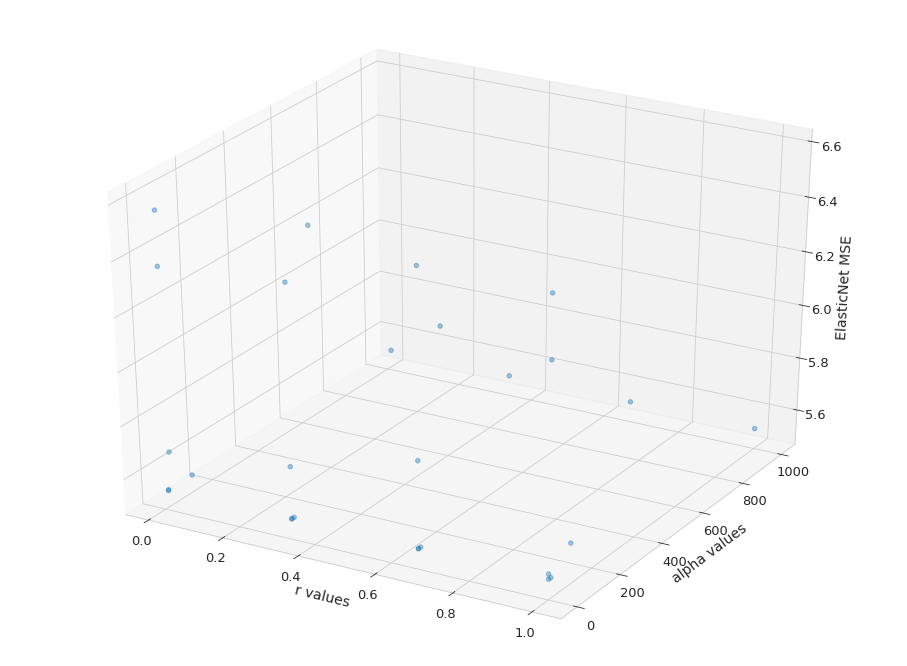

Minimum EsaticNet MSE occurs at,  [[0.01       0.01       5.54112141]] 

at r= 0.01 alpha= 0.01
models beta and intercept: [-0.51625515  0.70327541 -0.35484651] [1.45632525]


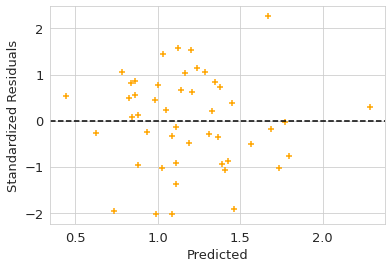

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

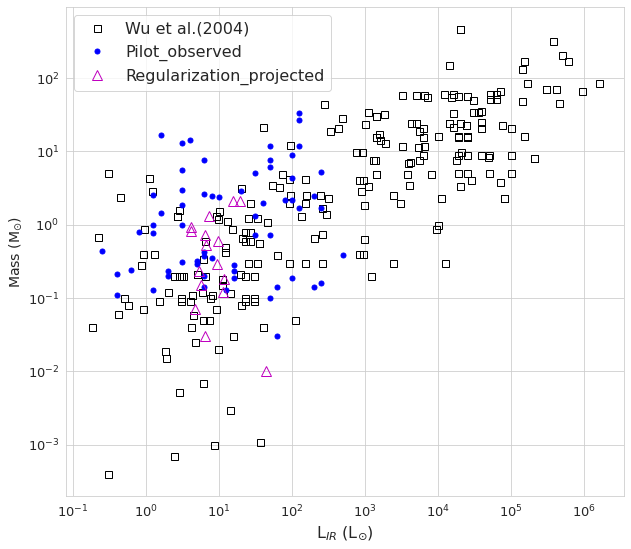

---------------------


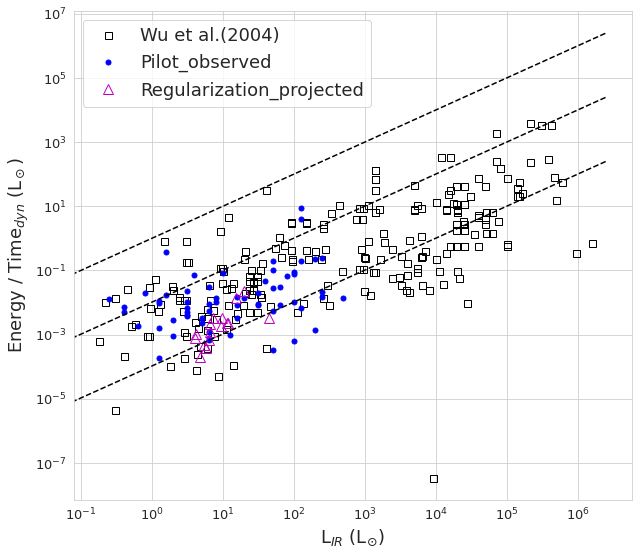

In [ ]:
## code here >>>>>>>>>>>>>> USE THE COMBINED FIELD (NEWFIELD+PILOT) OBSERVED OUTFLOWS+PROTO (66) ASSOCIATION TO PREDICT THE MISSING PROTOSTAR L_IR >>>>>>>>>>>

#####################################################################################################################################################
# >>>>>>>> K CROSS VALIDATION TO FIND THE BEST ALPHA AND R (REGULARIZATION PARAMETERS)
#####################################################################################################################################################
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor as gbreg 
## this calculates the test mse
def get_mse(model, X_train, X_test, y_train, y_test):
    # fit the model and get coeffs
    model.fit(X_train,y_train)
    print('models beta and intercept:', model.coef_, model.intercept_)

    # get the prediction
    pred = model.predict(X_test)

    # Returns the mse
    return np.sum(np.power(np.array(pred)-y_test,2))/len(pred)

#proto = Table.read('cygxPilot_proto.fits')
#wu = Table.read('WuTable.fit')
#outflowsCloud = Table.read('outflowsClouds_output.fit')



rs = np.linspace(0.01, 1, 4)
alphas = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2,1e3]
rv, alphav = np.meshgrid(rs, alphas)
r_alpha_grid = np.concatenate([rv.reshape(-1,1), alphav.reshape(-1,1)], axis=1)

MSE_regr = np.empty((len(rs),len(alphas),5))

# coefs cintains coeffs for each of 10 betas for every value of alpha 
regr_coefs = np.empty((len(rs),len(alphas),5)) 


# load data and tables >>>>>>>>>>>>

cygx_ofs_with_LIR = pd.read_csv(filepath + 'cygx_ofs_with_LIR.csv') 
pilotL = cygx_ofs_with_LIR # <<<<<<<< use the same same name for the sake for the code body, but the dataset is not only Pilot survey anymore

pilotL_refined = pilotL[pilotL['Dynamical Time'] > 0] # 'proto_arcmin.csv'  <<<<<<<<<<<< list observed L_IR
pilotL_refined = pilotL_refined[pilotL_refined['Mass'] > 0]
pilotL_refined = pilotL_refined[pilotL_refined['Energy'] > 0] 
pilotL_refined = pilotL_refined[pilotL_refined['logL_proto'] > 0]

pilotL_df = pilotL_refined[['Mass', 'Energy', 'Dynamical Time', 'logL_proto']]

#add log values
pilotL_df['logMass'] = np.log10(pilotL_df['Mass'])
pilotL_df['logE'] = np.log10(pilotL_df['Energy'])
pilotL_df['logt'] = np.log10(pilotL_df['Dynamical Time'])
#$pilotL_df['logL_proto'] = np.log10(pilotL_df['logL_proto'])
#pilotL_df['logLbol_proj.'] =  2.238  + ( 1.015 ) * clouds_df['logMass'] + ( 0.248 ) * clouds_df['logE'] + ( -0.293 ) * clouds_df['logt']


print('-infty in log mass',len(pilotL_df[(pilotL_df['logMass']) == -inf]))

# model and target defined 
variables = ['logMass', 'logE', 'logt', 'logL_proto']
features = ['logMass', 'logE', 'logt']
target = [ 'logL_proto']

# train test spllit
pilotL_train, pilotL_test =  train_test_split(pilotL_df[variables].copy(), test_size=0.15, random_state= 614)

## make a kfold object
kfold = KFold(n_splits=5, shuffle=True, random_state=789)

for i in range(len(rs)):
  for j in range(len(alphas)):
    print('r=', rs[i], 'and alpha=',alphas[j],'\n')

    # create cross validation folds
    k = 0
    for train_index, test_index in kfold.split(pilotL_train):
      print('lengths of test set and train set in this split=', len(test_index), len(train_index), '\n')
      print('test index in this', i+1, 'th Kfold split:', test_index, '\n and train_index :', train_index, '\n')
      pilotL_train_train = pilotL_train.iloc[train_index]
      pilotL_train_test = pilotL_train.iloc[test_index]
      #ads_holdout = ads_train.iloc[test_index]

      # build model 
      regr = ElasticNet(alpha=alphas[j],l1_ratio=rs[i],fit_intercept=True,copy_X=True, max_iter=5000000)
  
      # fit with pipeline 
      #pipe_regr = Pipeline([('transform',pipe_polyscaler),('elasticNet', regr)])

      regr.fit(pilotL_train_train[features], pilotL_train_train[target]) # reshaping because the transformation pipeline will make it a 10 dimensional axes data 
      #regr_coefs[i,j,:] = np.round(regr.coef_,3)


      ## add the predictions to the grid array
      clone_regr = clone(regr)
      clone_regr.fit(pilotL_train_train[features], pilotL_train_train[target])

      MSE_regr[i,j,k] = np.sum((clone_regr.predict(pilotL_train_test[features]) - (pilotL_train_test[target]).values )**2) / len(pilotL_train_test[target].values)
      print('ElasticNet MSE for', k+1, '-th fold is', MSE_regr[i,j,k], 'for r=', rs[i], 'and alpha=',alphas[j],'\n')
      k += 1

    #print('ElasticNet MSE =', MSE_regr[i,j],'for r=', rs[i], 'and alpha=',alphas[j])




print(MSE_regr.mean(axis=2))

print(MSE_regr.shape),
print(rs)
print('\n', alphas)
MSE_regr.mean(axis=2)

r_alpha_grid = np.concatenate([r_alpha_grid, MSE_regr.mean(axis=2).reshape(-1,1)], axis=1)


from matplotlib import cm
fig = plt.figure(figsize=(16,12))
## We'll add a 3d subplot object
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_alpha_grid[:, 0], r_alpha_grid[:, 1], r_alpha_grid[:,2], cmap=cm.hot, alpha=0.4)

## Add labels
ax.set_xlabel("r values", fontsize=14)
ax.set_ylabel("alpha values", fontsize=14)
ax.set_zlabel("ElasticNet MSE", fontsize=14)

#plt.legend(fontsize=14)
plt.show()


#####################################################################################################################################################
# >>>>>>>>>>>>>>>>>>>>>>>>>   RESIDUAL PLOT FOR VERIFYING QUALITY OF FIT 
#####################################################################################################################################################

print('Minimum EsaticNet MSE occurs at, ',r_alpha_grid[r_alpha_grid[:,2] == r_alpha_grid[:,2].min()], '\n')
r_alphs_grid_min = r_alpha_grid[r_alpha_grid[:,2] == r_alpha_grid[:,2].min()]
print('at r=', r_alphs_grid_min[0][0],'alpha=',r_alphs_grid_min[0][1])


regr = ElasticNet(alpha=r_alphs_grid_min[0][1],l1_ratio=r_alphs_grid_min[0][0],fit_intercept=True,copy_X=True, max_iter=5000000)
  
regr.fit(pilotL_train[features], pilotL_train[target]) # reshaping because the transformation pipeline will make it a 10 dimensional axes data 
#regr_coefs[i,j,:] = np.round(regr.coef_,3)

## add the predictions to the grid array
#clone_regr = clone(regr)
#clone_regr.fit(pilotL_train_train[features], pilotL_train_train[target])

#MSE_regr[i,j,k] = np.sum((clone_regr.predict(pilotL_train_test[features]) - (pilotL_train_test[target]).values )**2) / len(pilotL_train_test[target].values)
#print('ElasticNet MSE for', k+1, '-th fold is', MSE_regr[i,j,k], 'for r=', rs[i], 'and alpha=',alphas[j],'\n')

X_train = np.array(pilotL_train[features])
X_test = np.array(pilotL_test[features])

y_train = np.array(pilotL_train[target])
y_test = np.array(pilotL_test[target])
#y_valid =  np.array(pilotL_test[target])

get_mse(regr, X_train, X_test, y_train, y_test)
pred = regr.predict(X_train)

import scipy.stats as stats
res = pred - y_train.flatten()
plt.scatter(pred, stats.zscore(res),marker='+', color='orange')
#plt.plot(pred, stats.zscore(res),marker='.')
plt.axhline(y=0, linestyle='--', color='k')
plt.xlabel('Predicted')
plt.ylabel('Standardized Residuals')
plt.show()

#####################################################################################################################################################
# >>>>>   ElasticNet Projection of L_IR for outflowsCloud data Newfields data along with Pilot survey observations and Wu observations 
#####################################################################################################################################################

cygx_ofs_without_LIR  = pd.read_csv(filepath + 'cygx_ofs_without_LIR.csv') # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< list of missing L_IR
#<< keeping the name for the sake of code body


clouds = cygx_ofs_without_LIR  # <<<< ENtire list 
clouds_refined = clouds[clouds['Dynamical Time'] > 0]
clouds_refined = clouds[clouds['Mass'] > 0]
clouds_refined = clouds[clouds['Energy'] > 0]

clouds_df = clouds_refined[['ID',	'RAJ2000',	'DecJ2000', 'Mass', 'Momentum','Energy','Dynamical Time']]

#add log values
clouds_df['logMass'] = np.log10(clouds_df['Mass'])
clouds_df['logE'] = np.log10(clouds_df['Energy'])
clouds_df['logt'] = np.log10(clouds_df['Dynamical Time'])

features = ['logMass', 'logE', 'logt']
clouds_df['logLbol_proj.'] =  regr.predict(clouds_df[features]) # <<<<<<<<< regr is an ElasticNet Model



# >>>>>>>>>>>>>>>>>>>>>>>>>>>  COMPARISON PLOT >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), 10**(wu_df['logMass']), 'ks',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu et al.(2004)')
plt.loglog(10**(pilotL['logL_proto']), (pilotL['Mass']), 'b.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.loglog(10**(clouds_df['logLbol_proj.']), 10**(clouds_df['logMass']), '^', markersize=10, markerfacecolor='none', markeredgecolor='m', label='Regularization_projected')
plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 16)
plt.ylabel('Mass (M$_{\odot}$)', fontsize = 14)
plt.legend(fontsize=16)
plt.savefig(filepath + '/Regularization_results/Mass+LIR_projected(ElasticNet_66_84).pdf', format='pdf', dpi=300, overwrite=True)
plt.show()
plt.close()

print('---------------------')
m = wu_df['logLbol'].max()
x = np.linspace(0, 10**max(wu_df['logLbol']+0.2))
y1 = x
y2 = 1e-2*x
y3 = 1e-4 * x
#clouds_df_newfields = clouds_df.copy().loc[46:]

plt.figure(figsize=(10,9))
plt.loglog(10**(wu_df['logLbol']), (10**(wu_df['logE']) / 10**(wu_df['logt'])) * ((1e44*u.erg / (10*u.kyr)).to(u.solLum)), 's',  markersize=7, markerfacecolor='none', markeredgecolor='black', label='Wu et al.(2004)')
plt.loglog(10**(pilotL['logL_proto']), ((pilotL['Energy'] / pilotL['Dynamical Time'] ) * ((1e44*u.erg / (10*u.kyr)).to(u.solLum))), '.', markersize=10, markerfacecolor='blue', markeredgecolor='blue', label='Pilot_observed')
plt.loglog(10**(clouds_df['logLbol_proj.']), (10**(clouds_df['logE']) / 10**(clouds_df['logt'])) * ((1e44*u.erg / (10*u.kyr)).to(u.solLum)), '^', markersize=10, markerfacecolor='none', markeredgecolor='m', label='Regularization_projected')
#plt.loglog(10**(clouds_df_newfields['logLbol_proj_gradBoost']), (10**(clouds_df_newfields['logE']) / 10**(clouds_df_newfields['logt'])) * ((1e44*u.erg / (10*u.kyr)).to(u.solLum)), 'r+', markersize=10, markerfacecolor='none', markeredgecolor='m', label='GradBoost_projected')
# Plot 3 lines here 
plt.loglog(x,y1,'k--')
plt.loglog(x,y2,'k--')
plt.loglog(x,y3,'k--')
plt.xlabel('L$_{IR}$ (L$_{\odot}$)', fontsize = 18)
plt.ylabel('Energy / Time$_{dyn}$ (L$_\odot$)', fontsize = 18)
plt.legend(fontsize=18)
#plt.savefig('Energy_dissipated+LIR_projected(GradBoost with Pilot observations).pdf', format='pdf', dpi=300, overwrite=True)
plt.savefig(filepath + '/Regularization_results/Energy_dissipated+LIR_projected(ElasticNet_66_84).pdf', format='pdf', dpi=300, overwrite=True)
plt.show()
plt.close()

In [ ]:
features = ['ID',	'RAJ2000',	'DecJ2000',	'Distance',	'Vc',	'Mass',	'Momentum',	'Energy',	'Dynamical Time', 'Dist_proto',	'logL_proto',	'alpha_proto']
cygx_ofs_with_LIR0 = cygx_ofs_with_LIR.drop('Unnamed: 0', axis=1)[features].round({'Mass':1,	'Momentum':1,	'Energy':1})#.to_latex()
cygx_ofs_with_LIR0[cygx_ofs_with_LIR0.Mass>0].to_latex()

'\\begin{tabular}{llrrrrrrrrrrr}\n\\toprule\n{} &             ID &  RAJ2000 &  DecJ2000 &  Distance &    Vc &  Mass &  Momentum &  Energy &  Dynamical Time &  Dist\\_proto &  logL\\_proto &  alpha\\_proto \\\\\n\\midrule\n0  &              0 &  304.495 &    41.938 &      1.50 &  -2.6 &   0.1 &       0.4 &     0.1 &            11.7 &        68.0 &         1.1 &          0.4 \\\\\n1  &              0 &  304.506 &    41.926 &      1.50 &  -3.9 &   5.1 &      10.1 &     2.3 &            21.6 &        19.0 &         1.5 &          0.5 \\\\\n2  &              0 &  305.121 &    41.414 &      1.30 &  10.4 &   0.4 &       0.8 &     0.2 &            20.3 &        72.0 &         0.8 &          1.4 \\\\\n4  &              0 &  305.942 &    41.290 &      1.50 &  -1.4 &  12.9 &      27.8 &     6.9 &            53.2 &        24.0 &         0.5 &          1.1 \\\\\n5  &  G79.886+2.552 &  306.133 &    42.072 &      0.65 &   6.6 &   0.4 &       2.0 &     1.5 &             9.0 &        10.0 &         2.7

In [ ]:
clouds_df#[features].sort_values('ID')
features = ['ID',	'RAJ2000',	'DecJ2000',	'Distance',	'Vc',	'Mass',	'Momentum',	'Energy', 'Dynamical Time']
cygx_ofs_without_LIR0 = cygx_ofs_without_LIR.drop('Unnamed: 0', axis=1)[features].round({'Mass':1,	'Momentum':1,	'Energy':1})
clouds_df0 = clouds_df[['ID',	'RAJ2000',	'DecJ2000', 'logLbol_proj.' ]].round({'logLbol_proj.':1})

pd.merge(cygx_ofs_without_LIR0, clouds_df0).sort_values('ID', ascending=False).to_latex()


'\\begin{tabular}{llrrrrrrrrr}\n\\toprule\n{} &             ID &  RAJ2000 &  DecJ2000 &  Distance &   Vc &  Mass &  Momentum &  Energy &  Dynamical Time &  logLbol\\_proj. \\\\\n\\midrule\n15 &  G82.189-0.042 &  310.813 &    42.374 &      0.65 &  7.2 &   0.2 &       0.6 &     0.2 &             8.5 &            1.1 \\\\\n13 &  G81.770+0.851 &  309.486 &    42.597 &      1.50 & -0.4 &   0.5 &       1.3 &     0.4 &            27.3 &            0.8 \\\\\n14 &  G81.559+0.183 &  310.044 &    42.016 &      1.30 &  9.3 &   0.3 &       0.9 &     0.3 &            14.3 &            1.0 \\\\\n12 &  G80.815+0.661 &  308.918 &    41.709 &      1.50 & -3.0 &   0.2 &       0.4 &     0.1 &            30.0 &            0.8 \\\\\n5  &  G79.962+2.556 &  306.188 &    42.136 &      0.65 &  5.5 &   0.0 &       0.1 &     0.1 &             2.5 &            1.6 \\\\\n0  &              0 &  304.602 &    42.033 &      1.50 & -3.9 &   1.3 &       3.0 &     0.8 &            18.9 &            0.9 \\\\\n1  &         

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 4)                 16        
_________________________________________________________________
hidden2 (Dense)              (None, 100)               500       
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 617
Trainable params: 617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
2/2 [==============================] - 2s 10ms/step - loss: 0.2645 - accuracy: 0.0312
Epoch 2/40
2/2 [==============================] - 0s 10ms/step - loss: 0.2239 - accuracy: 0.0312
Epoch 3/40
2/2 [==============================] - 0s 9ms/step - loss: 0.1892 - accuracy: 0.0312
Epoch 4/40
2/2 [======================

Text(0, 0.5, 'Accuracy/Loss')

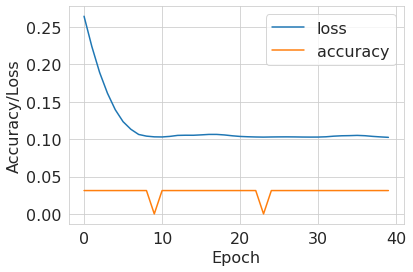

In [ ]:
######### Neural Network for predicting logL_proto from logMass	logE	logt : using Pilot survey observations >>>>>>>>>>>>>>>>>>>>>>

import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(42)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# select data
features = ['logMass', 'logE',	'logt']
target = ['logL_proto']
variables =  ['logMass',	'logE',	'logt', 'logL_proto']
# train test spllit
#outflow_df_train, outflow_df_test =  train_test_split(outflow_df.copy(), test_size=0.15, random_state= 42)
pilotL_df_train, pilotL_df_test =  train_test_split(pilotL_df.copy(), test_size=.15, random_state= 42)

X_train = pilotL_df_train[features]
X_test = pilotL_df_test[features]
y_train = pilotL_df_train[target]
y_test = pilotL_df_test[target]


y_train=np.reshape(y_train, (-1,1))
y_test=np.reshape(y_test, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)


# Build the network >> Input layers = # of features +1 >> Hidden layers = Training Data samples points/Factor * (Input Neurons + Output Neurons)
model = Sequential()
model.add(Dense(4, input_dim=3, activation='sigmoid',name = 'hidden1')) # 2 features, kernel_initializer='normal'
model.add(Dense(100, activation='relu',name = 'hidden2'))
model.add(Dense(1, name = 'output', activation='linear'))
model.summary()

# Compile model 
model.compile(optimizer='adam',  metrics=['accuracy'],
              loss="mse")
history = model.fit(xtrain_scale, ytrain_scale, epochs=40, batch_size=30, verbose=1)
pred = model.predict(xtest_scale)

print(history.history.keys())
# "Loss"
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'accuracy']].plot();
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')

In [ ]:
clouds_df.head(2)

,Mass,Energy,Dynamical Time,logMass,logE,logt,logLbol_proj.
0,0.380605,1.509977,8.988472,-0.419526,0.17897,0.953686,1.350517
1,0.011388,0.097026,2.509291,-1.943566,-1.01311,0.399551,1.586351


In [ ]:
pilotL_df.head(2)

,Mass,Energy,Dynamical Time,logL_proto,logMass,logE,logt
0,0.380605,1.509977,8.988472,1.871,-0.419526,0.178970,0.953686
1,0.191218,0.228813,5.672218,1.239,-0.718471,-0.640519,0.753753


In [ ]:
pred

array([[0.49979496],
       [0.53698945],
       [0.49879333],
       [0.52072585],
       [0.48833418],
       [0.5096876 ]], dtype=float32)

In [ ]:
ytest_scale

array([[1.        ],
       [0.90695526],
       [0.35145093],
       [0.31183784],
       [0.34776598],
       [0.        ]])

In [ ]:
####################################################################################################################################################################################################################################################
###  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                                                                                                                               <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
###  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>     ML REGRESSION MODEL OF OUTFLOW DENSITY ON MEAN CO INTENSITY AND MEAN 21-CM RADIO CONTINUUM INTENSITY PER UNIT AREA GRID   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
###  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                                                                                                                               <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
####################################################################################################################################################################################################################################################


In [ ]:

# >>>> 1. Build the data -> y = # of outflows per area of a fixed size, X = mean CO intensity, mean 21-cm intensity in the same area 
# >>>> 2. Test covariance matrix and scatter plot for visual association 
# >>>> 3. K-Fold cross validation to select optimal model 
# >>>> 4. SHow regression line, plot, and histogram  

from numpy import meshgrid
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# This is new, it will allow us to interact with 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D
## This sets the plot style to have a grid on a white background
sns.set_style("darkgrid")
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Import custom-built functions and files 
from google.colab import files
uploaded = files.upload() 


Saving outflowsClouds_output.fit to outflowsClouds_output.fit
Saving WuTable.fit to WuTable.fit
Saving cygx.c21.fits to cygx.c21.fits
Saving cygx_mom0.fits to cygx_mom0.fits
Saving cygxPilot_proto.fits to cygxPilot_proto.fits
Saving co+21cm49.csv to co+21cm49.csv


In [ ]:
outflowsCloud.to_pandas().drop('Seq', axis=1)

,ID,RAJ2000,DecJ2000,Mass,Momentum,Energy,Dynamical Time,Cloud_Mass,Cloud_Energy,Energy_(of/cloud+of)
0,b'G79.886+2.552',306.126950,42.071950,0.380605,1.983723,1.509977,8.988472,9.153315,5.683432,0.209911
1,b'G79.962+2.556',306.196277,42.137068,0.011388,0.101831,0.097026,2.509291,3.616023,1.515168,0.060183
2,b'G80.149+2.710',306.153875,42.375949,0.191218,0.633989,0.228813,5.672218,43.680866,3.538274,0.060740
3,b'G80.158+2.727',306.144000,42.394150,0.229135,0.899427,0.509065,5.063022,27.059939,4.306700,0.105708
4,b'G80.815+0.661',308.918500,41.709000,0.148948,0.387950,0.138077,30.027240,6.347718,0.990824,0.122311
...,...,...,...,...,...,...,...,...,...,...
79,b'0',309.855500,41.328200,11.935000,27.879000,6.831000,19.776000,1091.152000,108.336000,0.059314
80,b'0',309.873000,41.367900,0.980000,2.654000,1.037000,21.621000,468.391000,42.646000,0.023739
81,b'0',309.898400,41.328500,2.867000,8.147000,2.566000,15.732000,474.460000,52.169000,0.046880
82,b'0',309.880200,41.363700,5.501000,10.693000,2.514000,31.464000,631.369000,63.063000,0.038337


In [ ]:
####################################################################################################################################################################################################################################################
###  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>  ML REGRESSION MODEL OF OUTFLOW DENSITY ON MEAN CO INTENSITY AND MEAN 21-CM RADIO CONTINUUM INTENSITY PER UNIT AREA GRID <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# >>>> 1. Build the data -> y = # of outflows per area of a fixed size, X = mean CO intensity, mean 21-cm intensity in the same area 
# >>>> 2. Test covariance matrix and scatter plot for visual association 
# >>>> 3. K-Fold cross validation to select optimal model 
# >>>> 4. SHow regression line, plot, and histogram  

from numpy import meshgrid
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# This is new, it will allow us to interact with 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D
## This sets the plot style to have a grid on a white background
sns.set_style("darkgrid")
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#outflows = Table.read('outflowsCloudsJCMT_output.fit')
outflows = Table.read(filepath + 'outflowsClouds_output.fit')
cygx21cm = SpectralCube.read(filepath + 'cygx.c21.fits')
#co = co_mom #SpectralCube.read('cygx_mom0.fits')
co = SpectralCube.read(filepath + 'cygx_mom0.fits') #cube_cobig_km


xmin = co.world_extrema[0][0] # 304.157172*u.deg
xmax = co.world_extrema[0][1] #311.481944*u.deg
ymin = co.world_extrema[1][0] #39.256583*u.deg 
ymax = co.world_extrema[1][1] #45.458596*u.deg
dx = np.abs(xmax - xmin) / 5
dy = np.abs(ymax - ymin) / 5

co_mean = np.zeros(25) *u.K * u.km / u.s
c21_mean = np.zeros(25) * u.K
n_of = np.zeros(25)
counter = 0
k = 0
for i in range(5):
    for j in range(5):
        
        # TASK1: this extracts pixels based on 12co cube coordinates and slices segments from 12co map       
        lon_range = [xmin+i*dx, xmin+(i+1)*dx]
        lat_range = [ymin+j*dy, ymin+(j+1)*dy]
        # Create a sub_cube cut to these coordinates
        sub_cube = co.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
        co_mean[k] = (sub_cube.mean(axis=(1,2)))[0] 
        #print(k, co_mean[k])

        # TASK2: this extracts pixels based on 21cm coordinates and slices segments from 21cm map  
        sub_cube = cygx21cm.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
        c21_mean[k] = (sub_cube.mean(axis=(1,2)))[0] * u.K 
        #print(c21_mean[k])
        print('.......................') 

        # TASK3: count outflows in these 25 coordinate segments >>> use a boolean statement if coordinates from output_jcmt list belongs to each segment, counter[k]=counter[k]+1 
        for z in range(0,len(outflows)):
            s1 = (outflows['RAJ2000'][z]*u.deg > xmin+i*dx) & (outflows['RAJ2000'][z]*u.deg < xmin+(i+1)*dx)
            s2 = (outflows['DecJ2000'][z]*u.deg > ymin+j*dy) & (outflows['DecJ2000'][z]*u.deg < ymin+(j+1)*dy)
            if (s1 and s2) == True:
            # selected outflow coordinates fall in the range of fieldN.fits under consideration
                n_of[k] +=1
            else:
                pass
        k +=1

  
print(counter)
print('co mean values:',co_mean)
print('21-cm mean values:',c21_mean)
print('outflow numbers in segments:', n_of, '\n Total number of outflows=', n_of.sum())

.......................
.......................
.......................
.......................
.......................


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: Mean of empty slice
  **kwargs)


.......................
.......................
.......................
.......................
.......................


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: Mean of empty slice
  **kwargs)


.......................
.......................
.......................
.......................
.......................


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: Mean of empty slice
  **kwargs)


.......................
.......................
.......................
.......................
.......................


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: Mean of empty slice
  **kwargs)


.......................


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: Mean of empty slice
  **kwargs)


.......................


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: Mean of empty slice
  **kwargs)


.......................


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: Mean of empty slice
  **kwargs)


.......................
.......................
0
co mean values: [0.00000000e+00 4.22062799e-02 2.64624906e+00 1.72010530e-02
 0.00000000e+00            nan 1.86701977e+00 2.76020789e+00
 2.18631789e-01 2.14968575e-03            nan 3.46971846e+00
 9.74706829e-01 2.72253776e+00 3.91987234e-01            nan
 4.99713707e+00 1.69145222e+01 2.38847780e+00 5.51887155e-02
            nan            nan            nan            nan
 0.00000000e+00] K km / s
21-cm mean values: [14.98198795 15.96640491 11.89080715  9.63426685 10.45477009 25.35449409
 20.76989937 15.41147137 11.81578255  8.87288189 20.05030441 17.72145271
 14.30230522 15.6670351   9.77626228 13.50867462 17.82575607 23.50266838
 11.75858784  9.11956692  9.07072544 10.2956419  13.69727898 10.77467537
  9.61965942] K
outflow numbers in segments: [ 0.  0.  3.  0.  0.  1.  5.  6.  0.  0.  0. 13.  0.  6.  1.  0. 12. 33.
  0.  0.  0.  0.  4.  0.  0.] 
 Total number of outflows= 84.0


   Unnamed: 0  outflow_number  ...  12co(k km/s)   21cm (k)
0           0             0.0  ...           NaN  18.298695

[1 rows x 6 columns]


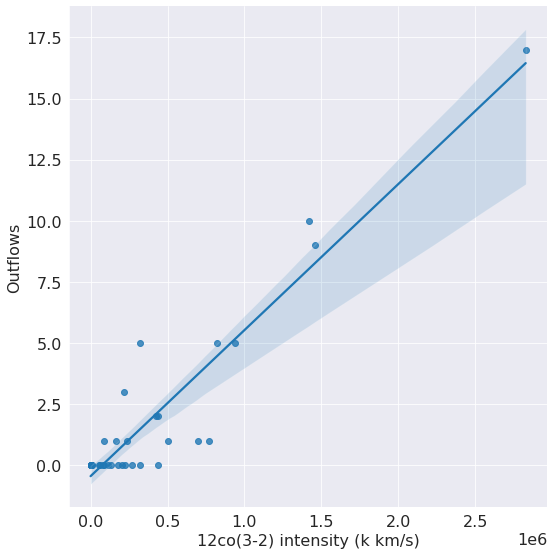

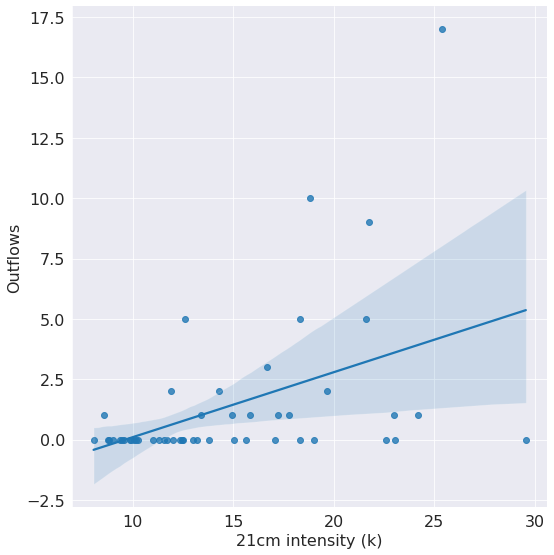

In [ ]:
outflow_df = pd.read_csv(filepath + 'co+21cm49.csv')
print(outflow_df.head(1))
sns.lmplot(data=outflow_df, x='12co(k km/s)', y='outflow_number', hue=None, height=8, ci=95)

plt.xlabel("12co(3-2) intensity (k km/s)", fontsize = 16)
plt.ylabel("Outflows", fontsize = 16)

plt.show()

sns.lmplot(data=outflow_df, x='21cm (k)', y='outflow_number', hue=None, height=8, ci=95)

plt.xlabel("21cm intensity (k)", fontsize = 16)
plt.ylabel("Outflows", fontsize = 16)

plt.show()



In [ ]:
outflows_df

,Unnamed: 0,outflow_number,class0_protostar_number,class1_protostar_number,12CO(K km/s),21cm(K),class0_protostar_number(pred)
0,0,0.0,2.0,31.0,NaN,18.298695,4.211762
1,1,0.0,6.0,13.0,0.000000e+00,23.062265,2.837069
2,2,1.0,2.0,24.0,8.554373e+04,14.927852,9.132093
3,3,5.0,2.0,8.0,8.240036e+05,12.604801,13.365390
4,4,0.0,0.0,0.0,5.310217e+04,10.279692,12.414037
5,5,0.0,0.0,0.0,0.000000e+00,9.581038,7.101583
6,6,0.0,0.0,0.0,0.000000e+00,10.988778,7.701626
7,7,0.0,6.0,41.0,NaN,22.612419,4.016733
8,8,0.0,4.0,18.0,1.335936e+05,29.544397,6.028940
9,9,2.0,4.0,28.0,4.407696e+05,19.648626,-1.687268


In [ ]:
## >>>>> CLEAN DATA = remove NaNs and replace all rows with outflows_number=0 with a single row with avg of corresponding co and 21cm values 
#outflows_df = pd.read_csv('co+21cm.csv')
outflows_df = pd.read_csv(filepath + 'co+21cm49.csv')
outflows_df = outflows_df[~np.isnan(outflows_df['12CO(K km/s)'])] 


# >>>>>>>>>   replace all zero outflow rows with a single row
val_co = (outflows_df.loc[outflows_df['outflow_number']==0])['12co(K km/s)'].mean()
val_21cm = (outflows_df.loc[outflows_df['outflow_number']==0])['21cm(K)'].mean()
#outflows_df = outflows_df[outflows_df['outflow_number'] != 0]
outflows_df.drop(outflows_df.loc[outflows_df['outflow_number']==0].index, inplace=True)
new_row = {'outflow_number': 0, '12co(k km/s)': val_co, '21cm(K)': val_21cm}
d = pd.Series(new_row)
data = pd.DataFrame(d)
outflows_df = outflows_df.append(d, ignore_index=True)
outflows_df = outflows_df.sort_values(by=['outflow_number'])
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# >>  standardizing data 
outflows_df['12co_z(K km/s)'] = (outflows_df['12co(K km/s)'] - outflows_df['12co(K km/s)'].mean()) / outflows_df['12co(K km/s)'].std()
outflows_df['21cm_z(K)'] = (outflows_df['21cm(K)'] - outflows_df['21cm(K)'].mean()) / outflows_df['21cm(K)'].std()

print(outflows_df)

## >>>>>>>>>  Display cleaned data >>>>>>>>>>>>>
sns.lmplot(data=outflows_df, x='12co(k km/s)', y='outflow_number', hue=None, height=8, ci=95)

plt.xlabel("12co(3-2) intensity (k km/s)", fontsize = 16)
plt.ylabel("Outflows", fontsize = 16)

plt.show()

sns.lmplot(data=outflows_df, x='21cm (k)', y='outflow_number', hue=None, height=8, ci=95)

plt.xlabel("21cm intensity (k)", fontsize = 16)
plt.ylabel("Outflows", fontsize = 16)

plt.show()

KeyError: ignored

In [ ]:
from scipy import stats
outflow_df = pd.DataFrame({'12co_mean(K km/s)':co_mean, '21cm_mean(K)': c21_mean, 'outflow_number': n_of})
#outflow_df = outflow_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#outflows_df = outflow_df[~np.isnan(outflow_df['12co_mean(K km/s)'])] 
co_avg = outflow_df['12co_mean(K km/s)'].mean()
outflow_df = outflow_df.fillna(co_avg)#axis=0, how='any', thresh=None, subset=None, inplace=False)
outflows_df = outflow_df.copy()
# >>>>>>>>>   replace all zero outflow rows with a single row
val_co = (outflows_df.loc[outflows_df['outflow_number']==0])['12co_mean(K km/s)'].mean()
val_21cm = (outflows_df.loc[outflows_df['outflow_number']==0])['21cm_mean(K)'].mean()
#outflows_df = outflows_df[outflows_df['outflow_number'] != 0]
outflows_df.drop(outflows_df.loc[outflows_df['outflow_number']==0].index, inplace=True)
new_row = {'outflow_number': 0, '12co_mean(K km/s)': val_co, '21cm_mean(K)': val_21cm}
d = pd.Series(new_row)
data = pd.DataFrame(d)
outflows_df = outflows_df.append(d, ignore_index=True)
outflows_df = outflows_df.sort_values(by=['outflow_number'])
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# >>  standardizing data 
outflows_df['12co_mean_z(K km/s)'] = stats.zscore(outflows_df['12co_mean(K km/s)'])
outflows_df['21cm_mean_z(K)'] =  stats.zscore(outflows_df['21cm_mean(K)'])

print(outflows_df.head(2))

## >>>>>>>>>  Display cleaned data >>>>>>>>>>>>>
sns.lmplot(data=outflows_df, x='12co_mean(K km/s)', y='outflow_number', hue=None, height=8, ci=95)

plt.xlabel("12co(3-2) intensity (k km/s)", fontsize = 16)
plt.ylabel("Outflows", fontsize = 16)

plt.show()

sns.lmplot(data=outflows_df, x='21cm_mean(K)', y='outflow_number', hue=None, height=8, ci=95)

plt.xlabel("21cm intensity (k)", fontsize = 16)
plt.ylabel("Outflows", fontsize = 16)

plt.show()

NameError: ignored

In [ ]:
outflow_df 

,outflow_number,class0_protostar_number,class1_protostar_number,12CO(K km/s),21cm(K),12CO_zscore(K km/s),21cm_zscore(K)
0,0.0,2.0,31.0,3.654659e+05,18.298695,0.000000,0.683386
1,0.0,6.0,13.0,0.000000e+00,23.062265,-0.763029,1.609519
2,1.0,2.0,24.0,8.554373e+04,14.927852,-0.584429,0.028028
3,5.0,2.0,8.0,8.240036e+05,12.604801,0.957347,-0.423619
4,0.0,0.0,0.0,5.310217e+04,10.279692,-0.652161,-0.875667
5,0.0,0.0,0.0,0.000000e+00,9.581038,-0.763029,-1.011499
6,0.0,0.0,0.0,0.000000e+00,10.988778,-0.763029,-0.737806
7,0.0,6.0,41.0,3.654659e+05,22.612419,0.000000,1.522060
8,0.0,4.0,18.0,1.335936e+05,29.544397,-0.484109,2.869773
9,2.0,4.0,28.0,4.407696e+05,19.648626,0.157221,0.945840


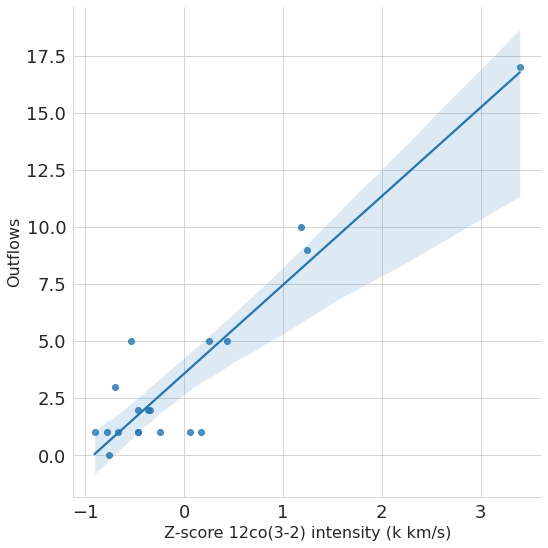

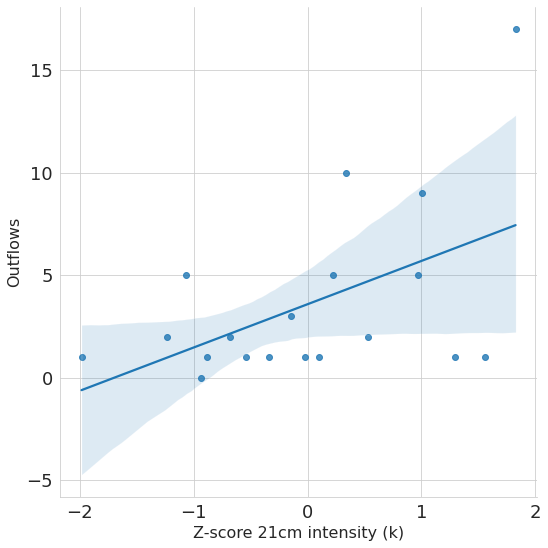

In [ ]:
## >>>>>>>>>>>>> RUN FROM THIS CELL >>>>>>>>>>>>>>>>>>>>>>>>>>>

outflows_df = pd.read_csv(filepath + 'co+21cm49.csv').drop('Unnamed: 0', axis=1)
outflows_df = outflows_df.copy().rename(columns={"12co(k km/s)": '12CO(K km/s)', "21cm (k)": '21cm(K)'})

co_avg = outflows_df['12CO(K km/s)'].mean()
outflows_df = outflows_df.fillna(co_avg)
outflow_df = outflows_df.copy()
# >>>>>>>>>   replace all zero outflow rows with a single row
val_co = (outflows_df.loc[outflows_df['outflow_number']==0])['12CO(K km/s)'].mean()
val_21cm = (outflows_df.loc[outflows_df['outflow_number']==0])['21cm(K)'].mean()
#outflows_df = outflows_df[outflows_df['outflow_number'] != 0]
outflows_df.drop(outflows_df.loc[outflows_df['outflow_number']==0].index, inplace=True)
new_row = {'outflow_number': 0, 'class0_protostar_number':0, 'class1_protostar_number':0, '12CO(K km/s)': val_co, '21cm(K)': val_21cm}
d = pd.Series(new_row)
data = pd.DataFrame(d)
outflows_df = outflows_df.append(d, ignore_index=True)
outflows_df = outflows_df.sort_values(by=['outflow_number'])

# >>  standardizing data 
outflows_df['12CO_zscore(K km/s)'] = stats.zscore(outflows_df['12CO(K km/s)'])
outflows_df['21cm_zscore(K)'] =  stats.zscore(outflows_df['21cm(K)'])

outflow_df['12CO_zscore(K km/s)'] = stats.zscore(outflow_df['12CO(K km/s)'])
outflow_df['21cm_zscore(K)'] =  stats.zscore(outflow_df['21cm(K)'])

## >>>>>>>>>  Display cleaned data >>>>>>>>>>>>>
sns.lmplot(data=outflows_df, x='12CO_zscore(K km/s)', y='outflow_number', hue=None, height=8, ci=95)

plt.xlabel("Z-score 12co(3-2) intensity (k km/s)", fontsize = 16)
plt.ylabel("Outflows", fontsize = 16)

plt.show()

sns.lmplot(data=outflows_df, x='21cm_zscore(K)', y='outflow_number', hue=None, height=8, ci=95)

plt.xlabel("Z-score 21cm intensity (k)", fontsize = 16)
plt.ylabel("Outflows", fontsize = 16)

plt.show()

Mean Absolute Error: 0.9828071823377224
Mean Squared Error: 1.3019484114603606
R2 Score: 0.8588248710464669
--- 0.06835222244262695 seconds ---


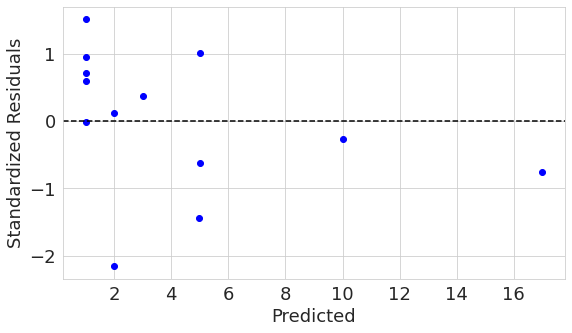

                12CO(K km/s)   21cm(K)  outflow_number
12CO(K km/s)        1.000000  0.530035        0.930433
21cm(K)             0.530035  1.000000        0.506345
outflow_number      0.930433  0.506345        1.000000


In [ ]:
###########################################################################################################################
###############        Implement a regression pipeline using  GradientBoostingRegressor      >>>>>>>>>>>>>>>>>>>>>>>>>>>
###############        predicting outflow number from 12CO and 21cm                          >>>>>>>>>>>>>>>>>>>>>>>>>>>
###########################################################################################################################
import time
start_time = time.time()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor as gbreg 

# select data
features = ['12co_mean(K km/s)', '21cm_mean(K)']
features = ['12CO_zscore(K km/s)', '21cm_zscore(K)']
target = ['outflow_number']
variables =  ['12CO(K km/s)', '21cm(K)','outflow_number']
# train test spllit
#outflow_df_train, outflow_df_test =  train_test_split(outflow_df.copy(), test_size=0.15, random_state= 42)
outflow_df_train, outflow_df_test =  train_test_split(outflows_df.copy(), test_size=.3, random_state= 42)

X_train = outflow_df_train[features]
X_test = outflow_df_test[features]
y_train = outflow_df_train[target]
y_test = outflow_df_test[target]

#X_train = outflows_df[features]
#y_train = outflows_df[target]


y_train=np.reshape(y_train, (-1,1))
y_test=np.reshape(y_test, (-1,1))


# Select model and train it
model = gbreg(n_estimators=100, max_depth=3, learning_rate=0.1)
model = model.fit(X_train, y_train)

# Make prediction
predictions = model.predict(X_test)

# Evaluate predictions
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R2 Score:', r2_score(y_test, predictions))

print("--- %s seconds ---" % (time.time() - start_time))


import scipy.stats as stats        ### <<<<<<<<<<<<<< some sort of pattern is still present BEACUSE OF MULTICOLLINEARITY?? 
pred = model.predict(X_train)
res = pred -  np.array(y_train).flatten()
plt.figure(figsize=(9,5))
plt.scatter(pred, stats.zscore(res),marker='o', color='blue')
#plt.plot(pred, stats.zscore(res),marker='.')
plt.axhline(y=0, linestyle='--', color='k')
plt.xlabel('Predicted')
plt.ylabel('Standardized Residuals')
plt.show()

print(outflows_df[variables].corr())

In [ ]:
np.array(X_train['12co_mean(K km/s)'])

array([ 3.46971846, 16.91452217,  0.39198723,  2.19266342,  4.99713707,
        2.19266342,  2.72253776,  2.64624906,  2.76020789])

In [ ]:
model.predict(X_train)

array([12.99704121, 32.99805319,  1.00182452,  1.00107439, 12.00291836,
        3.99543945,  6.00174993,  3.00014901,  6.00174993])

In [ ]:
plt.figure(figsize=(10,9))
matplotlib.rcParams.update({'font.size': 16})
sns.lmplot(data=outflows_df, x='12CO_zscore(K km/s)', y='outflow_number', hue=None, height=8, ci=95)
#plt.scatter(np.array(outflows_df['12co_mean(K km/s)']),outflows_df['outflow_number'])
plt.scatter(np.array(outflows_df['12CO_zscore(K km/s)']), model.predict(outflows_df[features]),marker='+',color='r')
plt.xlabel("Standardized 12CO(3-2) intensity (k km/s)")
plt.ylabel("Number of Outflows")
plt.savefig('OF_12co.pdf')
plt.show()

sns.lmplot(data=outflows_df, x='21cm_zscore(K)', y='outflow_number', hue=None, height=8, ci=95)
plt.scatter(np.array(outflows_df['21cm_zscore(K)']), model.predict(outflows_df[features]),marker='+',color='r')
plt.xlabel("Standardized 21cm intensity (k)")
plt.ylabel("Number of Outflows")
plt.savefig('OF_21cm.pdf')
plt.show()

NameError: ignored

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 3)                 9         
_________________________________________________________________
hidden2 (Dense)              (None, 100)               400       
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 510
Trainable params: 510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
2/2 [==============================] - 1s 7ms/step - loss: 30.1702 - accuracy: 0.0526
Epoch 2/40
2/2 [==============================] - 0s 6ms/step - loss: 30.0567 - accuracy: 0.0526
Epoch 3/40
2/2 [==============================] - 0s 6ms/step - loss: 29.9249 - accuracy: 0.0526
Epoch 4/40
2/2 [===================

Text(0, 0.5, 'Accuracy/Loss')

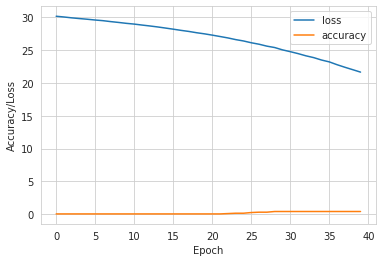

In [ ]:
######### Neural Network for predicting outflow number from 12CO and 21cm >>>>>>>>>>>>>>>>>>>>>>

import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(42)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# select data
#features = ['12co_mean(K km/s)', '21cm_mean(K)']
target = ['outflow_number']
variables =  ['	12co_mean(K km/s)', '21cm_mean(K)','outflow_number']
# train test spllit
#outflow_df_train, outflow_df_test =  train_test_split(outflow_df.copy(), test_size=0.15, random_state= 42)
outflows_df_train, outflows_df_test =  train_test_split(outflows_df.copy(), test_size=.15, random_state= 42)

X_train = outflow_df_train[features]
X_test = outflow_df_test[features]
y_train = outflow_df_train[target]
y_test = outflow_df_test[target]

X_train = outflows_df[features]
y_train = outflows_df[target]


y_train=np.reshape(y_train, (-1,1))
y_test=np.reshape(y_test, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)


# Build the network >> Input layers = # of features +1 >> Hidden layers = Training Data samples points/Factor * (Input Neurons + Output Neurons)
model = Sequential()
model.add(Dense(3, input_dim=2, kernel_initializer='normal', activation='relu',name = 'hidden1')) # 2 features, kernel_initializer='normal'
model.add(Dense(100, activation='relu',name = 'hidden2'))
model.add(Dense(1, name = 'output', activation='linear'))
model.summary()

# Compile model 
model.compile(optimizer='adam',  metrics=['accuracy'],
              loss="mse")
history = model.fit(X_train, y_train, epochs=40, batch_size=11, verbose=1)
pred = model.predict(X_test)

print(history.history.keys())
# "Loss"
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'accuracy']].plot();
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')

In [ ]:
score = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 137ms/step - loss: 0.7451 - accuracy: 0.3333


In [ ]:
model.predict(X_train)

array([[1.1486502],
       [1.1085538],
       [1.2450098],
       [1.0559412],
       [1.1547917],
       [1.1134475],
       [0.9708362],
       [1.0246495],
       [1.2370013],
       [1.1519762],
       [1.177453 ],
       [1.0496467],
       [1.0787649],
       [1.0500917],
       [1.2022463],
       [1.2732766],
       [1.4230605],
       [1.3923866],
       [2.020598 ]], dtype=float32)

In [ ]:
df['class0_protostar_number'].sum()

203.0

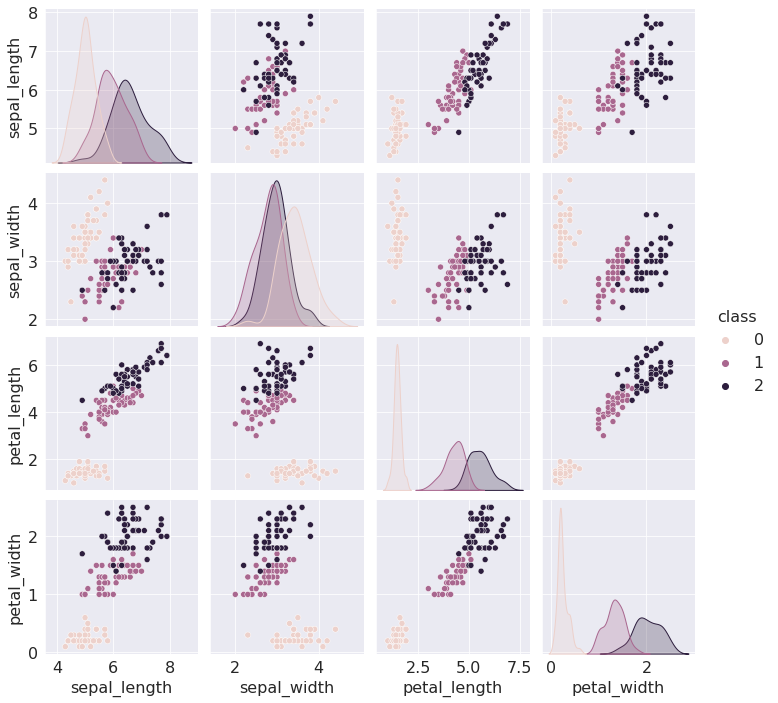

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()

# Create dataframe using IRIS dataset
df = pd.DataFrame(iris.data)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['class'] = iris.target
# Create pairplot of all the variables with hue set to class
sns.pairplot(df, hue='class')  
plt.show()

In [ ]:
variables = ['outflow_number', 'class0_protostar_number', 'class1_protostar_number', '12co(k km/s)', '21cm (k)']
sns.color_palette("hls", 8)
sns.pairplot(df[variables], kind='kde')#, hue='class0_protostar_number')

#plt.savefig('scatter_mt_21cm_co.pdf')
plt.show()

KeyError: ignored

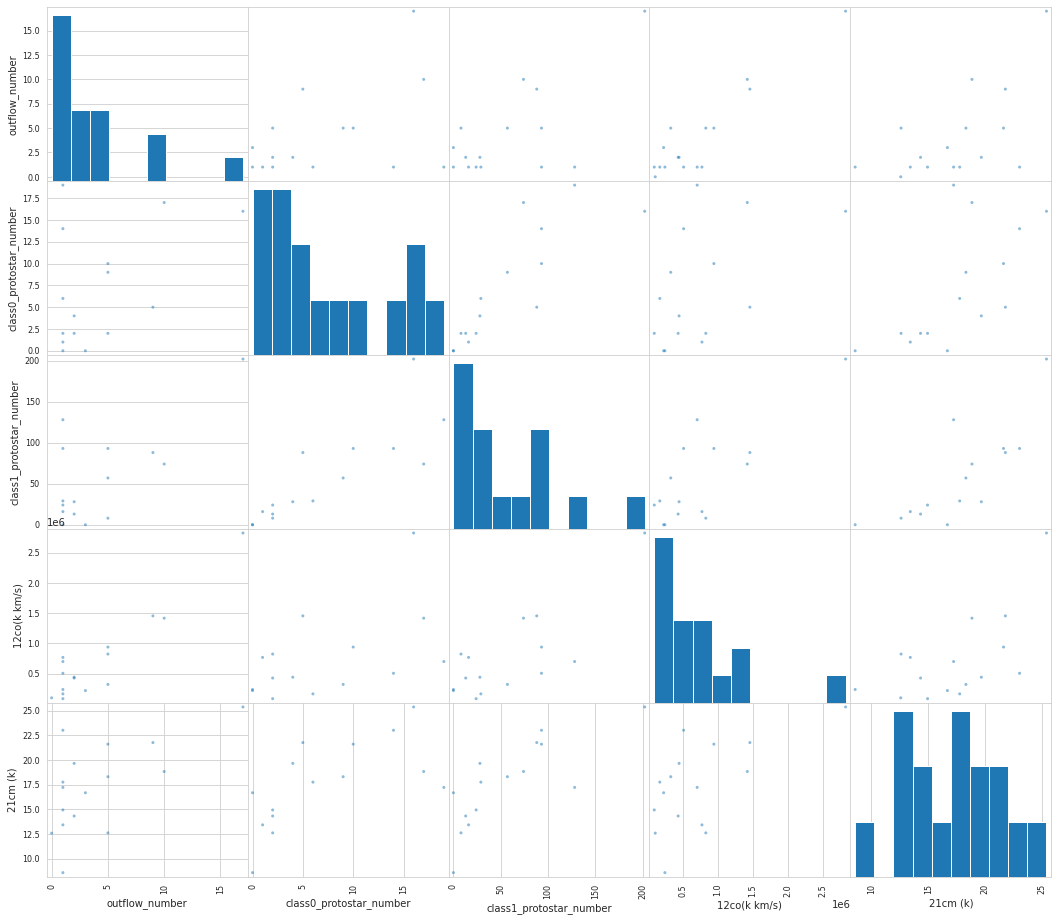

In [ ]:
variables = ['outflow_number', 'class0_protostar_number', 'class1_protostar_number', '12co(k km/s)', '21cm (k)']
scatter_matrix(outflows_df[variables], figsize=(18,16))
plt.savefig('scatter_mt_21cm_co.pdf')
plt.show()

In [ ]:
outflow_df

,outflow_number,class0_protostar_number,class1_protostar_number,12CO(K km/s),21cm(K),12CO_zscore(K km/s),21cm_zscore(K)
0,0.0,2.0,31.0,3.654659e+05,18.298695,0.000000,0.683386
1,0.0,6.0,13.0,0.000000e+00,23.062265,-0.763029,1.609519
2,1.0,2.0,24.0,8.554373e+04,14.927852,-0.584429,0.028028
3,5.0,2.0,8.0,8.240036e+05,12.604801,0.957347,-0.423619
4,0.0,0.0,0.0,5.310217e+04,10.279692,-0.652161,-0.875667
5,0.0,0.0,0.0,0.000000e+00,9.581038,-0.763029,-1.011499
6,0.0,0.0,0.0,0.000000e+00,10.988778,-0.763029,-0.737806
7,0.0,6.0,41.0,3.654659e+05,22.612419,0.000000,1.522060
8,0.0,4.0,18.0,1.335936e+05,29.544397,-0.484109,2.869773
9,2.0,4.0,28.0,4.407696e+05,19.648626,0.157221,0.945840


features ['12CO_zscore(K km/s)'] X matrix shape: (49, 1)
test split size= (10,)
models beta and intercept: [[2.05866437]] [1.63913921]
test split size= (10,)
models beta and intercept: [[3.37657382]] [1.50089501]
test split size= (10,)
models beta and intercept: [[1.62505603]] [1.13835815]
test split size= (10,)
models beta and intercept: [[3.05467553]] [1.34367709]
test split size= (9,)
models beta and intercept: [[0.90585609]] [0.4741245]
X-train matrix shape: (40, 1)
-------------------------------------------
features ['21cm_zscore(K)'] X matrix shape: (49, 1)
test split size= (10,)
models beta and intercept: [[0.14900126]] [0.8714464]
test split size= (10,)
models beta and intercept: [[1.36116892]] [1.25700279]
test split size= (10,)
models beta and intercept: [[1.26446444]] [1.22997343]
test split size= (10,)
models beta and intercept: [[3.75893332]] [2.74643908]
test split size= (9,)
models beta and intercept: [[-0.04365116]] [0.32645828]
X-train matrix shape: (40, 1)
----------

21cm_zscore(K)         0.442624
12CO_zscore(K km/s)    0.915573
outflow_number         1.000000
Name: outflow_number, dtype: float64
The regression equation is 
 outflow_number =  1.388  + ( 2.862698 )12co_z(k km/s) + ( 0.003742 )21cm_z(k)
MSE= 1.5830290262276066


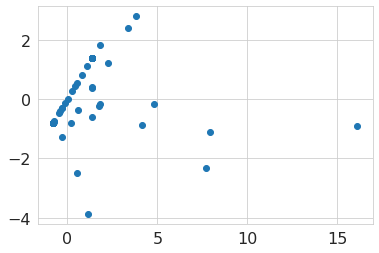

-------------------------
-------------------------


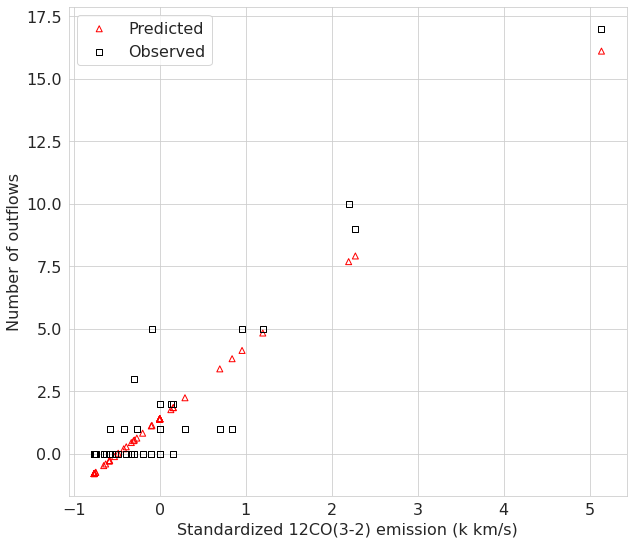

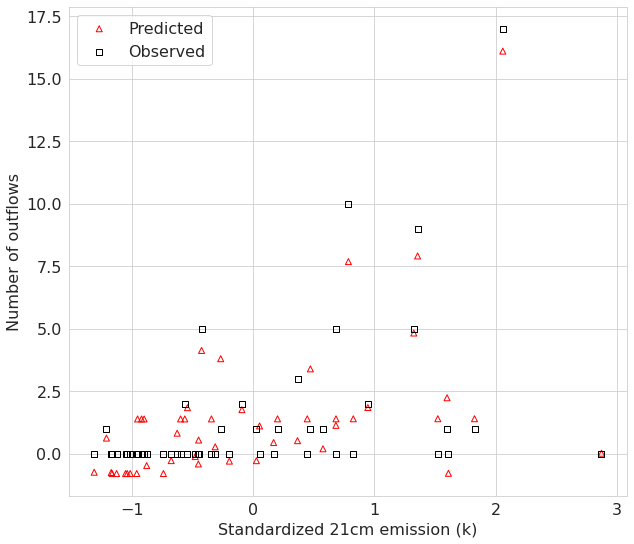

In [ ]:
## Quick plot
## sns.lmplot here

#outflow_df = pd.read_csv('co+21cm.csv')
#outflow_df = pd.read_csv('co+21cm49.csv')
#outflows_df = outflow_df[~np.isnan(outflow_df['12co(k km/s)'])] 

# Code here -------------->>>>>>>>>>>---------->>>>>>>>>>>>>
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import LinearRegression

#######################################    DEFINE FUNCTIONS   ##################
# This returns the power set of a set minus the empty set
def powerset_no_empty(s):
    power_set = []
    x = len(s)
    for i in range(1 << x): # this is a range from 0 to 2^n so all cases in a powerset 
        power_set.append([s[j] for j in range(x) if (i & (1 << j))])
            
    return power_set[1:]

## This gets our data for us
def get_X_y(df,features,target):
    # Returns X then y
    return np.array(df[features]), np.array(df[target])

## this calculates the mse
def get_mse(model, X, y):
    # fit the model and get coeffs
    model.fit(X,y)
    print('models beta and intercept:', model.coef_, model.intercept_)

    # get the prediction
    pred = model.predict(X)

    # Returns the mse
    return np.sum(np.power(pred-y,2))/len(y)

# MODEL SELECTION USING Kfold CROSS VALIDATION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

#   SELECT DATA  
features = ['12CO_zscore(K km/s)', '21cm_zscore(K)']
target = [ 'outflow_number']
outflows_train = outflow_df.copy() #.sample(frac = 0.99, random_state = 614)


# possible_features creates a set of all combinations (nC1 + nC2 + nC3 +...+ nCn) of existing n features in the original dataset 
possible_features = powerset_no_empty(features)

###############    BUILD THE MODEL   K##########################################
## Now we make a kfold object w/ 5 splits and shuffle the data before making the splits
kfold = KFold(n_splits = 5, shuffle = True, random_state = 440)

## Now make an array that will hold the mses
## for all the models
## the ROWs represent each possible model
MSEs = np.empty((len(possible_features),5))

## Make a regression model
reg = LinearRegression(copy_X = True)

################ DO THE REGRESSION in kfolds AND CALCULATE ERRORS ########################
for j in range(len(possible_features)): # possible_features contains the powerset of features, range = len=2^number of features = 127 cases
        ## get X and y
        X, y = get_X_y(outflows_train, possible_features[j], target) # this returns X matrix and y vector after removing all features right away before train-test split except for the ones needed for this specific model,  
        print('features', possible_features[j], 'X matrix shape:', X.shape) # but keeps all observations on those selected features

        
        ## Perform Cross Validation
        i = 0
        for train_index, test_index in kfold.split(X): # this splits X-matrix into k=5 equal subsets of observations (but keeps all features)
          ## For each possible model
          n_j = 0
    
          # Get the cv train test split
          X_train, X_test = X[train_index], X[test_index] # these indices come from the k-fold split we are in 
          y_train, y_test = y[train_index], y[test_index]
          print('test split size=', test_index.shape)
          # Cloning the regression makes a fresh regression 
          # model for each run
          clone_reg = clone(reg)
        
          # fit the model
          clone_reg.fit(X_train,y_train)

          #get coeffs
          #print(clone_reg.coef_, clone_reg.intercept_)
        
          MSEs[j,i] = get_mse(clone_reg, X_test, y_test)
          ## We'll now move to the next split
          i +=1
        print('X-train matrix shape:', X_train.shape)
        print('-------------------------------------------')

    #print('Number of MSEs or models with different collections of features per data split (total of 5 data splits) :', n_j )
    
         
print('The',MSEs.shape[0]*MSEs.shape[1],'MSEs for',MSEs.shape[0]*MSEs.shape[1],'models (', MSEs.shape[0]*MSEs.shape[1],'possible combinations of features/variables), each \n averaged over 5 cross-validation data sets are', MSEs.mean(axis=1))
print('-------------------------------------------')
print('The model number', np.argmin(MSEs.mean(axis=1)), 'has the least average CV MSE of', MSEs.mean(axis=1).min())
print('and this model has features = ', possible_features[np.argmin(MSEs.mean(axis=1))])



import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

index_features = np.arange(len(possible_features))
MSE_CV = np.round(MSEs.mean(axis=1),2)
optimized_features = possible_features[np.argmin(MSEs.mean(axis=1))]
df = pd.DataFrame({'MSE_CV': MSE_CV}, index_features)



sns.set_style("whitegrid")
fig = go.Figure()


trace1 = go.Scatter(
    x = df.index,
    y = df['MSE_CV'],
    name = 'Cross validation MSE',
    mode = 'lines+markers',

    line = dict(
      color = 'rgb(0,0,0)'
    ),

    marker = dict(
      color = 'rgb(0, 0, 255)'
    )
)


l = possible_features.index(optimized_features)

fig.add_trace(trace1)


# add a vertical line
fig.add_shape(type='line',
              x0=l, y0=MSE_CV.min()-1, x1=l, y1=MSE_CV.max()+1,
              line=dict(
                  color='rgb(255,0,0)',
                   dash='dot',                  
              )             
)


# Create text labels
fig.add_annotation(text="Min MSE at this model index",
                   x=l, y=MSE_CV.mean()+0.5,
                   showarrow = False,
                   textangle = -90,
)

# add a horizontal line
fig.add_shape(type='line',
              x0=0, y0=MSE_CV.min(), x1=len(possible_features), y1=MSE_CV.min(),
              line=dict(
                  color='rgb(128,0,0)',
                   dash='dot',                  
              )             
)

fig.add_annotation(text="Min MSE",
                   x=l-10, y=MSE_CV.min()-0.2,
                   showarrow = False,
                   textangle = 0,
)


fig.update_layout(title = 'Cross validation average loss function',
                  xaxis_title = 'Feature sets',
                  yaxis_title = 'MSE')
fig.show()



##  >>>>>>>>>>>> NOW REGRESSION BASED ON SELECTED FEATURES: emission data 21cm and 12co  >>>>>>>>>>>>>>>>>>>>>
variables = ['outflow_number', '12CO_zscore(K km/s)',	'21cm_zscore(K)']
features = ['12CO_zscore(K km/s)',	'21cm_zscore(K)']
target = ['outflow_number']


outflows_df = outflow_df.copy()
outflows_train = (outflows_df[variables]).copy()#.sample(frac = .99, random_state = 614)
#outflows_test = (outflows_df[variables]).copy().drop(outflows_train.index)

# correlation check 
print(outflows_train[variables].corr()['outflow_number'].sort_values())

# regression 
reg = LinearRegression(copy_X = True)
reg.fit(outflows_train[features], outflows_train[target])
print('The regression equation is \n outflow_number = ', round(reg.intercept_[0],3),' + (', round(reg.coef_[0][0],6) ,')12co_z(k km/s) + (', round(reg.coef_[0][1],6) ,')21cm_z(k)')

pred = reg.predict(outflows_train[features])
res = pred - outflows_train[target]

MSE_train = np.array(res.T.dot(res))[0][0]/(len(res))
print('MSE=', MSE_train)


plt.scatter(pred, res)
plt.show()

print('-------------------------')
outflows_df['outflow_number(pred)'] = round(reg.intercept_[0],3) +  round(reg.coef_[0][0],6) * outflows_df['12CO_zscore(K km/s)'] + round(reg.coef_[0][1],6) * outflows_df['21cm_zscore(K)']

plt.figure(figsize=(10,9))
plt.scatter(outflows_df['12CO_zscore(K km/s)'], outflows_df['outflow_number(pred)'], marker='^', facecolors='none', edgecolors='red', label='Predicted')
plt.scatter(outflows_df['12CO_zscore(K km/s)'], outflows_df['outflow_number'], marker='s', facecolors='none', edgecolors='black', label='Observed')
plt.xlabel('Standardized 12CO(3-2) emission (k km/s)')
plt.ylabel('Number of outflows')
plt.legend()
plt.savefig('co_of.pdf')
print('-------------------------')
plt.figure(figsize=(10,9))
plt.scatter(outflows_df['21cm_zscore(K)'], outflows_df['outflow_number(pred)'], marker='^', facecolors='none', edgecolors='red', label='Predicted')
plt.scatter(outflows_df['21cm_zscore(K)'], outflows_df['outflow_number'], marker='s', facecolors='none', edgecolors='black', label='Observed')
plt.xlabel('Standardized 21cm emission (k)')
plt.ylabel('Number of outflows')
plt.legend()
plt.savefig('21cm_of.pdf')

In [ ]:
## get the prediction this is where meshgrid comes in handy
xmin = outflows_df['12co_z(k km/s)'].min()
xmax = outflows_df['12co_z(k km/s)'].max()
ymin = outflows_df['21cm_z(k)'].min()
ymax = outflows_df['21cm_z(k)'].max()

xs = np.linspace(xmin,xmax, 100)
ys = np.linspace(ymin,ymax, 100)
print(xs, ys)
## this makes a meshgrid
xv, yv = np.meshgrid(xs, ys)

## combine x1v and x2v into a single array for prediction
X_grid = np.concatenate([xv.reshape(-1,1), yv.reshape(-1,1)], axis=1) # merges 2 matrices along the specified axis to create bivariate data. The key to this merge is in meshgrid formation print complete meshgrid
#print(X_grid)

## predict at each grid point
pred_grid = reg.predict(X_grid)

## add the predictions to the grid array
X_grid = np.concatenate([X_grid, pred_grid.reshape(-1,1)], axis=1)

[-0.89112563 -0.8519031  -0.81268056 -0.77345803 -0.73423549 -0.69501296
 -0.65579042 -0.61656789 -0.57734535 -0.53812282 -0.49890028 -0.45967775
 -0.42045521 -0.38123267 -0.34201014 -0.3027876  -0.26356507 -0.22434253
 -0.18512    -0.14589746 -0.10667493 -0.06745239 -0.02822986  0.01099268
  0.05021521  0.08943775  0.12866028  0.16788282  0.20710535  0.24632789
  0.28555042  0.32477296  0.36399549  0.40321803  0.44244056  0.4816631
  0.52088563  0.56010817  0.5993307   0.63855324  0.67777577  0.71699831
  0.75622084  0.79544338  0.83466591  0.87388845  0.91311098  0.95233352
  0.99155605  1.03077859  1.07000112  1.10922366  1.14844619  1.18766873
  1.22689126  1.2661138   1.30533633  1.34455887  1.3837814   1.42300394
  1.46222647  1.50144901  1.54067154  1.57989408  1.61911661  1.65833915
  1.69756169  1.73678422  1.77600676  1.81522929  1.85445183  1.89367436
  1.9328969   1.97211943  2.01134197  2.0505645   2.08978704  2.12900957
  2.16823211  2.20745464  2.24667718  2.28589971  2.

In [ ]:
%matplotlib notebook
## Now we plot the regression plane
## along with the training observations

## Make a figure object
fig = plt.figure(figsize=(8,6))

## We'll add a 3d subplot object
ax = fig.add_subplot(111, projection='3d')

## plot_trisurf makes a surface out of triangles
## it will take in the TV grid on the x-axis
## the radio grid on the y-axis
## and the prediction grid on the z-axis
## alpha <1 allows us to see through the surface
ax.plot_trisurf(X_grid[:, 0], X_grid[:, 1], X_grid[:,2], alpha=0.4)

## scatter will plot the observations from the training set
ax.scatter(outflows_train['12co_z(k km/s)'], outflows_train['21cm_z(k)'], outflows_train['outflow_number'], c="r", alpha=1)

## Add labels
ax.set_xlabel("12co_z(k km/s)", fontsize=14)
ax.set_ylabel("21cm_z(k)", fontsize=14)
ax.set_zlabel("outflows_df", fontsize=14)

#plt.legend(fontsize=14)
plt.show()
#plt.savefig('regression_outflows.html', format='pdf', dp=100, overwrite=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

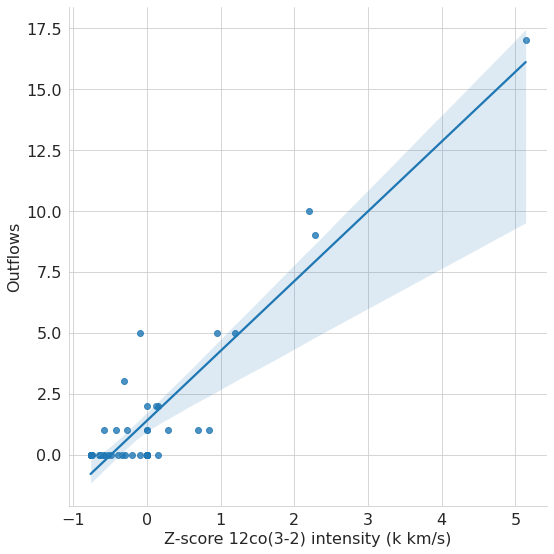

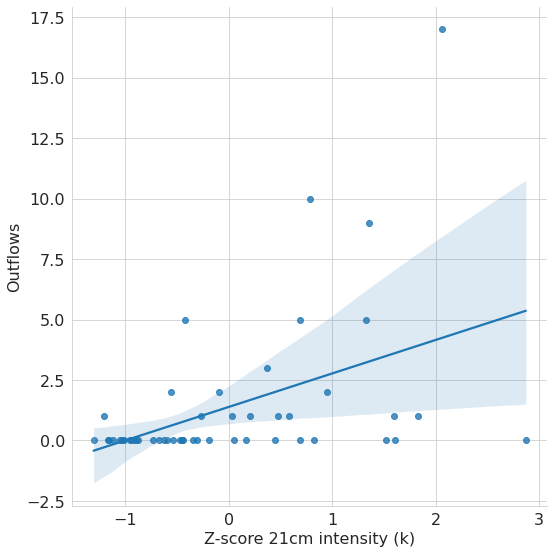

In [ ]:
## >>>>>>>>>>>>> RUN FROM THIS CELL >>>>>>>>>>>>>>>>>>>>>>>>>>>

outflows_df = pd.read_csv(filepath + 'co+21cm49.csv').drop('Unnamed: 0', axis=1)
outflows_df = outflows_df.copy().rename(columns={"12co(k km/s)": '12CO(K km/s)', "21cm (k)": '21cm(K)'})

co_avg = outflows_df['12CO(K km/s)'].mean()
outflows_df = outflows_df.fillna(co_avg)
outflow_df = outflows_df.copy()
# >>>>>>>>>   replace all zero outflow rows with a single row
val_co = (outflows_df.loc[outflows_df['outflow_number']==0])['12CO(K km/s)'].mean()
val_21cm = (outflows_df.loc[outflows_df['outflow_number']==0])['21cm(K)'].mean()
#outflows_df = outflows_df[outflows_df['outflow_number'] != 0]
outflows_df.drop(outflows_df.loc[outflows_df['outflow_number']==0].index, inplace=True)
new_row = {'outflow_number': 0, 'class0_protostar_number':0, 'class1_protostar_number':0, '12CO(K km/s)': val_co, '21cm(K)': val_21cm}
d = pd.Series(new_row)
data = pd.DataFrame(d)
outflows_df = outflows_df.append(d, ignore_index=True)
outflows_df = outflows_df.sort_values(by=['outflow_number'])

# >>  standardizing data 
outflows_df['12CO_zscore(K km/s)'] = stats.zscore(outflows_df['12CO(K km/s)'])
outflows_df['21cm_zscore(K)'] =  stats.zscore(outflows_df['21cm(K)'])

outflow_df['12CO_zscore(K km/s)'] = stats.zscore(outflow_df['12CO(K km/s)'])
outflow_df['21cm_zscore(K)'] =  stats.zscore(outflow_df['21cm(K)'])

## >>>>>>>>>  Display cleaned data >>>>>>>>>>>>>
sns.lmplot(data=outflow_df, x='12CO_zscore(K km/s)', y='outflow_number', hue=None, height=8, ci=95)

plt.xlabel("Z-score 12co(3-2) intensity (k km/s)", fontsize = 16)
plt.ylabel("Outflows", fontsize = 16)

plt.show()

sns.lmplot(data=outflow_df, x='21cm_zscore(K)', y='outflow_number', hue=None, height=8, ci=95)

plt.xlabel("Z-score 21cm intensity (k)", fontsize = 16)
plt.ylabel("Outflows", fontsize = 16)

plt.show()

features ['12CO_zscore(K km/s)'] X matrix shape: (49, 1)
test split size= (10,)
models beta and intercept: [[11.94200244]] [8.48763537]
test split size= (10,)
models beta and intercept: [[5.06363437]] [4.35123323]
test split size= (10,)
models beta and intercept: [[4.03671279]] [3.14368792]
test split size= (10,)
models beta and intercept: [[1.77988085]] [4.90183354]
test split size= (9,)
models beta and intercept: [[13.51030447]] [5.76648312]
X-train matrix shape: (40, 1)
-------------------------------------------
features ['21cm_zscore(K)'] X matrix shape: (49, 1)
test split size= (10,)
models beta and intercept: [[2.65849811]] [3.69054332]
test split size= (10,)
models beta and intercept: [[3.37797459]] [4.04146221]
test split size= (10,)
models beta and intercept: [[4.63615753]] [3.64319734]
test split size= (10,)
models beta and intercept: [[4.77534115]] [5.26971755]
test split size= (9,)
models beta and intercept: [[4.64560045]] [4.39834867]
X-train matrix shape: (40, 1)
-------

12CO_zscore(K km/s)        0.543006
21cm_zscore(K)             0.682989
class0_protostar_number    1.000000
Name: class0_protostar_number, dtype: float64
The regression equation is 
 class0_protostar_number =  4.143  + ( 1.550897 )12CO_zscore(K km/s) + ( 3.058265 )21cm_zscore(K)
MSE= 14.726516276183062


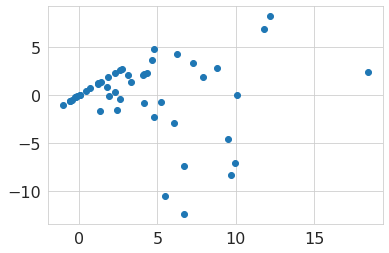

-------------------------
-------------------------


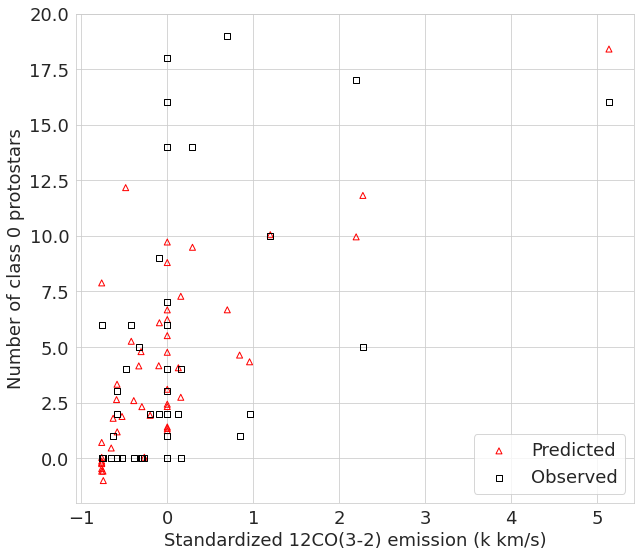

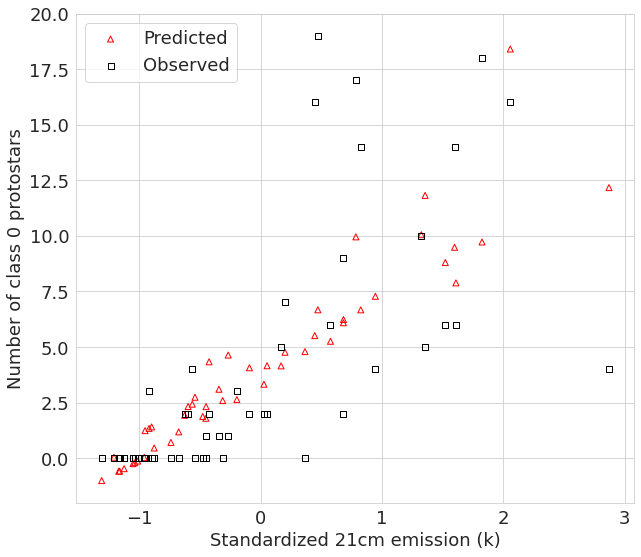

In [ ]:
######### >>>>>>>>>>>  21cm. 12co, class 0 protostars count correlation >>>>>>>>>>>>

## Quick plot
## sns.lmplot here

#outflow_df = pd.read_csv('co+21cm.csv')
#outflow_df = pd.read_csv('co+21cm49.csv')
#outflows_df = outflow_df[~np.isnan(outflow_df['12co(k km/s)'])] 

# Code here -------------->>>>>>>>>>>---------->>>>>>>>>>>>>
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import LinearRegression

#######################################    DEFINE FUNCTIONS   ##################
# This returns the power set of a set minus the empty set
def powerset_no_empty(s):
    power_set = []
    x = len(s)
    for i in range(1 << x): # this is a range from 0 to 2^n so all cases in a powerset 
        power_set.append([s[j] for j in range(x) if (i & (1 << j))])
            
    return power_set[1:]

## This gets our data for us
def get_X_y(df,features,target):
    # Returns X then y
    return np.array(df[features]), np.array(df[target])

## this calculates the mse
def get_mse(model, X, y):
    # fit the model and get coeffs
    model.fit(X,y)
    print('models beta and intercept:', model.coef_, model.intercept_)

    # get the prediction
    pred = model.predict(X)

    # Returns the mse
    return np.sum(np.power(pred-y,2))/len(y)

# MODEL SELECTION USING Kfold CROSS VALIDATION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

#   SELECT DATA  
variables = ['outflow_number', '12CO_zscore(K km/s)',	'21cm_zscore(K)']
features = ['12CO_zscore(K km/s)',	'21cm_zscore(K)']
target = [ 'class0_protostar_number']
outflow_train = outflow_df.copy() #.sample(frac = 0.99, random_state = 614)


# possible_features creates a set of all combinations (nC1 + nC2 + nC3 +...+ nCn) of existing n features in the original dataset 
possible_features = powerset_no_empty(features)

###############    BUILD THE MODEL   K##########################################
## Now we make a kfold object w/ 5 splits and shuffle the data before making the splits
kfold = KFold(n_splits = 5, shuffle = True, random_state = 440)

## Now make an array that will hold the mses
## for all the models
## the ROWs represent each possible model

MSEs = np.empty((len(possible_features),5))

## Make a regression model
reg = LinearRegression(copy_X = True)

################ DO THE REGRESSION in kfolds AND CALCULATE ERRORS ########################
for j in range(len(possible_features)): # possible_features contains the powerset of features, range = len=2^number of features = 127 cases
        ## get X and y
        X, y = get_X_y(outflow_train, possible_features[j], target) # this returns X matrix and y vector after removing all features right away before train-test split except for the ones needed for this specific model,  
        print('features', possible_features[j], 'X matrix shape:', X.shape) # but keeps all observations on those selected features

        
        ## Perform Cross Validation
        i = 0
        for train_index, test_index in kfold.split(X): # this splits X-matrix into k=5 equal subsets of observations (but keeps all features)
          ## For each possible model
          n_j = 0
    
          # Get the cv train test split
          X_train, X_test = X[train_index], X[test_index] # these indices come from the k-fold split we are in 
          y_train, y_test = y[train_index], y[test_index]
          print('test split size=', test_index.shape)
          # Cloning the regression makes a fresh regression 
          # model for each run
          clone_reg = clone(reg)
        
          # fit the model
          clone_reg.fit(X_train,y_train)

          #get coeffs
          #print(clone_reg.coef_, clone_reg.intercept_)
        
          MSEs[j,i] = get_mse(clone_reg, X_test, y_test)
          ## We'll now move to the next split
          i +=1
        print('X-train matrix shape:', X_train.shape)
        print('-------------------------------------------')

    #print('Number of MSEs or models with different collections of features per data split (total of 5 data splits) :', n_j )
    
         
print('The',MSEs.shape[0]*MSEs.shape[1],'MSEs for',MSEs.shape[0]*MSEs.shape[1],'models (', MSEs.shape[0]*MSEs.shape[1],'possible combinations of features/variables), each \n averaged over 5 cross-validation data sets are', MSEs.mean(axis=1))
print('-------------------------------------------')
print('The model number', np.argmin(MSEs.mean(axis=1)), 'has the least average CV MSE of', MSEs.mean(axis=1).min())
print('and this model has features = ', possible_features[np.argmin(MSEs.mean(axis=1))])



import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

index_features = np.arange(len(possible_features))
MSE_CV = np.round(MSEs.mean(axis=1),2)
optimized_features = possible_features[np.argmin(MSEs.mean(axis=1))]
df = pd.DataFrame({'MSE_CV': MSE_CV}, index_features)



sns.set_style("whitegrid")
fig = go.Figure()


trace1 = go.Scatter(
    x = df.index,
    y = df['MSE_CV'],
    name = 'Cross validation MSE',
    mode = 'lines+markers',

    line = dict(
      color = 'rgb(0,0,0)'
    ),

    marker = dict(
      color = 'rgb(0, 0, 255)'
    )
)


l = possible_features.index(optimized_features)

fig.add_trace(trace1)


# add a vertical line
fig.add_shape(type='line',
              x0=l, y0=MSE_CV.min()-1, x1=l, y1=MSE_CV.max()+1,
              line=dict(
                  color='rgb(255,0,0)',
                   dash='dot',                  
              )             
)


# Create text labels
fig.add_annotation(text="Min MSE at this model index",
                   x=l, y=MSE_CV.mean()+0.5,
                   showarrow = False,
                   textangle = -90,
)

# add a horizontal line
fig.add_shape(type='line',
              x0=0, y0=MSE_CV.min(), x1=len(possible_features), y1=MSE_CV.min(),
              line=dict(
                  color='rgb(128,0,0)',
                   dash='dot',                  
              )             
)

fig.add_annotation(text="Min MSE",
                   x=l-10, y=MSE_CV.min()-0.2,
                   showarrow = False,
                   textangle = 0,
)


fig.update_layout(title = 'Cross validation average loss function',
                  xaxis_title = 'Feature sets',
                  yaxis_title = 'MSE')
fig.show()



##  >>>>>>>>>>>> NOW REGRESSION BASED ON SELECTED FEATURES: emission data 21cm and 12co  >>>>>>>>>>>>>>>>>>>>>
variables = ['class0_protostar_number', '12CO_zscore(K km/s)',	'21cm_zscore(K)']
features = ['12CO_zscore(K km/s)',	'21cm_zscore(K)']
target = ['class0_protostar_number']

outflow_train = (outflow_df.copy()[variables])#.sample(frac = .99, random_state = 614)
#outflows_test = (outflow_df[variables]).copy().drop(outflows_train.index)

# correlation check 
print(outflow_train[variables].corr()['class0_protostar_number'].sort_values())

# regression 
reg = LinearRegression(copy_X = True)
reg.fit(outflow_train[features], outflow_train[target])
print('The regression equation is \n class0_protostar_number = ', round(reg.intercept_[0],3),' + (', round(reg.coef_[0][0],6) ,')12CO_zscore(K km/s) + (', round(reg.coef_[0][1],6) ,')21cm_zscore(K)')

pred = reg.predict(outflow_train[features])
res = pred - outflow_train[target]

MSE_train = np.array(res.T.dot(res))[0][0]/(len(res))
print('MSE=', MSE_train)


plt.scatter(pred, res)
plt.show()

print('-------------------------')
outflow_df['class0_protostar_number(pred)'] = pred #round(reg.intercept_[0],3) +  round(reg.coef_[0][0],6) * outflows_df['12CO_zscore(K km/s)'] + round(reg.coef_[0][1],6) * outflows_df['21cm_zscore(K)']
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,9))
plt.scatter(outflow_df['12CO_zscore(K km/s)'], outflow_df['class0_protostar_number(pred)'], marker='^', facecolors='none', edgecolors='red', label='Predicted')
plt.scatter(outflow_df['12CO_zscore(K km/s)'], outflow_df['class0_protostar_number'], marker='s', facecolors='none', edgecolors='black', label='Observed')
plt.xlabel('Standardized 12CO(3-2) emission (k km/s)')
plt.ylabel('Number of class 0 protostars')
plt.legend()
plt.savefig('co_proto_0.pdf')
print('-------------------------')
plt.figure(figsize=(10,9))
plt.scatter(outflow_df['21cm_zscore(K)'], outflow_df['class0_protostar_number(pred)'], marker='^', facecolors='none', edgecolors='red', label='Predicted')
plt.scatter(outflow_df['21cm_zscore(K)'], outflow_df['class0_protostar_number'], marker='s', facecolors='none', edgecolors='black', label='Observed')
plt.xlabel('Standardized 21cm emission (k)')
plt.ylabel('Number of class 0 protostars')
plt.legend()
plt.savefig('21cm_proto_0.pdf')

In [ ]:
outflows_df

,outflow_number,class0_protostar_number,class1_protostar_number,12CO(K km/s),21cm(K),12CO_zscore(K km/s),21cm_zscore(K),outflow_number(pred),class0_protostar_number(pred),class1_protostar_number(pred)
0,0.0,2.0,31.0,3.654659e+05,18.298695,0.000000,0.683386,1.390557,6.232976,58.187127
1,0.0,6.0,13.0,0.000000e+00,23.062265,-0.763029,1.609519,-0.790300,7.881955,96.192836
2,1.0,2.0,24.0,8.554373e+04,14.927852,-0.584429,0.028028,-0.284938,3.322327,31.293168
3,5.0,2.0,8.0,8.240036e+05,12.604801,0.957347,-0.423619,4.127010,4.332206,12.758925
4,0.0,0.0,0.0,5.310217e+04,10.279692,-0.652161,-0.875667,-0.482217,0.453544,-5.791746
5,0.0,0.0,0.0,0.000000e+00,9.581038,-0.763029,-1.011499,-0.800107,-0.133811,-11.365886
6,0.0,0.0,0.0,0.000000e+00,10.988778,-0.763029,-0.737806,-0.799083,0.703213,-0.134366
7,0.0,6.0,41.0,3.654659e+05,22.612419,0.000000,1.522060,1.393696,8.797862,92.603779
8,0.0,4.0,18.0,1.335936e+05,29.544397,-0.484109,2.869773,0.012881,12.168724,147.909926
9,2.0,4.0,28.0,4.407696e+05,19.648626,0.157221,0.945840,1.841616,7.279462,68.957432


features ['12CO_zscore(K km/s)'] X matrix shape: (49, 1)
test split size= (10,)
models beta and intercept: [[85.79956365]] [60.90532315]
test split size= (10,)
models beta and intercept: [[22.69527832]] [24.12243351]
test split size= (10,)
models beta and intercept: [[37.05859646]] [26.05518903]
test split size= (10,)
models beta and intercept: [[30.88098767]] [28.31177495]
test split size= (9,)
models beta and intercept: [[94.56264087]] [40.80835128]
X-train matrix shape: (40, 1)
-------------------------------------------
features ['21cm_zscore(K)'] X matrix shape: (49, 1)
test split size= (10,)
models beta and intercept: [[15.63503219]] [27.10380772]
test split size= (10,)
models beta and intercept: [[14.12856072]] [22.69167331]
test split size= (10,)
models beta and intercept: [[34.61476515]] [29.19553197]
test split size= (10,)
models beta and intercept: [[52.70241097]] [39.93669932]
test split size= (9,)
models beta and intercept: [[31.56933769]] [31.08328135]
X-train matrix shap

21cm_zscore(K)             0.692961
12CO_zscore(K km/s)        0.773321
class1_protostar_number    1.000000
Name: class1_protostar_number, dtype: float64
The regression equation is 
 class1_protostar_number =  30.143  + ( 23.739436 )12CO_zscore(K km/s) + ( 17.297576 )21cm_zscore(K)
MSE= 462.3698191908863


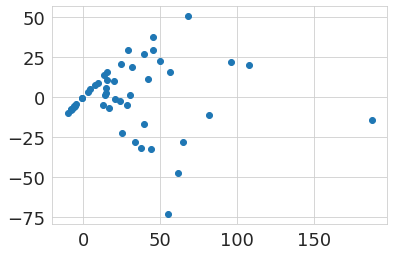

-------------------------
-------------------------


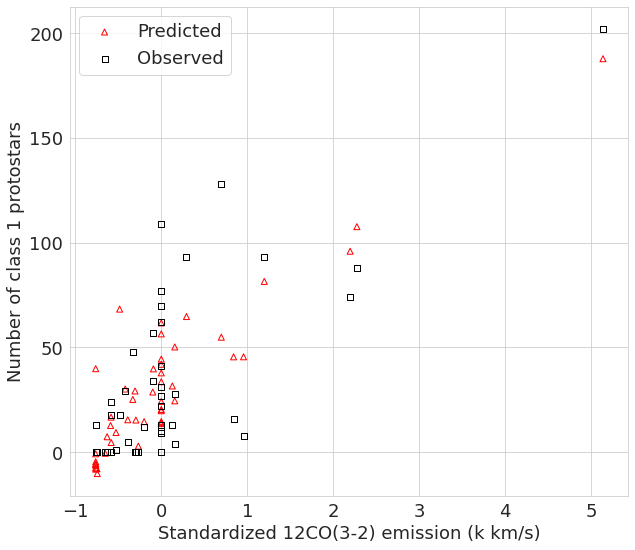

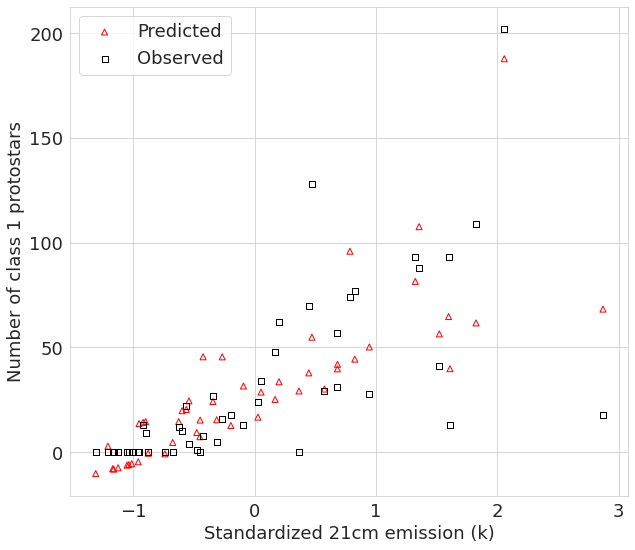

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> CLASS 1 PROTO >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
######### >>>>>>>>>>>  21cm. 12co, class 1 protostars count correlation >>>>>>>>>>>>

## Quick plot
## sns.lmplot here

#outflow_df = pd.read_csv('co+21cm.csv')
#outflow_df = pd.read_csv('co+21cm49.csv')
#outflows_df = outflow_df[~np.isnan(outflow_df['12co(k km/s)'])] 

# Code here -------------->>>>>>>>>>>---------->>>>>>>>>>>>>
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import LinearRegression

#######################################    DEFINE FUNCTIONS   ##################
# This returns the power set of a set minus the empty set
def powerset_no_empty(s):
    power_set = []
    x = len(s)
    for i in range(1 << x): # this is a range from 0 to 2^n so all cases in a powerset 
        power_set.append([s[j] for j in range(x) if (i & (1 << j))])
            
    return power_set[1:]

## This gets our data for us
def get_X_y(df,features,target):
    # Returns X then y
    return np.array(df[features]), np.array(df[target])

## this calculates the mse
def get_mse(model, X, y):
    # fit the model and get coeffs
    model.fit(X,y)
    print('models beta and intercept:', model.coef_, model.intercept_)

    # get the prediction
    pred = model.predict(X)

    # Returns the mse
    return np.sum(np.power(pred-y,2))/len(y)

# MODEL SELECTION USING Kfold CROSS VALIDATION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

#   SELECT DATA  
features = ['12CO_zscore(K km/s)',	'21cm_zscore(K)']
target = [ 'class1_protostar_number']
#outflows_df = outflows_df.copy().rename(columns={"12co(k km/s)": '12CO(K km/s)', "21cm (k)": '21cm(K)'})
outflow_train = outflow_df.copy() #.sample(frac = 0.99, random_state = 614)

# possible_features creates a set of all combinations (nC1 + nC2 + nC3 +...+ nCn) of existing n features in the original dataset 
possible_features = powerset_no_empty(features)

###############    BUILD THE MODEL   K##########################################
## Now we make a kfold object w/ 5 splits and shuffle the data before making the splits
kfold = KFold(n_splits = 5, shuffle = True, random_state = 440)

## Now make an array that will hold the mses
## for all the models
## the ROWs represent each possible model
MSEs = np.empty((len(possible_features),5))

## Make a regression model
reg = LinearRegression(copy_X = True)

################ DO THE REGRESSION in kfolds AND CALCULATE ERRORS ########################
for j in range(len(possible_features)): # possible_features contains the powerset of features, range = len=2^number of features = 127 cases
        ## get X and y
        X, y = get_X_y(outflow_train, possible_features[j], target) # this returns X matrix and y vector after removing all features right away before train-test split except for the ones needed for this specific model,  
        print('features', possible_features[j], 'X matrix shape:', X.shape) # but keeps all observations on those selected features

        
        ## Perform Cross Validation
        i = 0
        for train_index, test_index in kfold.split(X): # this splits X-matrix into k=5 equal subsets of observations (but keeps all features)
          ## For each possible model
          n_j = 0
    
          # Get the cv train test split
          X_train, X_test = X[train_index], X[test_index] # these indices come from the k-fold split we are in 
          y_train, y_test = y[train_index], y[test_index]
          print('test split size=', test_index.shape)
          # Cloning the regression makes a fresh regression 
          # model for each run
          clone_reg = clone(reg)
        
          # fit the model
          clone_reg.fit(X_train,y_train)

          #get coeffs
          #print(clone_reg.coef_, clone_reg.intercept_)
        
          MSEs[j,i] = get_mse(clone_reg, X_test, y_test)
          ## We'll now move to the next split
          i +=1
        print('X-train matrix shape:', X_train.shape)
        print('-------------------------------------------')

    #print('Number of MSEs or models with different collections of features per data split (total of 5 data splits) :', n_j )
    
         
print('The',MSEs.shape[0]*MSEs.shape[1],'MSEs for',MSEs.shape[0]*MSEs.shape[1],'models (', MSEs.shape[0]*MSEs.shape[1],'possible combinations of features/variables), each \n averaged over 5 cross-validation data sets are', MSEs.mean(axis=1))
print('-------------------------------------------')
print('The model number', np.argmin(MSEs.mean(axis=1)), 'has the least average CV MSE of', MSEs.mean(axis=1).min())
print('and this model has features = ', possible_features[np.argmin(MSEs.mean(axis=1))])



import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

index_features = np.arange(len(possible_features))
MSE_CV = np.round(MSEs.mean(axis=1),2)
optimized_features = possible_features[np.argmin(MSEs.mean(axis=1))]
df = pd.DataFrame({'MSE_CV': MSE_CV}, index_features)



sns.set_style("whitegrid")
fig = go.Figure()


trace1 = go.Scatter(
    x = df.index,
    y = df['MSE_CV'],
    name = 'Cross validation MSE',
    mode = 'lines+markers',

    line = dict(
      color = 'rgb(0,0,0)'
    ),

    marker = dict(
      color = 'rgb(0, 0, 255)'
    )
)


l = possible_features.index(optimized_features)

fig.add_trace(trace1)


# add a vertical line
fig.add_shape(type='line',
              x0=l, y0=MSE_CV.min()-1, x1=l, y1=MSE_CV.max()+1,
              line=dict(
                  color='rgb(255,0,0)',
                   dash='dot',                  
              )             
)


# Create text labels
fig.add_annotation(text="Min MSE at this model index",
                   x=l, y=MSE_CV.mean()+0.5,
                   showarrow = False,
                   textangle = -90,
)

# add a horizontal line
fig.add_shape(type='line',
              x0=0, y0=MSE_CV.min(), x1=len(possible_features), y1=MSE_CV.min(),
              line=dict(
                  color='rgb(128,0,0)',
                   dash='dot',                  
              )             
)

fig.add_annotation(text="Min MSE",
                   x=l-10, y=MSE_CV.min()-0.2,
                   showarrow = False,
                   textangle = 0,
)


fig.update_layout(title = 'Cross validation average loss function',
                  xaxis_title = 'Feature sets',
                  yaxis_title = 'MSE')
fig.show()



##  >>>>>>>>>>>> NOW REGRESSION BASED ON SELECTED FEATURES: emission data 21cm and 12co  >>>>>>>>>>>>>>>>>>>>>
variables = ['class1_protostar_number', '12CO_zscore(K km/s)',	'21cm_zscore(K)']
features = ['12CO_zscore(K km/s)',	'21cm_zscore(K)']
target = ['class1_protostar_number']
outflows_df = outflow_df.copy()
outflow_train = (outflow_df[variables]).copy()#.sample(frac = .99, random_state = 614)
#outflows_test = (outflow_df[variables]).copy().drop(outflows_train.index)

# correlation check 
print(outflow_train[variables].corr()['class1_protostar_number'].sort_values())

# regression 
reg = LinearRegression(copy_X = True)
reg.fit(outflow_train[features], outflow_train[target])
print('The regression equation is \n class1_protostar_number = ', round(reg.intercept_[0],3),' + (', round(reg.coef_[0][0],6) ,')12CO_zscore(K km/s) + (', round(reg.coef_[0][1],6) ,')21cm_zscore(K)')

pred = reg.predict(outflow_train[features])
res = pred - outflow_train[target]

MSE_train = np.array(res.T.dot(res))[0][0]/(len(res))
print('MSE=', MSE_train)


plt.scatter(pred, res)
plt.show()

print('-------------------------')
outflow_df['class1_protostar_number(pred)'] = pred #round(reg.intercept_[0],3) +  round(reg.coef_[0][0],6) * outflow_df['21cm_zscore(K)'] + round(reg.coef_[0][1],6) * outflow_df['21cm_zscore(K)']

plt.figure(figsize=(10,9))
plt.scatter(outflow_df['12CO_zscore(K km/s)'], outflow_df['class1_protostar_number(pred)'], marker='^', facecolors='none', edgecolors='red', label='Predicted')
plt.scatter(outflow_df['12CO_zscore(K km/s)'], outflow_df['class1_protostar_number'], marker='s', facecolors='none', edgecolors='black', label='Observed')
plt.xlabel('Standardized 12CO(3-2) emission (k km/s)')
plt.ylabel('Number of class 1 protostars')
plt.legend()
plt.savefig('co_proto_1.pdf')
print('-------------------------')
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,9))
plt.scatter(outflow_df['21cm_zscore(K)'], outflow_df['class1_protostar_number(pred)'], marker='^', facecolors='none', edgecolors='red', label='Predicted')
plt.scatter(outflow_df['21cm_zscore(K)'], outflow_df['class1_protostar_number'], marker='s', facecolors='none', edgecolors='black', label='Observed')
plt.xlabel('Standardized 21cm emission (k)')
plt.ylabel('Number of class 1 protostars')
plt.legend()
plt.savefig('21cm_proto_1.pdf')

In [ ]:
# >> cycling power wjile climbing uphill of grade=10% assuming zero air drag and zero road resistance 

import astropy.units as u
u.imperial.enable()  

m = 175*u.imperial.lb
v = 8*u.km/u.hr 
grav = g*u.m/u.s**2
grade = 0.1
angle = np.arctan(grade)
print(grav, m)
power = m*(grav*np.sin(angle))*v
power.to(u.W)

9.80665 m / s2 175.0 lb


<Quantity 172.12789757 W>

In [ ]:
# >>> flux density conversion and sensitivity/noise calculation for SMA 
D = 15 * u.m
theta_max = 4.31*u.arcsec
theta_min = 3.59*u.arcsec
theta = 55*u.arcsec
T = 15 * u.K
nu = 230 * u.GHz
d = 1.5 * u.kpc
Omega_s = (4*np.pi*d**2)
S_nu = (2*nu**2*con.k_B/con.c**2)*T*Omega_s

delta_S_nu = 110 * u.mJy

factor = 13.6 * (300 * u.GHz / nu)**2 * (1*u.arcsec/theta_max)*(1*u.arcsec/theta_min)
#factor = 13.6 * (300 * u.GHz / nu)**2 * (1*u.arcsec/(theta))**2
delta_T = ((delta_S_nu.to(u.Jy)/(1*u.Jy)) * factor)*u.K

print('factor', factor )
print('sensitivity for single source', delta_T.to(u.mK))
print('sensitivity for 13 sources', delta_T.to(u.mK)*np.sqrt(12))

factor 1.4953884675323739
sensitivity for single source 164.49273142856114 mK
sensitivity for 13 sources 569.8195366200995 mK


In [ ]:
theta_max = 4*u.arcsec
theta_min = 4*u.arcsec
delta_S_nu = 32* u.mJy
nu= 230 * u.GHz

factor = 13.6 * (300 * u.GHz / nu)**2 * (1*u.arcsec/theta_max)*(1*u.arcsec/theta_min)

delta_T = ((delta_S_nu.to(u.Jy)/(1*u.Jy)) * factor)*u.K

print('factor', factor )
print('sensitivity for single source', delta_T.to(u.mK))
print('sensitivity for 13 sources', delta_T.to(u.mK)*np.sqrt(13))

factor 1.446124763705104
sensitivity for single source 46.27599243856333 mK
sensitivity for 13 sources 166.85046356022391 mK


In [ ]:
 13.6 * (300 * u.GHz / nu)**2 * (1*u.arcsec/theta)**2

<Quantity 1.44612476>

In [ ]:
nu= 346 * u.GHz
D = 15* u.m
res = ((con.c/nu)/D).to(u.dimensionless_unscaled)
res*u.radian.to(u.arcsec)



<Quantity 11.91457288>

In [ ]:
# Single dish (JCMT) 12CO(3-2) data to interferometer sensitivity calculation 
D = 15 * u.m # dish diameter
nu= 345 * u.GHz # overserving rest freq
eta = 0.64 # JCMT telescope efficiency 
((((con.c/nu)/D).to(u.dimensionless_unscaled))*u.radian).to(u.arcsec)

T = 100 * u.K * u.km/u.s # average per pixel integrated intensity of 12CO(3-2) in the brightest area
vrange = 80 * u.km/u.s
S_nu = (3514 / (eta * (D/(1*u.m))**2))* T * (1*u.Jy / u.K / u.beam) # convert intensity from Kelvin to Jy/beam >> ALMA documentation 
print('Sv(avg)=', S_nu)
print('JCMT beam flux density, Sv (avg) =',S_nu / vrange,'/ channel')
SMA_beam = (4 *u.arcsec)**2
JCMT_beam = (15 * u.arcsec )**2 # worst case, the source is all over JCMT beam coverage
ratio = (SMA_beam)/(JCMT_beam)

print('SMA effective flux density (avg) =', (S_nu / vrange * ratio).to(u.mJy/u.beam),'/ channel')
print('For 10 sigma detection, required rms noise (sensitivity) should be', (S_nu / vrange * ratio).to(u.mJy/u.beam)/10, 'per', 1*u.km/u.s,'channel')

Sv(avg)= 2440.277777777778 Jy km / (beam s)
JCMT beam flux density, Sv (avg) = 30.50347222222222 Jy / beam / channel
SMA effective flux density (avg) = 2169.135802469136 mJy / beam / channel
For 10 sigma detection, required rms noise (sensitivity) should be 216.91358024691357 mJy / beam per 1.0 km / s channel


In [ ]:
rms = 64.5 * u.mK # this is listed on SMA website for 230 GHz and 6 hrs observing time based on declination=43 deg and resolution=4" (SUB configuration) 

sensitiviity = rms * np.sqrt(6*13) # threshold noise for 1 hr time and 13 outflows 
sensitiviity.to(u.K)

<Quantity 0.56964858 K>

In [ ]:
noise = rms * np.sqrt(6*13) 
signal = 10 * noise

(3514 / (eta * (D/(1*u.m))**2))* T * (1*u.Jy / u.K / u.beam)

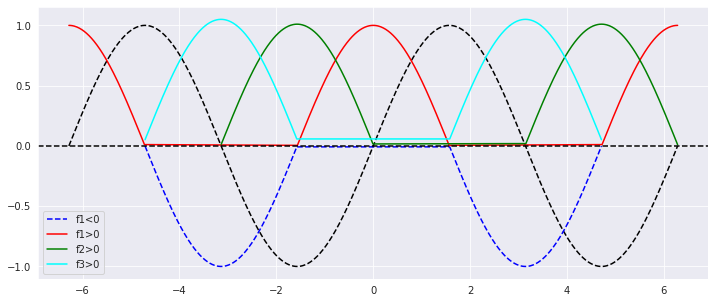

In [ ]:
# this plot shows a function and it's various orders of derivatives where they are positive comparitively. 
# This anologous to ski c-shape turns. edge angle is equivalent to f"(x), the rate of increment of the distance 
# from the fall line is equivalent to f'(x), the fall line being the x axis. f(x) is simply the perpendicular 
# distance w.r.t. the fall line. 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
f = np.sin(x)
f1 = np.cos(x) 
f2 = -np.sin(x)
f3 = -np.cos(x)
plt.figure(figsize=(12,5))
plt.plot(x,f,'k--')
plt.plot(x[f1<0],f1[f1<0],'b--', label='f1<0')
plt.plot(x[f1>0],f1[f1>0],'r', label='f1>0')
#plt.axvline(x=np.argmax(f),color='g', label='f1=0')
plt.plot(x[f2>0],f2[f2>0]+0.01,'g', label='f2>0')
plt.plot(x[f3>0],f3[f3>0]+0.05,'cyan', label='f3>0')
plt.axhline(y=0,color='k',linestyle='--')
#plt.xlim(left=xminvalue)
#plt.xlim(right=xmaxvalue)
plt.legend()
plt.show()